In [1]:
import pandas as pd
import numpy as np 


# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("finpro.csv") 

In [3]:
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 ### Convert TotalCharges to numeric

In [7]:
#Identifying the rows containing missing data
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [8]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

In [9]:
df['TotalChargesNum']= pd.to_numeric(df['TotalCharges'])


In [10]:
df.drop("TotalCharges",axis=1,inplace=True)

## UNIQUE VALUE COLUMNS

In [11]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn : ['No' 'Yes

In [12]:
# CHURN VALUE COUNT

In [13]:
df2 = df.copy()

In [14]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 2:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [15]:
df2 = pd.get_dummies(df2)

In [16]:
df2.to_csv("finproclean.csv",index=False)

## LOGISTIC REGRESSION

In [17]:
df_LR = df2.copy()

In [18]:
x_LR = df_LR.drop(["Churn"],axis=1)
y_LR = df_LR["Churn"]

## All Feature without Parameter Tuning and NO Scalling Spliting data train 90

In [19]:
xLR_train, xLR_test, yLR_train, yLR_test = train_test_split(x_LR, y_LR, test_size = 0.1, random_state = 42)

In [20]:

modelLR = LogisticRegression()

modelLR.fit(xLR_train,yLR_train)

LogisticRegression()

In [21]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(modelLR, xLR_train, yLR_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [22]:
y_predLR = modelLR.predict(xLR_test)

### Evaluating Model 

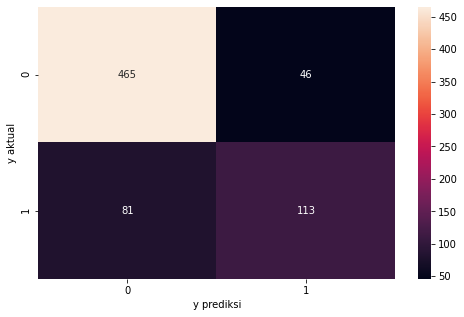

In [23]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLR),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

### Evaluation metrics report 


In [24]:
labels = ['Not Churned', 'Churned']
LRAllNoTunNoScal90 = pd.DataFrame(classification_report(yLR_test,y_predLR, target_names= labels, output_dict=True)).T
LRAllNoTunNoScal90

precision    recall  f1-score     support
Not Churned    0.851648  0.909980  0.879849  511.000000
Churned        0.710692  0.582474  0.640227  194.000000
accuracy       0.819858  0.819858  0.819858    0.819858
macro avg      0.781170  0.746227  0.760038  705.000000
weighted avg   0.812860  0.819858  0.813910  705.000000

In [25]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.985816
recall         58.247423
precission     71.069182
roc_auc_score  74.622733
F1 Score       64.022663

## All Feature without Parameter Tuning and NO Scalling Spliting data train 80

In [26]:
x_LR1 = df_LR.drop(["Churn"],axis=1)
y_LR1 = df_LR["Churn"]

In [27]:
xLR1_train, xLR1_test, yLR1_train, yLR1_test = train_test_split(x_LR1, y_LR1, test_size = 0.2, random_state = 42)

In [28]:
modelLR1 = LogisticRegression()

modelLR1.fit(xLR1_train,yLR1_train)

LogisticRegression()

In [29]:
y_predLR1 = modelLR1.predict(xLR1_test)

In [30]:
# 10 Folds Cross Validation 
clf_scoreLR1 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [31]:
confusion_matrix(yLR1_test,y_predLR1)

array([[939,  97],
       [160, 213]])

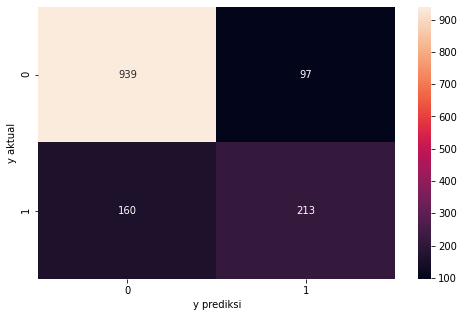

In [32]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLR1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [33]:
labels = ['Not Churned', 'Churned']
LRAllNoTunNoScal80 = pd.DataFrame(classification_report(yLR1_test,y_predLR1, target_names= labels, output_dict=True)).T
LRAllNoTunNoScal80

precision    recall  f1-score      support
Not Churned    0.854413  0.906371  0.879625  1036.000000
Churned        0.687097  0.571046  0.623719   373.000000
accuracy       0.817601  0.817601  0.817601     0.817601
macro avg      0.770755  0.738708  0.751672  1409.000000
weighted avg   0.810120  0.817601  0.811880  1409.000000

In [34]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.760114
recall         57.104558
precission     68.709677
roc_auc_score  73.870812
F1 Score       62.371889

### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 90

In [35]:
modelLRRStun = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 100)

modelLRRStun.fit(xLR_train,yLR_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [36]:
y_predLRRStun= modelLRRStun.predict(xLR_test)

In [37]:
# 10 Folds Cross Validation 
clf_scoreLRRS = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [38]:
confusion_matrix(yLR_test,y_predLRRStun)

array([[462,  49],
       [ 77, 117]])

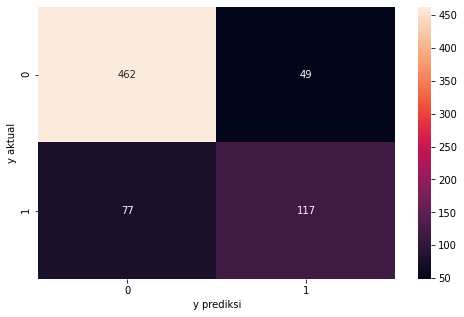

In [39]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLRRStun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [40]:
labels = ['Not Churned', 'Churned']
LRAllTunNoScal90 = pd.DataFrame(classification_report(yLR_test,y_predLRRStun, target_names= labels, output_dict=True)).T
LRAllTunNoScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [41]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLRRStun)*100,recall_score(yLR_test,y_predLRRStun)*100,precision_score(yLR_test,y_predLRRStun)*100,roc_auc_score(yLR_test,y_predLRRStun)*100,f1_score(yLR_test,y_predLRRStun)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)


Score (%)
accuracy       82.127660
recall         60.309278
precission     70.481928
roc_auc_score  75.360119
F1 Score       65.000000

### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 80

In [42]:
modelLRRStun80 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 1000)

modelLRRStun80.fit(xLR1_train,yLR1_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [43]:
y_predLRRStun80= modelLRRStun80.predict(xLR1_test)

In [44]:
# 10 Folds Cross Validation 
clf_scoreLRRS80 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [45]:
confusion_matrix(yLR1_test,y_predLRRStun80)

array([[933, 103],
       [150, 223]])

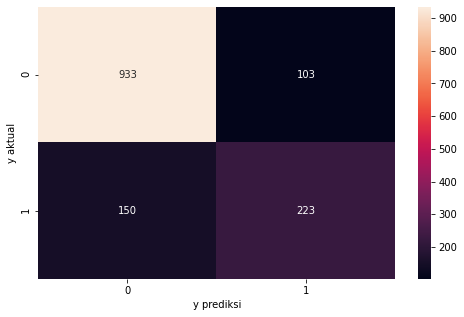

In [46]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLRRStun80),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [47]:
labels = ['Not Churned', 'Churned']
LRAllTunNoScal80 = pd.DataFrame(classification_report(yLR1_test,y_predLRRStun80, target_names= labels, output_dict=True)).T
LRAllTunNoScal80

precision    recall  f1-score     support
Not Churned    0.861496  0.900579  0.880604  1036.00000
Churned        0.684049  0.597855  0.638054   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.772772  0.749217  0.759329  1409.00000
weighted avg   0.814521  0.820440  0.816395  1409.00000

In [48]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.044003
recall         59.785523
precission     68.404908
roc_auc_score  74.921719
F1 Score       63.805436

- Kami telah melakukan hyperparameter tuning grid search namun mendapat parameter yang sama dengan random search

## Logreg All Feature with scalling 

In [49]:
df2_Scal = df2.copy()

- Karenaa Sesuai Hasil EDA bawha di dalam data kami ada beberapa feature yang skalanya berbeda dengan feature yang lain, maka kita akan lakukan scalling, dan karena data kami setelah kita check pada EDA tidak mempunyai outlier makan kami akan menggunakan MinMAx Scaller dengan range yang menyerupai feature yang lain yaitu 0-5

In [50]:
scaler = MinMaxScaler(feature_range=(0, 5))
Churn_col = list(df2_Scal.columns)
Churn_col.remove("Churn")
for col in Churn_col:
    df2_Scal[col] = df2_Scal[col].astype(float)
    df2_Scal[[col]] = scaler.fit_transform(df2_Scal[[col]])
df2_Scal["Churn"] = pd.to_numeric(df2_Scal["Churn"], downcast='float')
df2_Scal

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      5.0         0.0  0.069444           0.0   
1        5.0            0.0      0.0         0.0  2.361111           5.0   
2        5.0            0.0      0.0         0.0  0.138889           5.0   
3        5.0            0.0      0.0         0.0  3.125000           0.0   
4        0.0            0.0      0.0         0.0  0.138889           5.0   
...      ...            ...      ...         ...       ...           ...   
7038     5.0            0.0      5.0         5.0  1.666667           5.0   
7039     0.0            0.0      5.0         5.0  5.000000           5.0   
7040     0.0            0.0      5.0         5.0  0.763889           0.0   
7041     5.0            5.0      5.0         0.0  0.277778           5.0   
7042     5.0            0.0      0.0         0.0  4.583333           5.0   

      PaperlessBilling  MonthlyCharges  Churn  TotalChargesNum  ...  \
0                  5.0        0.577114    0.0         0.017185  ...   
1                  0.0        1.925373    0.0         1.087820  ...   
2                  5.0        1.771144    1.0         0.062264  ...   
3                  0.0        1.196517    0.0         1.059754  ...   
4                  5.0        2.609453    1.0         0.087308  ...   
...                ...             ...    ...              ...  ...   
7038               5.0        3.310945    0.0         1.145968  ...   
7039               5.0        4.226368    0.0         4.238958  ...   
7040               5.0        0.564677    0.0         0.199458  ...   
7041               5.0        2.793532    1.0         0.176515  ...   
7042               5.0        4.348259    0.0         3.940505  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
0                    5.0                                  0.0   
1                    5.0                                  0.0   
2                    5.0                                  0.0   
3                    5.0                                  0.0   
4                    5.0                                  0.0   
...                  ...                                  ...   
7038                 0.0                                  0.0   
7039                 0.0                                  0.0   
7040                 5.0                                  0.0   
7041                 5.0                                  0.0   
7042                 0.0                                  0.0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0.0                      5.0                0.0   
1                     0.0                      0.0                5.0   
2                     0.0                      5.0                0.0   
3                     0.0                      0.0                5.0   
4                     0.0                      5.0                0.0   
...                   ...                      ...                ...   
7038                  5.0                      0.0                5.0   
7039                  5.0                      0.0                5.0   
7040                  0.0                      5.0                0.0   
7041                  0.0                      5.0                0.0   
7042                  5.0                      0.0                0.0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                   0.0                                      0.0   
1                   0.0                                      0.0   
2                   0.0                                      0.0   
3                   0.0                                      5.0   
4                   0.0                                      0.0   
...                 ...                                      ...   
7038                0.0                                      0.0   
7039                0.0               

In [51]:
x_LR_Scal = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal = df2_Scal["Churn"]

In [52]:
x_LR_Scal1 = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal1 = df2_Scal["Churn"]

In [53]:
# #Scalling All feature Train/Test
xLRScal_train, xLRScal_test, yLRScal_train, yLRScal_test = train_test_split(x_LR_Scal, y_LR_Scal, test_size = 0.1, random_state = 42)
xLRScal1_train, xLRScal1_test, yLRScal1_train, yLRScal1_test = train_test_split(x_LR_Scal1, y_LR_Scal1, test_size = 0.2, random_state = 42)



#Scalling model all feature
modelLRScal = LogisticRegression()
modelLRScal1 = LogisticRegression()



#Fitting model scalling all feature 
modelLRScal.fit(xLRScal_train,yLRScal_train)
modelLRScal1.fit(xLRScal1_train,yLRScal1_train)


LogisticRegression()

### All Feature without Parameter Tuning with Scalling Spliting data train 90

In [54]:
y_predLRScal = modelLRScal.predict(xLRScal_test)


In [55]:
# 10 Folds Cross Validation 
clf_scoreLRScal90 = cross_val_score(modelLRScal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [56]:
confusion_matrix(yLRScal_test,y_predLRScal)

array([[462,  49],
       [ 78, 116]])

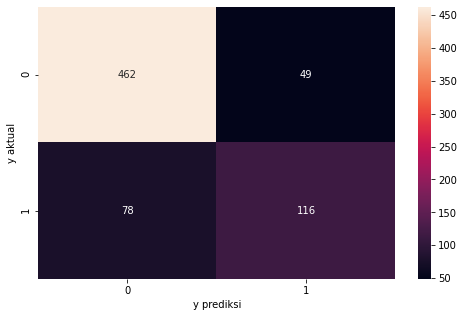

In [57]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [58]:
labels = ['Not Churned', 'Churned']
LRAllNoTunScal90 = pd.DataFrame(classification_report(yLRScal_test,y_predLRScal, target_names= labels, output_dict=True)).T
LRAllNoTunScal90

precision    recall  f1-score     support
Not Churned    0.855556  0.904110  0.879163  511.000000
Churned        0.703030  0.597938  0.646240  194.000000
accuracy       0.819858  0.819858  0.819858    0.819858
macro avg      0.779293  0.751024  0.762701  705.000000
weighted avg   0.813584  0.819858  0.815068  705.000000

In [59]:
print(classification_report(yLRScal_test,y_predLRScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.82       705



In [60]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

Score (%)
accuracy       81.985816
recall         59.793814
precision      70.303030
roc_auc_score  75.102387
f1_score       64.623955

### All Feature without Parameter Tuning  with Scalling Spliting data train 80

In [61]:
y_predLRScal1 = modelLRScal1.predict(xLRScal1_test)

In [62]:
# 10 Folds Cross Validation 
clf_scoreLRScal80 = cross_val_score(modelLRScal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

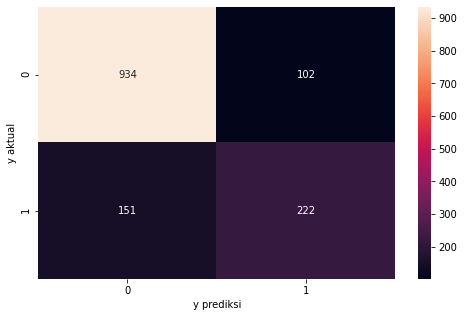

In [63]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [64]:
labels = ['Not Churned', 'Churned']
LRAllNoTunScal80 = pd.DataFrame(classification_report(yLRScal1_test,y_predLRScal1, target_names= labels, output_dict=True)).T
LRAllNoTunScal80

precision    recall  f1-score     support
Not Churned    0.860829  0.901544  0.880717  1036.00000
Churned        0.685185  0.595174  0.637016   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.773007  0.748359  0.758866  1409.00000
weighted avg   0.814332  0.820440  0.816203  1409.00000

In [65]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

Score (%)
accuracy       82.044003
recall         59.517426
precision      68.518519
roc_auc_score  74.835933
f1_score       63.701578

### All Feature with Parameter Tuning RS with Scalling Spliting data train 90

In [66]:
model_LogReg_RS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 1000)
model_LogReg_RS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [67]:
y_predLRRSScal = model_LogReg_RS_Scal.predict(xLRScal_test)

In [68]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal90 = cross_val_score(model_LogReg_RS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

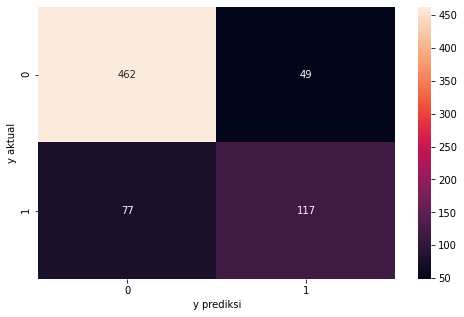

In [69]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRRSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [70]:
labels = ['Not Churned', 'Churned']
LRAllTunScal90 = pd.DataFrame(classification_report(yLRScal_test, y_predLRRSScal, target_names= labels, output_dict=True)).T
LRAllTunScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [71]:
print(classification_report(yLRScal_test,y_predLRRSScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.77       705
weighted avg       0.82      0.82      0.82       705



In [72]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.127660
recall         60.309278
precision      70.481928
roc_auc_score  75.360119
f1_score       65.000000

### All Feature with Parameter Tuning RS with Scalling Spliting data train 80

In [73]:
model_LogReg_RS_Scal1 = LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 100)
model_LogReg_RS_Scal1.fit(xLRScal1_train, yLRScal1_train)

LogisticRegression(solver='newton-cg')

In [74]:
y_predLRRSScal1 = model_LogReg_RS_Scal1.predict(xLRScal1_test)

In [75]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal80 = cross_val_score(model_LogReg_RS_Scal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

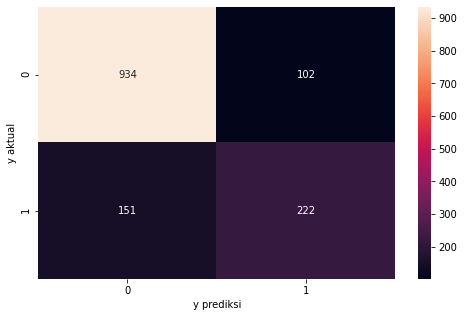

In [76]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRRSScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [77]:
labels = ['Not Churned', 'Churned']
LRAllTunScal80 = pd.DataFrame(classification_report(yLRScal1_test, y_predLRRSScal1, target_names= labels, output_dict=True)).T
LRAllTunScal80

precision    recall  f1-score     support
Not Churned    0.860829  0.901544  0.880717  1036.00000
Churned        0.685185  0.595174  0.637016   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.773007  0.748359  0.758866  1409.00000
weighted avg   0.814332  0.820440  0.816203  1409.00000

In [78]:
print(classification_report(yLRScal1_test,y_predLRRSScal1))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [79]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRRSScal1)*100, recall_score(yLRScal1_test, y_predLRRSScal1)*100,
                    precision_score(yLRScal1_test, y_predLRRSScal1)*100, roc_auc_score(yLRScal1_test, y_predLRRSScal1)*100,
                    f1_score(yLRScal1_test, y_predLRRSScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.044003
recall         59.517426
precision      68.518519
roc_auc_score  74.835933
f1_score       63.701578

### All Feature with Parameter Tuning GS with Scalling Spliting data train 90

In [80]:
model_LogReg_GS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [81]:
# 10 Folds Cross Validation 
clf_scoreLRGSScal = cross_val_score(model_LogReg_GS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [82]:
y_predLRGSScal = model_LogReg_GS_Scal.predict(xLRScal_test)

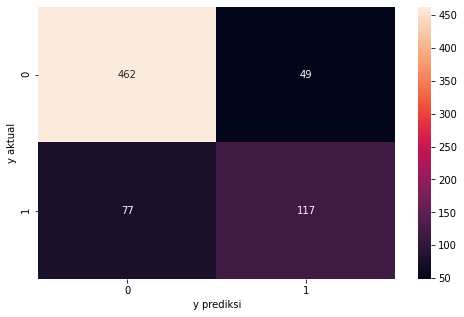

In [83]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRGSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [84]:
labels = ['Not Churned', 'Churned']
LRAllGSTunScal90 = pd.DataFrame(classification_report(yLRScal_test,y_predLRGSScal, target_names= labels, output_dict=True)).T
LRAllGSTunScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [85]:
print(classification_report(yLRScal_test,y_predLRGSScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.77       705
weighted avg       0.82      0.82      0.82       705



In [86]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRGSScal)*100, recall_score(yLRScal_test, y_predLRGSScal)*100,
                    precision_score(yLRScal_test, y_predLRGSScal)*100, roc_auc_score(yLRScal_test, y_predLRGSScal)*100,
                    f1_score(yLRScal_test, y_predLRGSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.127660
recall         60.309278
precision      70.481928
roc_auc_score  75.360119
f1_score       65.000000

### All Feature with Parameter Tuning GS with Scalling Spliting data train 80

In [87]:
model_LogReg_GS_Scal1 = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS_Scal1.fit(xLRScal1_train, yLRScal1_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [88]:
# 10 Folds Cross Validation 
clf_scoreLRGSScal1 = cross_val_score(model_LogReg_GS_Scal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [89]:
y_predLRGSScal1 = model_LogReg_GS_Scal1.predict(xLRScal1_test)

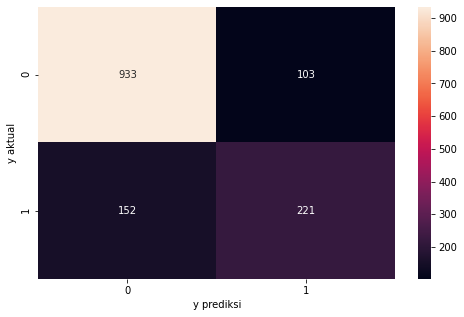

In [90]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRGSScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [91]:
labels = ['Not Churned', 'Churned']
LRAllGSTunScal80 = pd.DataFrame(classification_report(yLRScal1_test,y_predLRGSScal1, target_names= labels, output_dict=True)).T
LRAllGSTunScal80

precision    recall  f1-score      support
Not Churned    0.859908  0.900579  0.879774  1036.000000
Churned        0.682099  0.592493  0.634146   373.000000
accuracy       0.819021  0.819021  0.819021     0.819021
macro avg      0.771003  0.746536  0.756960  1409.000000
weighted avg   0.812837  0.819021  0.814750  1409.000000

In [92]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRGSScal1)*100, recall_score(yLRScal1_test, y_predLRGSScal1)*100,
                    precision_score(yLRScal1_test, y_predLRGSScal1)*100, roc_auc_score(yLRScal1_test, y_predLRGSScal1)*100,
                    f1_score(yLRScal1_test, y_predLRGSScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
   

Score (%)
accuracy       81.902058
recall         59.249330
precision      68.209877
roc_auc_score  74.653622
f1_score       63.414634

In [93]:

# model_best_AllFeature = pd.concat([LRAllNoTunNoScal90, LRAllNoTunNoScal80, LRAllTunNoScal90, LRAllTunNoScal80, LRAllNoTunScal90,  LRAllNoTunScal80, LRAllTunScal90,LRAllTunScal80,LRAllGSTunScal90,LRAllGSTunScal80], keys = ['LR all feature tanpa tuning tanpa scalling 90','LR all feature tanpa tuning tanpa scalling 80', 'LR all feature tuning tanpa scalling 90' ,'LR all feature tuning tanpa scalling 80','LR all feature No tuning scalling 90','LR all feature No tuning scalling 80','LR all feature tuning scalling 90','LR all feature tuning scalling 80','LR all feature tuning GS scalling 90','LR all feature tuning GS scalling 80'])

In [94]:
# model_best_AllFeature

In [95]:
LRAllTunNoScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

# Model Test With Feature Selection

## Feature Selection Without Parameter Tuning without Scalling Train 90

- Dari hasil feature selection pada notebook yang berbeda kami simpulkan akan hanya memakai beberapa feature terbaik

In [96]:
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  Churn  TotalChargesNum  ...  \
0                    1           29.85      0            29.85  ...   
1                    0           56.95      0          1889.50  ...   
2                    1           53.85      1           108.15  ...   
3                    0           42.30      0          1840.75  ...   
4                    1           70.70      1           151.65  ...   
...                ...             ...    ...              ...  ...   
7038                 1           84.80      0          1990.50  ...   
7039                 1          103.20      0          7362.90  ...   
7040                 1           29.60      0           346.45  ...   
7041                 1           74.40      1           306.60  ...   
7042                 1          105.65      0          6844.50  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
0                      1                                    0   
1                      1                                    0   
2                      1                                    0   
3                      1                                    0   
4                      1                                    0   
...                  ...                                  ...   
7038                   0                                    0   
7039                   0                                    0   
7040                   1                                    0   
7041                   1                                    0   
7042                   0                                    0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                     0                                        0   
1                     0                                        0   
2                     0                                        0   
3                     0                                        1   
4                     0                                        0   
...                 ...                                      ...   
7038                  0                                        0   
7039                  0                                       

In [97]:
xsel = df2[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
ysel = df2["Churn"]

In [98]:
xa_train, xa_test, ya_train, ya_test = train_test_split(xsel, ysel, test_size = 0.1, random_state = 42)

xb_train, xb_test, yb_train, yb_test = train_test_split(xsel, ysel, test_size = 0.2, random_state = 42)

In [99]:
modelsel = LogisticRegression()
modelselb = LogisticRegression()
modelsel.fit(xa_train,ya_train)
modelselb.fit(xb_train,yb_train)

LogisticRegression()

In [100]:
# 10 Folds Cross Validation 
clf_scoresel90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [101]:
y_predsel = modelsel.predict(xa_test)

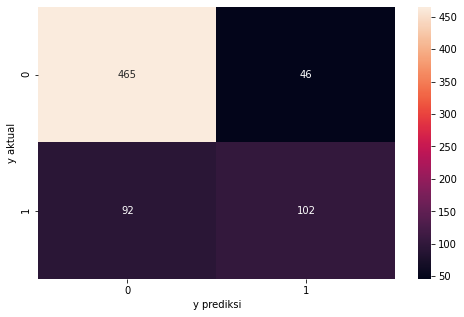

In [102]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [103]:
labels = ['Not Churned', 'Churned']
LRselNoTunScal90 = pd.DataFrame(classification_report(ya_test,y_predsel, target_names= labels, output_dict=True)).T
LRselNoTunScal90

precision    recall  f1-score     support
Not Churned    0.834829  0.909980  0.870787  511.000000
Churned        0.689189  0.525773  0.596491  194.000000
accuracy       0.804255  0.804255  0.804255    0.804255
macro avg      0.762009  0.717877  0.733639  705.000000
weighted avg   0.794753  0.804255  0.795307  705.000000

In [104]:
print(classification_report(ya_test,y_predsel))

precision    recall  f1-score   support

           0       0.83      0.91      0.87       511
           1       0.69      0.53      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.80       705



In [105]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.425532
recall         52.577320
precision      68.918919
roc_auc_score  71.787681
f1_score       59.649123

## Feature Selection Without Parameter Tuning without Scalling Train 80

In [106]:
y_predselb = modelselb.predict(xb_test)

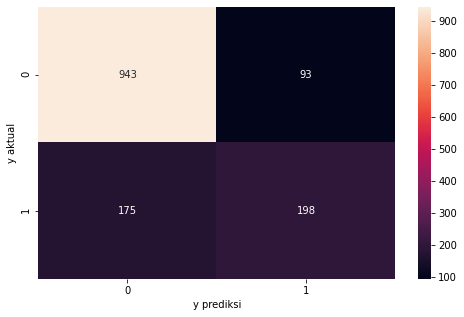

In [107]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [108]:
print(classification_report(yb_test,y_predselb))

precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [109]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.979418
recall         53.083110
precision      68.041237
roc_auc_score  72.053138
f1_score       59.638554

## Feature Selection Parameter Tuning Random Search without Scalling Train 90

In [110]:
modelseltun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 1000)
modelselbtun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 10000)
modelseltun.fit(xa_train,ya_train)
modelselbtun.fit(xb_train,yb_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [111]:
# 10 Folds Cross Validation 
clf_scoreseltun90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [112]:
y_predseltun = modelseltun.predict(xa_test)

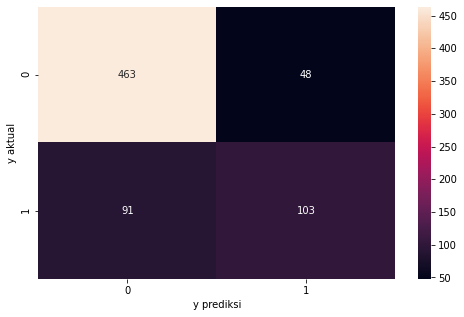

In [113]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predseltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [114]:
print(classification_report(ya_test,y_predseltun))

precision    recall  f1-score   support

           0       0.84      0.91      0.87       511
           1       0.68      0.53      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.79       705



In [115]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.283688
recall         53.092784
precision      68.211921
roc_auc_score  71.849719
f1_score       59.649123

## Feature Selection Parameter Tuning Random Search without Scalling Train 80

In [116]:
# 10 Folds Cross Validation 
clf_scoreseltun80 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [117]:
y_predseltunb = modelselbtun.predict(xb_test)

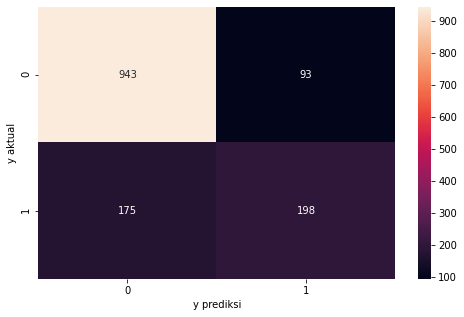

In [118]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predseltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [119]:
print(classification_report(yb_test,y_predseltunb))

precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [120]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.979418
recall         53.083110
precision      68.041237
roc_auc_score  72.053138
f1_score       59.638554

## Feature Selection Parameter Tuning Grid Search without Scalling Train 90

In [121]:
modelselGS = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS.fit(xa_train,ya_train)


LogisticRegression(penalty='none')

In [122]:
# 10 Folds Cross Validation 
clf_scoreselGS = cross_val_score(modelselGS, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [123]:
y_predselGS = modelselGS.predict(xa_test)

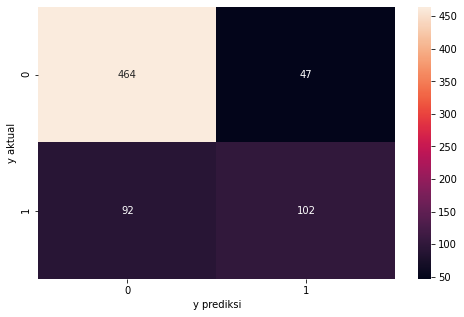

In [124]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predselGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [125]:
print(classification_report(ya_test,y_predselGS))

precision    recall  f1-score   support

           0       0.83      0.91      0.87       511
           1       0.68      0.53      0.59       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.79       705



In [126]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predselGS)*100, recall_score(ya_test, y_predselGS)*100,
                    precision_score(ya_test, y_predselGS)*100, roc_auc_score(ya_test, y_predselGS)*100,
                    f1_score(ya_test, y_predselGS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.283688
recall         52.577320
precision      68.456376
roc_auc_score  71.689834
f1_score       59.475219

## Feature Selection Parameter Tuning Grid Search without Scalling Train 80

In [127]:
modelselGS1 = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS1.fit(xb_train,yb_train)

LogisticRegression(penalty='none')

In [128]:
# 10 Folds Cross Validation 
clf_scoreselGS80 = cross_val_score(modelselGS1, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [129]:
y_predselGS1 = modelselGS1.predict(xb_test)

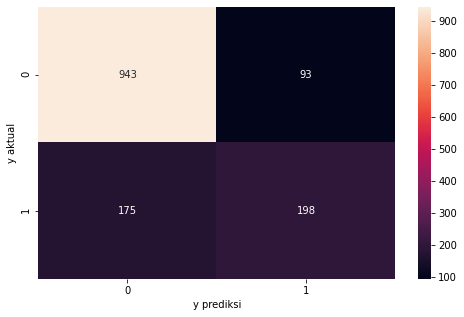

In [130]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [131]:
print(classification_report(yb_test,y_predselGS1))

precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [132]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselGS1)*100, recall_score(yb_test, y_predselGS1)*100,
                    precision_score(yb_test, y_predselGS1)*100, roc_auc_score(yb_test, y_predselGS1)*100,
                    f1_score(yb_test, y_predselGS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.979418
recall         53.083110
precision      68.041237
roc_auc_score  72.053138
f1_score       59.638554

## Feature Selection Without Parameter Tuning with Scalling Train 90

In [133]:
xselscal = df2_Scal[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
yselscal = df2_Scal["Churn"]

In [134]:
xascal_train, xascal_test, yascal_train, yascal_test = train_test_split(xselscal, yselscal, test_size = 0.1, random_state = 42)

xbscal_train, xbscal_test, ybscal_train, ybscal_test = train_test_split(xselscal, yselscal, test_size = 0.2, random_state = 42)

In [135]:
modelselscal = LogisticRegression()
modelselbscal = LogisticRegression()
modelselscal.fit(xascal_train,yascal_train)
modelselbscal.fit(xbscal_train,ybscal_train)

LogisticRegression()

In [136]:
# 10 Folds Cross Validation 
clf_scoreselscal90 = cross_val_score(modelselscal, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [137]:
y_predselscal = modelselscal.predict(xascal_test)

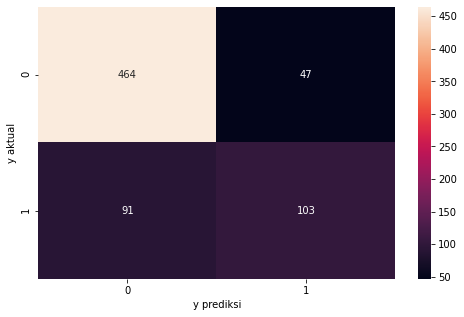

In [138]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [139]:
print(classification_report(yascal_test,y_predselscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.69      0.53      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.80       705



In [140]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.425532
recall         53.092784
precision      68.666667
roc_auc_score  71.947566
f1_score       59.883721

## Feature Selection Without Parameter Tuning Random Search with Scalling Train 80

In [141]:
# 10 Folds Cross Validation 
clf_scoreselscal80 = cross_val_score(modelselbscal, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [142]:
y_predselscalb = modelselbscal.predict(xbscal_test)

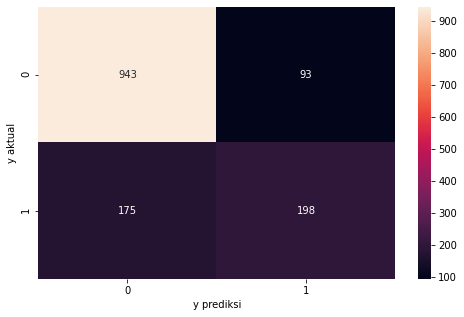

In [143]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscalb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [144]:
print(classification_report(ybscal_test,y_predselscalb))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1036
         1.0       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [145]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.979418
recall         53.083110
precision      68.041237
roc_auc_score  72.053138
f1_score       59.638554

## Feature Selection With Parameter Tuning Random Search with Scalling Train 90

In [146]:
# modelselscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
# modelselbscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
modelselscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselbscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselscaltun.fit(xascal_train,yascal_train)
modelselbscaltun.fit(xbscal_train,ybscal_train)

LogisticRegression(penalty='none')

In [147]:
# 10 Folds Cross Validation 
clf_scoreselscaltun90 = cross_val_score(modelselscaltun, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [148]:
y_predselscaltun = modelselscaltun.predict(xascal_test)

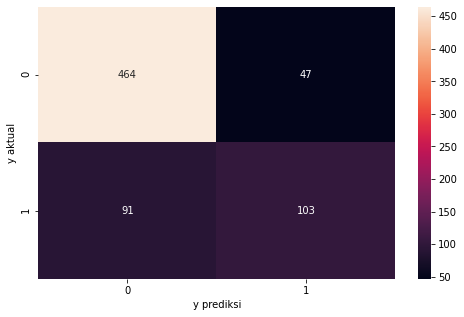

In [149]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscaltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [150]:
print(classification_report(yascal_test,y_predselscaltun))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.69      0.53      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.80       705



In [151]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.425532
recall         53.092784
precision      68.666667
roc_auc_score  71.947566
f1_score       59.883721

## Feature Selection With Parameter Tuning Random Search with Scalling Train 80

In [152]:
# 10 Folds Cross Validation 
clf_scoreselscaltun80 = cross_val_score(modelselbscaltun, xbscal_train, ybscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [153]:
y_predselscaltunb = modelselbscaltun.predict(xbscal_test)

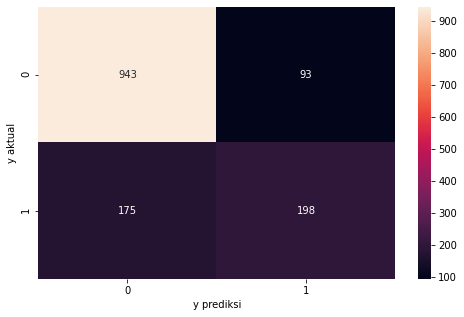

In [154]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscaltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [155]:
print(classification_report(ybscal_test,y_predselscaltunb))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1036
         1.0       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [156]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.979418
recall         53.083110
precision      68.041237
roc_auc_score  72.053138
f1_score       59.638554

## RINGKASAN DAN KESIMPULAN MODEL TEST LOGISTIC REGRESSION

In [157]:
Logreg_Summary = pd.DataFrame({"Logistic Regression": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90": [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 90":[accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 80":[accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 90":[accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 80":[accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],

                                "Feature Selection With Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
                                "Feature Selection With Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100]    
})
a = Logreg_Summary.set_index("Logistic Regression").T
a




Logistic Regression                                  accuracy     recall  \
All Feature without Parameter Tuning and withou...  81.985816  58.247423   
All Feature without Parameter Tuning and withou...  81.760114  57.104558   
All Feature with Parameter Tuning RS and withou...  82.127660  60.309278   
All Feature with Parameter Tuning RS and withou...  82.044003  59.785523   
All Feature with Parameter Tuning RS and Scalli...  81.985816  59.793814   
All Feature with Parameter Tuning RS and Scalli...  82.044003  59.517426   
Feature Selection Without Parameter Tuning with...  80.425532  52.577320   
Feature Selection Without Parameter Tuning with...  80.979418  53.083110   
Feature Selection Without Parameter Tuning with...  80.425532  53.092784   
Feature Selection Without Parameter Tuning with...  80.979418  53.083110   
Feature Selection With Parameter Tuning without...  80.283688  53.092784   
Feature Selection With Parameter Tuning without...  80.979418  53.083110   
Feature Selection With Parameter Tuning with Sc...  80.425532  53.092784   
Feature Selection With Parameter Tuning with Sc...  80.979418  53.083110   

Logistic Regression                                 precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  71.069182      74.622733   
All Feature without Parameter Tuning and withou...  68.709677      73.870812   
All Feature with Parameter Tuning RS and withou...  70.481928      75.360119   
All Feature with Parameter Tuning RS and withou...  68.404908      74.921719   
All Feature with Parameter Tuning RS and Scalli...  70.303030      75.102387   
All Feature with Parameter Tuning RS and Scalli...  68.518519      74.835933   
Feature Selection Without Parameter Tuning with...  68.918919      71.787681   
Feature Selection Without Parameter Tuning with...  68.041237      72.053138   
Feature Selection Without Parameter Tuning with...  68.666667      71.947566   
Feature Selection Without Parameter Tuning with...  68.041237      72.053138   
Feature Selection With Parameter Tuning without...  68.211921      71.849719   
Feature Selection With Parameter Tuning without...  68.041237      72.053138   
Feature Selection With Parameter Tuning with Sc...  68.666667      71.947566   
Feature Selection With Parameter Tuning with Sc...  68.041237      72.053138   

Logistic Regression                                  f1_score  
All Feature without Parameter Tuning and withou...  64.022663  
All Feature without Parameter Tuning and withou...  62.371889  
All Feature with Parameter Tuning RS and withou...  65.000000  
All Feature with Parameter Tuning RS and withou...  63.805436  
All Feature with Parameter Tuning RS and Scalli...  64.623955  
All Feature with Parameter Tuning RS and Scalli...  63.701578  
Feature Selection Without Parameter Tuning with...  59.649123  
Feature Selection Without Parameter Tuning with...  59.638554  
Feature Selection Without Parameter Tuning with...  59.883721  
Feature Selection Without Parameter Tuning with...  59.638554  
Feature Selection With Parameter Tuning without...  59.649123  
Feature Selection With Parameter Tuning without...  59.638554  
Feature Selection With Parameter Tuning with Sc...  59.883721  
Feature Selection With Parameter Tuning with Sc...  59.638554

## The Best Test Logistic Regression in Condition: All Feature with Parameter Tuning RS and without Scalling train 90 

In [158]:
Logreg_Summary = pd.DataFrame({"Logistic Regression":["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature with Parameter Tuning RS and without Scalling train 90":[accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100]})
Logreg_Summary.set_index("Logistic Regression").T


Logistic Regression                                 accuracy     recall  \
All Feature with Parameter Tuning RS and withou...  82.12766  60.309278   

Logistic Regression                                 precision  roc_auc_score  \
All Feature with Parameter Tuning RS and withou...  70.481928      75.360119   

Logistic Regression                                 f1_score  
All Feature with Parameter Tuning RS and withou...      65.0

In [159]:
BestLG = LRAllTunNoScal90
BestLG

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

## We prefer to reduce prediction errors Churn negative, therefore we choose the model with the highest recall dan F1-Score

<hr>
<hr>

# Decission Tree

In [160]:
df_DT = df2.copy()

In [161]:
x_DT = df_DT.drop(["Churn"],axis=1)
y_DT = df_DT["Churn"]

### All Feature without Parameter Tuning and without Scalling train 90

In [162]:
xDT_train, xDT_test, yDT_train, yDT_test = train_test_split(x_DT, y_DT, test_size = 0.1, random_state = 42)

In [163]:
modelDT = DecisionTreeClassifier()

modelDT.fit(xDT_train,yDT_train)

DecisionTreeClassifier()

In [164]:
# 10 Folds Cross Validation 
clf_scoreDT90 = cross_val_score(modelDT, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [165]:
y_predDT = modelDT.predict(xDT_test)

In [166]:
# plt.figure(figsize=(20, 20))
# tree.plot_tree(modelDT.fit(xDT_train, yDT_train))
# # plt.show()

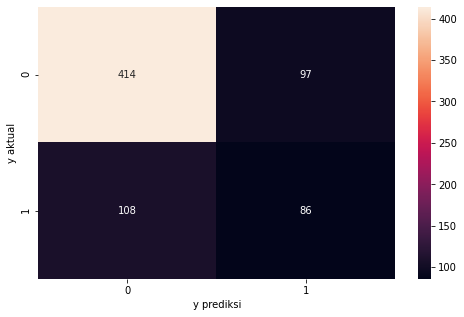

In [167]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [168]:
print(classification_report(yDT_test,y_predDT))

precision    recall  f1-score   support

           0       0.79      0.81      0.80       511
           1       0.47      0.44      0.46       194

    accuracy                           0.71       705
   macro avg       0.63      0.63      0.63       705
weighted avg       0.70      0.71      0.71       705



In [169]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       70.921986
recall         44.329897
precission     46.994536
roc_auc_score  62.673755
F1 Score       45.623342

### All Feature without Parameter Tuning and without Scalling train 80

In [170]:
xDT1_train, xDT1_test, yDT1_train, yDT1_test = train_test_split(x_DT, y_DT, test_size = 0.2, random_state = 42)

In [171]:
modelDT1 = DecisionTreeClassifier()

modelDT1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier()

In [172]:
# 10 Folds Cross Validation 
clf_scoreDT80 = cross_val_score(modelDT1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [173]:
y_predDT1 = modelDT1.predict(xDT1_test)

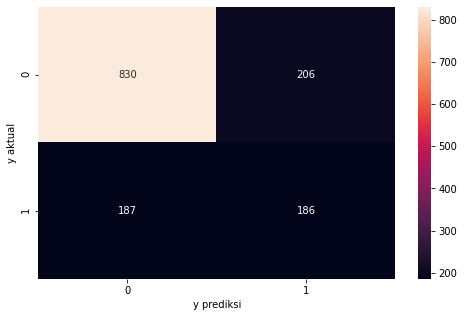

In [174]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [175]:
print(classification_report(yDT1_test,y_predDT1))

precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.47      0.50      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



In [176]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       72.107878
recall         49.865952
precission     47.448980
roc_auc_score  64.990891
F1 Score       48.627451

### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [177]:
modelDTRS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=2,max_depth=5,criterion="gini")
modelDTRS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [178]:
# 10 Folds Cross Validation 
clf_scoreDTRS90 = cross_val_score(modelDTRS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [179]:
y_predDTRS = modelDTRS.predict(xDT_test)

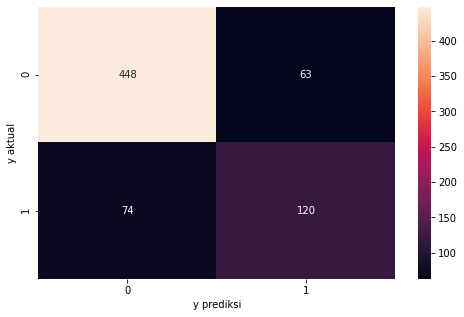

In [180]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [181]:
print(classification_report(yDT_test,y_predDTRS))

precision    recall  f1-score   support

           0       0.86      0.88      0.87       511
           1       0.66      0.62      0.64       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.75       705
weighted avg       0.80      0.81      0.80       705



In [182]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         61.855670
precission     65.573770
roc_auc_score  74.763451
F1 Score       63.660477

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [183]:
modelDTRS1 = DecisionTreeClassifier(min_samples_split=4,min_samples_leaf=5,max_depth=4,criterion="entropy")
modelDTRS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=4)

In [184]:
# 10 Folds Cross Validation 
clf_scoreDTRS80 = cross_val_score(modelDTRS1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [185]:
y_predDTRS1 = modelDTRS1.predict(xDT1_test)

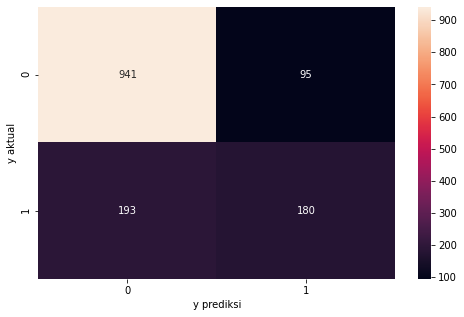

In [186]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [187]:
print(classification_report(yDT1_test,y_predDTRS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [188]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  74.763451
F1 Score       55.555556

### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [189]:
modelDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [190]:
# 10 Folds Cross Validation 
clf_scoreDTGS80 = cross_val_score(modelDTGS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [191]:
y_predDTGS = modelDTGS.predict(xDT_test)

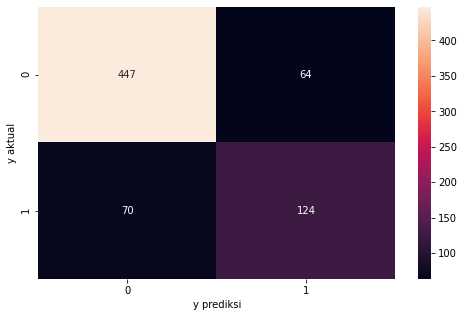

In [192]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [193]:
print(classification_report(yDT_test,y_predDTGS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [194]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [195]:
modelDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [196]:
y_predDTGS1 = modelDTGS1.predict(xDT1_test)

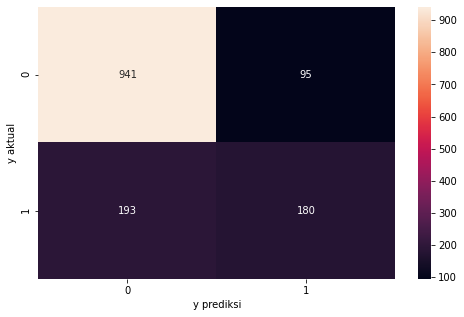

In [197]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [198]:
print(classification_report(yDT1_test,y_predDTGS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [199]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  69.543744
F1 Score       55.555556

### All Feature without Parameter Tuning and with Scalling train 90

In [200]:
x_ScalDT = df2_Scal.drop(["Churn"],axis=1)
y_ScalDT = df2_Scal["Churn"]

In [201]:
xScalDT_train, xScalDT_test, yScalDT_train, yScalDT_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.1, random_state = 42)


In [202]:
xScalDT1_train, xScalDT1_test, yScalDT1_train, yScalDT1_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.2, random_state = 42)

In [203]:
modelDTScal = DecisionTreeClassifier()
modelDTScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier()

In [204]:
# 10 Folds Cross Validation 
clf_scoreDTScal = cross_val_score(modelDTScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [205]:
y_predScalDT = modelDTScal.predict(xScalDT_test)

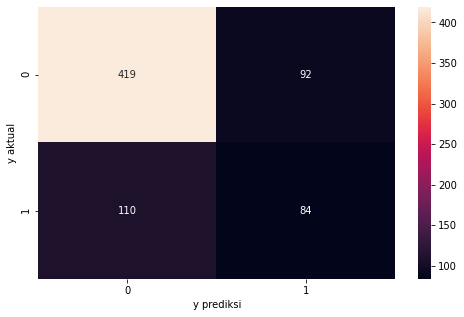

In [206]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [207]:
print(classification_report(yDT_test,y_predScalDT))

precision    recall  f1-score   support

           0       0.79      0.82      0.81       511
           1       0.48      0.43      0.45       194

    accuracy                           0.71       705
   macro avg       0.63      0.63      0.63       705
weighted avg       0.71      0.71      0.71       705



In [208]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.347518
recall         43.298969
precission     47.727273
roc_auc_score  62.647528
F1 Score       45.405405

### All Feature without Parameter Tuning and with Scalling train 80

In [209]:
modelDTScal1 = DecisionTreeClassifier()
modelDTScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier()

In [210]:
# 10 Folds Cross Validation 
clf_scoreDTScal1 = cross_val_score(modelDTScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [211]:
y_predScalDT1 = modelDTScal1.predict(xScalDT1_test)

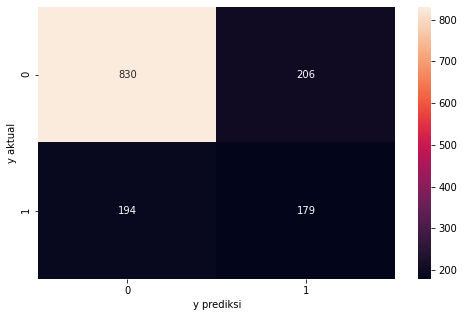

In [212]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [213]:
print(classification_report(yDT1_test,y_predScalDT1))

precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.46      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [214]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.611072
recall         47.989276
precission     46.493506
roc_auc_score  64.052553
F1 Score       47.229551

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [215]:
modelDTRSScal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [216]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal = cross_val_score(modelDTRSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [217]:
y_predScalDTRS = modelDTRSScal.predict(xScalDT_test)

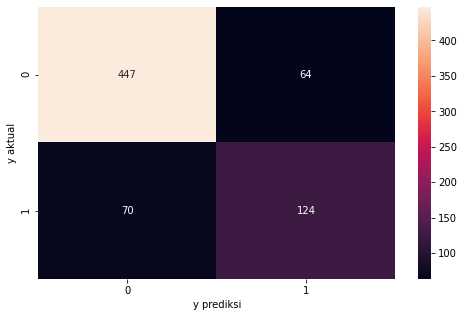

In [218]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [219]:
print(classification_report(yDT_test,y_predScalDTRS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [220]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Random Search and with Scalling train 80

In [221]:
modelDTRSScal1 = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

In [222]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal1 = cross_val_score(modelDTRSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [223]:
y_predScalDTRS1 = modelDTRSScal1.predict(xScalDT1_test)

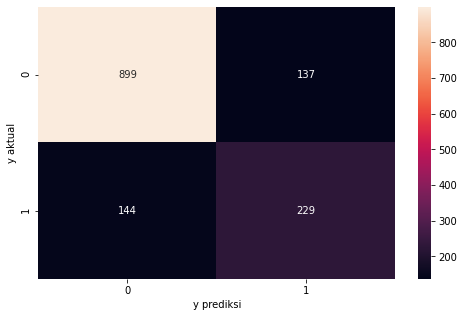

In [224]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [225]:
print(classification_report(yDT1_test,y_predScalDTRS1))

precision    recall  f1-score   support

           0       0.86      0.87      0.86      1036
           1       0.63      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [226]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.056778
recall         61.394102
precission     62.568306
roc_auc_score  74.085082
F1 Score       61.975643

### All Feature with Parameter Tuning Grid Search and with Scalling train 90

In [227]:
modelDTGSScal = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [228]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal = cross_val_score(modelDTGSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [229]:
y_predScalDTGS = modelDTGSScal.predict(xScalDT_test)

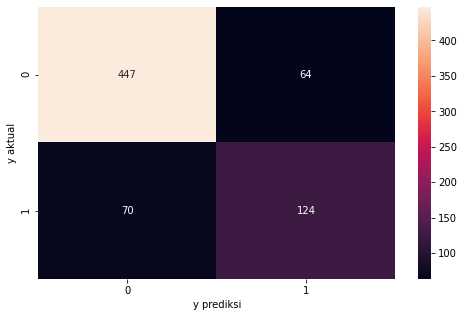

In [230]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [231]:
print(classification_report(yDT_test,y_predScalDTGS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [232]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Grid Search and with Scalling train 80

In [233]:
modelDTGSScal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [234]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal1 = cross_val_score(modelDTGSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [235]:
y_predScalDTGS1 = modelDTGSScal1.predict(xScalDT1_test)

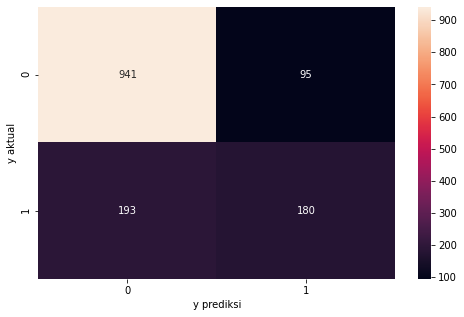

In [236]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [237]:
print(classification_report(yDT1_test,y_predScalDTGS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [238]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  69.543744
F1 Score       55.555556

## Decision Tree With Feature Selection

In [239]:
x_selDT = df2[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selDT  = df2["Churn"]

In [240]:
xselDT_train, xselDT_test, yselDT_train, yselDT_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 42)


In [241]:
xselDT1_train, xselDT1_test, yselDT1_train, yselDT1_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 42)


### Feature Selection without Parameter Tuning Search and without Scalling train 90

In [242]:
modelselDT = DecisionTreeClassifier()
modelselDT.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier()

In [243]:
# 10 Folds Cross Validation 
clf_scoreDTsel = cross_val_score(modelselDT, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [244]:
y_predselDT = modelselDT.predict(xselDT_test)

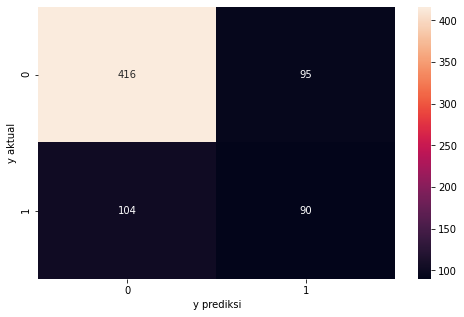

In [245]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [246]:
print(classification_report(yselDT_test,y_predselDT))

precision    recall  f1-score   support

           0       0.80      0.81      0.81       511
           1       0.49      0.46      0.47       194

    accuracy                           0.72       705
   macro avg       0.64      0.64      0.64       705
weighted avg       0.71      0.72      0.72       705



In [247]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.773050
recall         46.391753
precission     48.648649
roc_auc_score  63.900377
F1 Score       47.493404

### Feature Selection without Parameter Tuning and without Scalling train 80

In [248]:
modelselDT1 = DecisionTreeClassifier()
modelselDT1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier()

In [249]:
# 10 Folds Cross Validation 
clf_scoreDTsel80 = cross_val_score(modelselDT1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [250]:
y_predselDT1 = modelselDT1.predict(xselDT1_test)

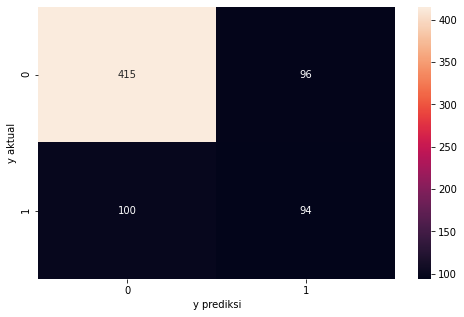

In [251]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [252]:
print(classification_report(yselDT1_test,y_predselDT1))

precision    recall  f1-score   support

           0       0.81      0.81      0.81       511
           1       0.49      0.48      0.49       194

    accuracy                           0.72       705
   macro avg       0.65      0.65      0.65       705
weighted avg       0.72      0.72      0.72       705



In [253]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       72.198582
recall         48.453608
precission     49.473684
roc_auc_score  64.833458
F1 Score       48.958333

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [254]:
modelselDTRS = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTRS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)

In [255]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel = cross_val_score(modelselDTRS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [256]:
y_predselDTRS = modelselDTRS.predict(xselDT_test)

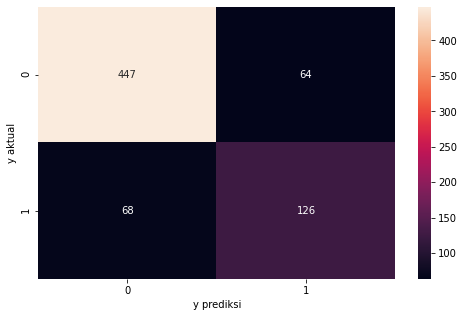

In [257]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [258]:
print(classification_report(yselDT_test,y_predselDTRS))

precision    recall  f1-score   support

           0       0.87      0.87      0.87       511
           1       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [259]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         64.948454
precission     66.315789
roc_auc_score  76.211996
F1 Score       65.625000

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [260]:
modelselDTRS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=4,max_depth=4,criterion="entropy")
modelselDTRS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [261]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel80 = cross_val_score(modelselDTRS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [262]:
y_predselDTRS1 = modelselDTRS1.predict(xselDT1_test)

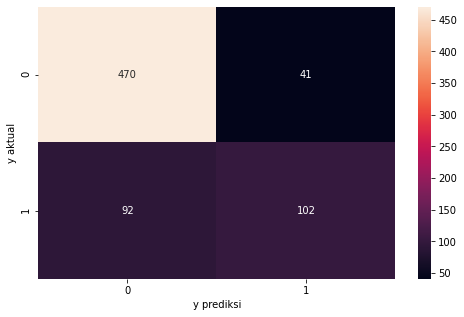

In [263]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [264]:
print(classification_report(yselDT1_test,y_predselDTRS1))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.71      0.53      0.61       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [265]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.134752
recall         52.577320
precission     71.328671
roc_auc_score  72.276918
F1 Score       60.534125

### Feature Selection without Parameter Tuning but with Scalling train 90

In [266]:
modelselDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [267]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel = cross_val_score(modelselDTGS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [268]:
y_predselDTGS = modelselDTGS.predict(xselDT_test)

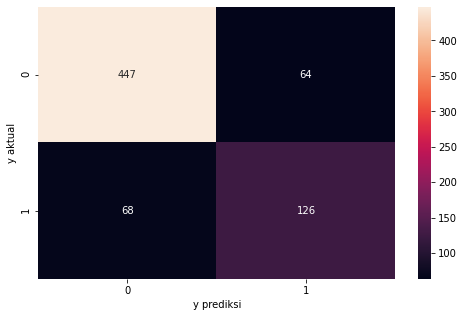

In [269]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [270]:
print(classification_report(yselDT_test,y_predselDTGS))

precision    recall  f1-score   support

           0       0.87      0.87      0.87       511
           1       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [271]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         64.948454
precission     66.315789
roc_auc_score  76.211996
F1 Score       65.625000

In [272]:
modelselDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [273]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel80 = cross_val_score(modelselDTGS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [274]:
y_predselDTGS1 = modelselDTGS1.predict(xselDT1_test)

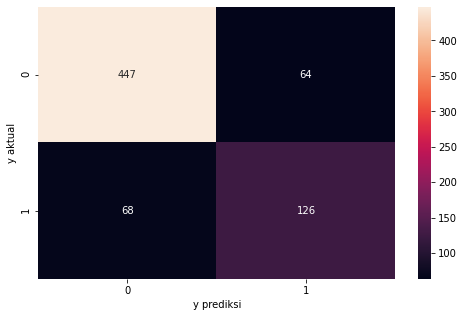

In [275]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [276]:
print(classification_report(yselDT1_test,y_predselDTGS1))

precision    recall  f1-score   support

           0       0.87      0.87      0.87       511
           1       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [277]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         64.948454
precission     66.315789
roc_auc_score  76.211996
F1 Score       65.625000

In [278]:
x_selDTScal = df2_Scal[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selDTScal  = df2_Scal["Churn"]

In [279]:
xselDTscal_train, xselDTscal_test, yselDTscal_train, yselDTscal_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.1, random_state = 42)

In [280]:
xselDTscal1_train, xselDTscal1_test, yselDTscal1_train, yselDTscal1_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.2, random_state = 42)

In [281]:
modelselDTscal = DecisionTreeClassifier()
modelselDTscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier()

In [282]:
# 10 Folds Cross Validation 
clf_scoreDTselscal = cross_val_score(modelselDTscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [283]:
y_predselDTscal = modelselDTscal.predict(xselDTscal_test)

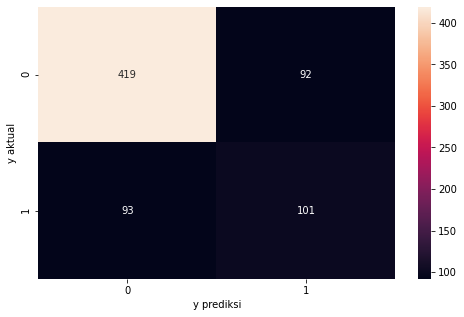

In [284]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [285]:
print(classification_report(yselDTscal_test,y_predselDTscal))

precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       511
         1.0       0.52      0.52      0.52       194

    accuracy                           0.74       705
   macro avg       0.67      0.67      0.67       705
weighted avg       0.74      0.74      0.74       705



In [286]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       73.758865
recall         52.061856
precission     52.331606
roc_auc_score  67.028971
F1 Score       52.196382

### Feature Selection without Parameter Tuning but with Scalling train 80

In [287]:
modelselDTscal1 = DecisionTreeClassifier()
modelselDTscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier()

In [288]:
# 10 Folds Cross Validation 
clf_scoreDTselscal80 = cross_val_score(modelselDTscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [289]:
y_predselDTscal1 = modelselDTscal1.predict(xselDTscal1_test)

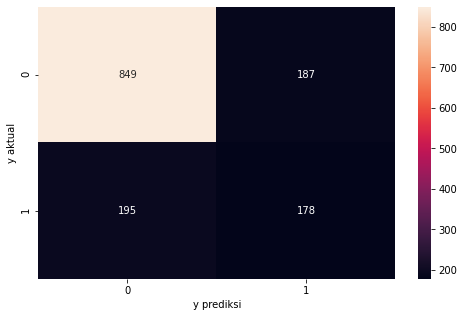

In [290]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [291]:
print(classification_report(yselDTscal1_test,y_predselDTscal1))

precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1036
         1.0       0.49      0.48      0.48       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [292]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       72.888573
recall         47.721180
precission     48.767123
roc_auc_score  64.835493
F1 Score       48.238482

### Feature Selection with Parameter Tuning Random Search but with Scalling train 90

In [293]:
modelselDTRSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=4,max_depth=5,criterion="entropy")
modelselDTRSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=3)

In [294]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal = cross_val_score(modelselDTRSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [295]:
y_predselDTRSscal = modelselDTRSscal.predict(xselDTscal_test)

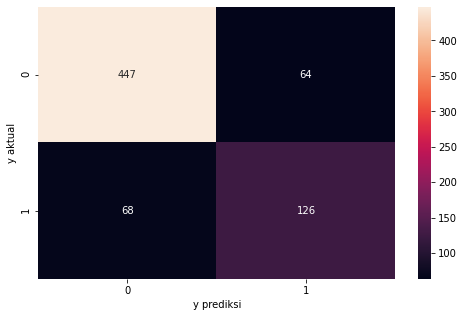

In [296]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [297]:
print(classification_report(yselDTscal_test,y_predselDTRSscal))

precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       511
         1.0       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [298]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         64.948454
precission     66.315789
roc_auc_score  76.211996
F1 Score       65.625000

### Feature Selection with Parameter Tuning Random Search but with Scalling train 80

In [299]:
modelselDTRSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
modelselDTRSscal1.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [300]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal1 = cross_val_score(modelselDTRSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [301]:
y_predselDTRSscal1 = modelselDTRSscal1.predict(xselDTscal1_test)

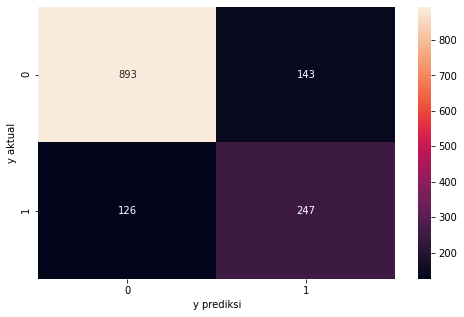

In [302]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [303]:
BestDT = pd.DataFrame(classification_report(yselDTscal1_test,y_predselDTRSscal1, target_names= labels, output_dict=True)).T

In [304]:
print(classification_report(yselDTscal1_test,y_predselDTRSscal1))

precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1036
         1.0       0.63      0.66      0.65       373

    accuracy                           0.81      1409
   macro avg       0.75      0.76      0.76      1409
weighted avg       0.81      0.81      0.81      1409



In [305]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         66.219839
precission     63.333333
roc_auc_score  76.208375
F1 Score       64.744430

### Feature Selection with Parameter Tuning Grid Search but with Scalling train 90

In [306]:
modelselDTGSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3)

In [307]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal = cross_val_score(modelselDTGSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [308]:
y_predselDTGSscal = modelselDTGSscal.predict(xselDTscal_test)

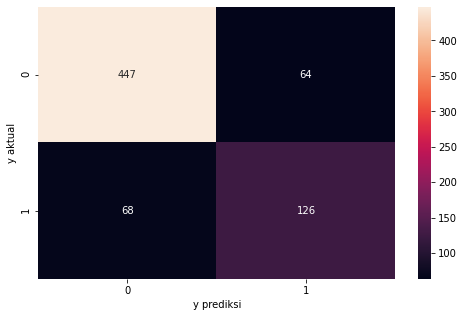

In [309]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [310]:
print(classification_report(yselDTscal_test,y_predselDTGSscal))

precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       511
         1.0       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [311]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         64.948454
precission     66.315789
roc_auc_score  76.211996
F1 Score       65.625000

### Feature Selection with Parameter Tuning Grid Search but with Scalling train 80

In [312]:
modelselDTGSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGSscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [313]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal80 = cross_val_score(modelselDTGSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [314]:
y_predselDTGSscal1 = modelselDTGSscal1.predict(xselDTscal1_test)

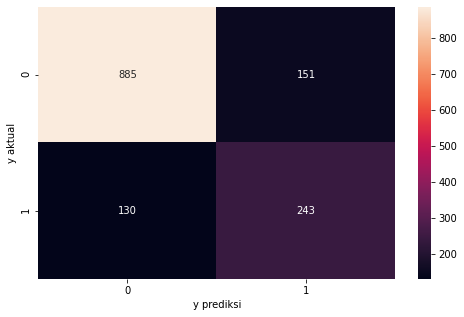

In [315]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [316]:
print(classification_report(yselDTscal1_test,y_predselDTGSscal1))

precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1036
         1.0       0.62      0.65      0.63       373

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [317]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.056778
recall         65.147453
precission     61.675127
roc_auc_score  75.286082
F1 Score       63.363755

In [318]:
Logreg_Summary = pd.DataFrame({"Decision Tree": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 90":[accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 90":[accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
                               "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
                                "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
                                "Feature Selection with Parameter Tuning Random Seacrh and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
                                "Feature Selection with Parameter Tuning Random Search and with Scalling train 80": [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100]

})
b = Logreg_Summary.set_index("Decision Tree").T
b   

Decision Tree                                        accuracy     recall  \
All Feature without Parameter Tuning and withou...  70.921986  44.329897   
All Feature without Parameter Tuning and withou...  72.107878  49.865952   
All Feature with Parameter Tuning Random and wi...  80.567376  61.855670   
All Feature with Parameter Tuning Random and wi...  79.559972  48.257373   
All Feature with Parameter Tuning Grid and with...  80.992908  63.917526   
All Feature with Parameter Tuning Grid and with...  79.559972  48.257373   
All Feature without Parameter Tuning but with S...  71.347518  43.298969   
All Feature without Parameter Tuning but with S...  71.611072  47.989276   
All Feature with Parameter Tuning Random Search...  80.992908  63.917526   
All Feature with Parameter Tuning Random Search...  80.056778  61.394102   
All Feature with Parameter Tuning Grid Search a...  80.992908  63.917526   
All Feature with Parameter Tuning Grid Search a...  79.559972  48.257373   
Feature Selection without Parameter Tuning and ...  71.773050  46.391753   
Feature Selection without Parameter Tuning and ...  72.198582  48.453608   
Feature Selection with Parameter Tuning and wit...  81.276596  64.948454   
Feature Selection with Parameter Tuning and wit...  81.134752  52.577320   
Feature Selection without Parameter Tuning but ...  73.758865  52.061856   
Feature Selection without Parameter Tuning but ...  72.888573  47.721180   
Feature Selection with Parameter Tuning Random ...  81.276596  64.948454   
Feature Selection with Parameter Tuning Random ...  80.908446  66.219839   
Feature Selection with Parameter Tuning Grid Se...  81.276596  64.948454   
Feature Selection with Parameter Tuning Grid Se...  80.056778  65.147453   

Decision Tree                                       precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  46.994536      62.673755   
All Feature without Parameter Tuning and withou...  47.448980      64.990891   
All Feature with Parameter Tuning Random and wi...  65.573770      74.763451   
All Feature with Parameter Tuning Random and wi...  65.454545      74.763451   
All Feature with Parameter Tuning Grid and with...  65.957447      75.696532   
All Feature with Parameter Tuning Grid and with...  65.454545      69.543744   
All Feature without Parameter Tuning but with S...  47.727273      62.647528   
All Feature without Parameter Tuning but with S...  46.493506      64.052553   
All Feature with Parameter Tuning Random Search...  65.957447      75.696532   
All Feature with Parameter Tuning Random Search...  62.568306      74.085082   
All Feature with Parameter Tuning Grid Search a...  65.957447      75.696532   
All Feature with Parameter Tuning Grid Search a...  65.454545      69.543744   
Feature Selection without Parameter Tuning and ...  48.648649      63.900377   
Feature Selection without Parameter Tuning and ...  49.473684      64.833458   
Feature Selection with Parameter Tuning and wit...  66.315789      76.211996   
Feature Selection with Parameter Tuning and wit...  71.328671      72.276918   
Feature Selection without Parameter Tuning but ...  52.331606      67.028971   
Feature Selection without Parameter Tuning but ...  48.767123      64.835493   
Feature Selection with Parameter Tuning Random ...  66.315789      76.211996   
Feature Selection with Parameter Tuning Random ...  63.333333      76.208375   
Feature Selection with Parameter Tuning Grid Se...  66.315789      76.211996   
Feature Selection with Parameter Tuning Grid Se...  61.675127      75.286082   

Decision Tree                                        f1_score  
All Feature without Parameter Tuning and withou...  45.623342  
All Feature without Parameter Tuning and withou...  48.627451  
All Feature with Parameter Tuning Random and wi...  63.660477  
All Feature with Parameter Tuning Random and wi...  55.555556  
All Feature with Parameter Tuning Grid and with...  64.921466  
All Feature with Parameter

## The Best Condition Model Test Decision Tree : Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [319]:
DT_Summary = pd.DataFrame({"Decision Tree": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning Random Search and with Scalling train 80": [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100]})
DT_Summary.set_index("Decision Tree").T

Decision Tree                                        accuracy     recall  \
Feature Selection with Parameter Tuning Random ...  80.908446  66.219839   

Decision Tree                                       precision  roc_auc_score  \
Feature Selection with Parameter Tuning Random ...  63.333333      76.208375   

Decision Tree                                       f1_score  
Feature Selection with Parameter Tuning Random ...  64.74443

In [320]:
BestDT

precision    recall  f1-score      support
Not Churned    0.876349  0.861969  0.869100  1036.000000
Churned        0.633333  0.662198  0.647444   373.000000
accuracy       0.809084  0.809084  0.809084     0.809084
macro avg      0.754841  0.762084  0.758272  1409.000000
weighted avg   0.812017  0.809084  0.810422  1409.000000

# RANDOM FOREST

In [321]:
df_RF = df2.copy()

In [322]:
x_RF = df_RF.drop(["Churn"],axis=1)
y_RF = df_RF["Churn"]

In [323]:
xRF_train, xRF_test, yRF_train, yRF_test = train_test_split(x_RF, y_RF, test_size = 0.1, random_state = 42)

In [324]:
xRF1_train, xRF1_test, yRF1_train, yRF1_test = train_test_split(x_RF, y_RF, test_size = 0.2, random_state = 42)

### All Feature without Parameter Tuning and without Scalling train 90

In [325]:
modelRF = RandomForestClassifier()
modelRF.fit(xRF_train, yRF_train)

RandomForestClassifier()

In [326]:
# 10 Folds Cross Validation 
clf_scoreRF = cross_val_score(modelRF, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [327]:
y_predRF = modelRF.predict(xRF_test)

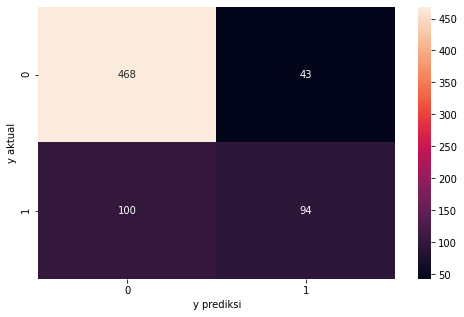

In [328]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRF),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [329]:
print(classification_report(yRF_test,y_predRF))

precision    recall  f1-score   support

           0       0.82      0.92      0.87       511
           1       0.69      0.48      0.57       194

    accuracy                           0.80       705
   macro avg       0.76      0.70      0.72       705
weighted avg       0.79      0.80      0.79       705



In [330]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.716312
recall         48.453608
precission     68.613139
roc_auc_score  70.019368
F1 Score       56.797583

### All Feature without Parameter Tuning and without Scalling train 80

In [331]:
modelRF1 = RandomForestClassifier()
modelRF1.fit(xRF1_train, yRF1_train)

RandomForestClassifier()

In [332]:
# 10 Folds Cross Validation 
clf_scoreRF1 = cross_val_score(modelRF1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [333]:
y_predRF1 = modelRF1.predict(xRF1_test)

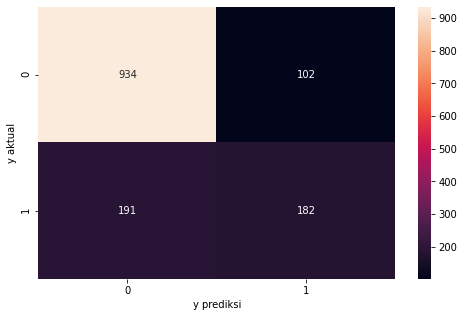

In [334]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRF1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [335]:
print(classification_report(yRF1_test,y_predRF1))

precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [336]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.205110
recall         48.793566
precission     64.084507
roc_auc_score  69.474003
F1 Score       55.403349

### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [337]:
modelRFRS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=400)
modelRFRS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [338]:
# 10 Folds Cross Validation 
clf_scoreRFRS = cross_val_score(modelRFRS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [339]:
y_predRFRS = modelRFRS.predict(xRF_test)

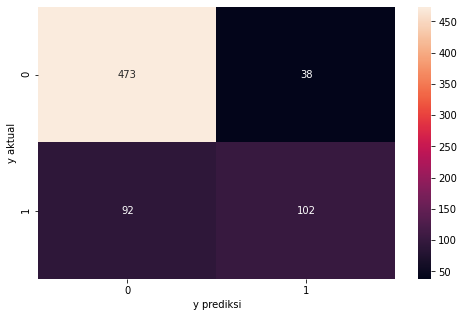

In [340]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [341]:
print(classification_report(yRF_test,y_predRFRS))

precision    recall  f1-score   support

           0       0.84      0.93      0.88       511
           1       0.73      0.53      0.61       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.74       705
weighted avg       0.81      0.82      0.81       705



In [342]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.560284
recall         52.577320
precission     72.857143
roc_auc_score  72.570460
F1 Score       61.077844

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [343]:
modelRFRS1 = RandomForestClassifier(max_depth=90,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [344]:
# 10 Folds Cross Validation 
clf_scoreRFRS1 = cross_val_score(modelRFRS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [345]:
y_predRFRS1 = modelRFRS1.predict(xRF1_test)

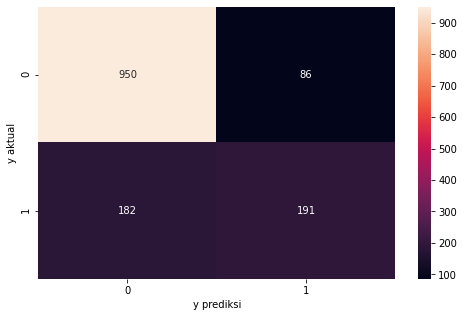

In [346]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [347]:
print(classification_report(yRF1_test,y_predRFRS1))

precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [348]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.979418
recall         51.206434
precission     68.953069
roc_auc_score  71.452638
F1 Score       58.769231

### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [349]:
modelRFGS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=2,n_estimators=200)
modelRFGS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [350]:
# 10 Folds Cross Validation 
clf_scoreRFGS = cross_val_score(modelRFGS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [351]:
y_predRFGS = modelRFGS.predict(xRF_test)

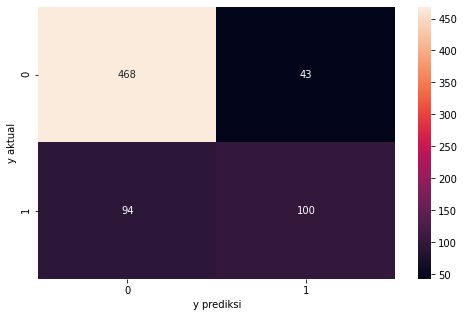

In [352]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [353]:
print(classification_report(yRF_test,y_predRFGS))

precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.70      0.52      0.59       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.73       705
weighted avg       0.80      0.81      0.80       705



In [354]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         51.546392
precission     69.930070
roc_auc_score  71.565759
F1 Score       59.347181

### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [355]:
modelRFGS1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [356]:
# 10 Folds Cross Validation 
clf_scoreRFGS1 = cross_val_score(modelRFGS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [357]:
y_predRFGS1 = modelRFGS1.predict(xRF1_test)

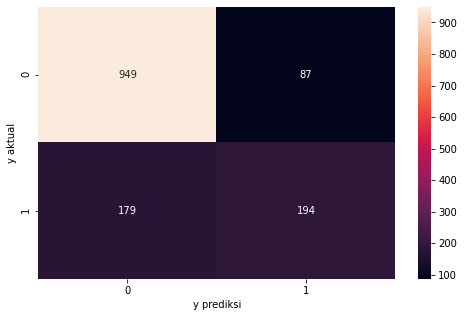

In [358]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [359]:
print(classification_report(yRF1_test,y_predRFGS1))

precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [360]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.121363
recall         52.010724
precission     69.039146
roc_auc_score  71.806520
F1 Score       59.327217

### All Feature without Parameter Tuning but with Scalling train 90

In [361]:
x_ScalRF = df2_Scal.drop(["Churn"],axis=1)
y_ScalRF = df2_Scal["Churn"]

In [362]:
xScalRF_train, xScalRF_test, yScalRF_train, yScalRF_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.1, random_state = 42)

In [363]:
xScalRF1_train, xScalRF1_test, yScalRF1_train, yScalRF1_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.2, random_state = 42)

In [364]:
modelRFscal = RandomForestClassifier()
modelRFscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier()

In [365]:
# 10 Folds Cross Validation 
clf_scoreRFScal = cross_val_score(modelRFscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [366]:
y_predRFscal = modelRFscal.predict(xScalRF_test)

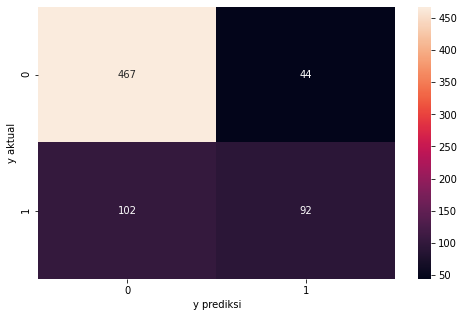

In [367]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [368]:
print(classification_report(yScalRF_test,y_predRFscal))

precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       511
         1.0       0.68      0.47      0.56       194

    accuracy                           0.79       705
   macro avg       0.75      0.69      0.71       705
weighted avg       0.78      0.79      0.78       705



In [369]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.290780
recall         47.422680
precission     67.647059
roc_auc_score  69.406056
F1 Score       55.757576

### All Feature without Parameter Tuning but with Scalling train 80

In [370]:
modelRFscal1 = RandomForestClassifier()
modelRFscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier()

In [371]:
# 10 Folds Cross Validation 
clf_scoreRFScal1 = cross_val_score(modelRFscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [372]:
y_predRFscal1 = modelRFscal1.predict(xScalRF1_test)

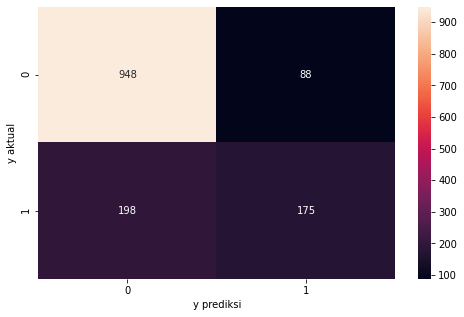

In [373]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [374]:
print(classification_report(yScalRF1_test,y_predRFscal1))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1036
         1.0       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [375]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.701916
recall         46.916890
precission     66.539924
roc_auc_score  69.211341
F1 Score       55.031447

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [376]:
modelRFRSscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [377]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal = cross_val_score(modelRFRSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [378]:
y_predRFRSscal = modelRFRSscal.predict(xScalRF_test)

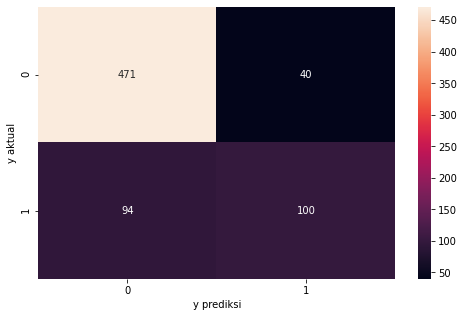

In [379]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [380]:
print(classification_report(yScalRF_test,y_predRFRSscal))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       511
         1.0       0.71      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [381]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         51.546392
precission     71.428571
roc_auc_score  71.859302
F1 Score       59.880240

### All Feature with Parameter Tuning Random Feature and with Scalling train 80

In [382]:
modelRFRSscal1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFRSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [383]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal1 = cross_val_score(modelRFRSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [384]:
y_predRFRSscal1 = modelRFRSscal1.predict(xScalRF1_test)

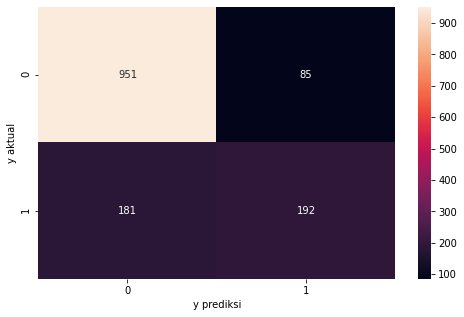

In [385]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [386]:
print(classification_report(yScalRF1_test,y_predRFRSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [387]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.121363
recall         51.474531
precission     69.314079
roc_auc_score  71.634949
F1 Score       59.076923

### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 90

In [388]:
modelRFGSscal = RandomForestClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=200)

In [389]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal = cross_val_score(modelRFGSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [390]:
y_predRFGSscal = modelRFGSscal.predict(xScalRF_test)

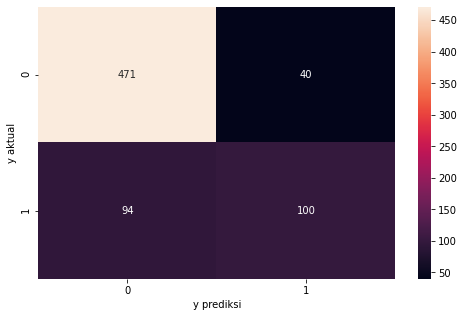

In [391]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [392]:
print(classification_report(yScalRF_test,y_predRFGSscal))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       511
         1.0       0.71      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [393]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         51.546392
precission     71.428571
roc_auc_score  71.859302
F1 Score       59.880240

### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 80

In [394]:
modelRFGSscal1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [395]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal1 = cross_val_score(modelRFGSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [396]:
y_predRFGSscal1 = modelRFGSscal1.predict(xScalRF1_test)

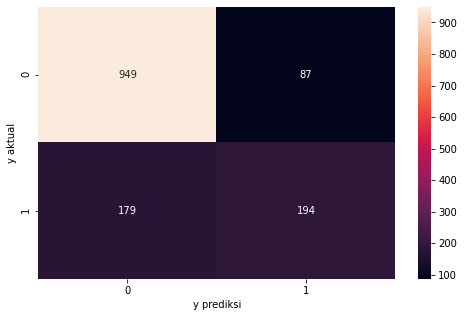

In [397]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [398]:
print(classification_report(yScalRF1_test,y_predRFGSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [399]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.121363
recall         52.010724
precission     69.039146
roc_auc_score  71.806520
F1 Score       59.327217

### Feature Selection without Parameter Tuning and without Scalling train 90

In [400]:
x_selRF = df2[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selRF  = df2["Churn"]

In [401]:
xselRF_train, xselRF_test, yselRF_train, yselRF_test = train_test_split(x_selRF, y_selRF, test_size = 0.1, random_state = 42)

In [402]:
xselRF1_train, xselRF1_test, yselRF1_train, yselRF1_test = train_test_split(x_selRF, y_selRF, test_size = 0.2, random_state = 42)

In [403]:
modelRFsel = RandomForestClassifier()
modelRFsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier()

In [404]:
# 10 Folds Cross Validation 
clf_scoreRFsel= cross_val_score(modelRFsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [405]:
y_predRFsel = modelRFsel.predict(xselRF_test)

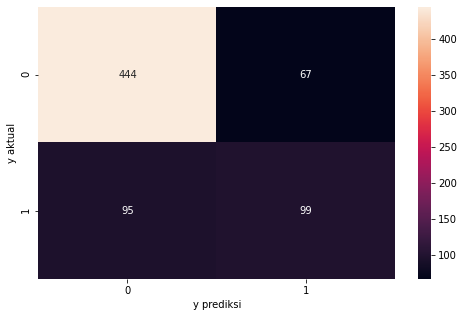

In [406]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [407]:
print(classification_report(yselRF_test,y_predRFsel))

precision    recall  f1-score   support

           0       0.82      0.87      0.85       511
           1       0.60      0.51      0.55       194

    accuracy                           0.77       705
   macro avg       0.71      0.69      0.70       705
weighted avg       0.76      0.77      0.76       705



In [408]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       77.021277
recall         51.030928
precission     59.638554
roc_auc_score  68.959691
F1 Score       55.000000

### Feature Selection without Parameter Tuning and without Scalling train 80

In [409]:
modelRFsel1 = RandomForestClassifier()
modelRFsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier()

In [410]:
# 10 Folds Cross Validation 
clf_scoreRFsel80 = cross_val_score(modelRFsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [411]:
y_predRFsel1 = modelRFsel1.predict(xselRF1_test)

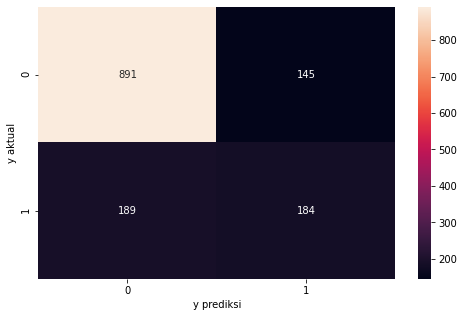

In [412]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [413]:
print(classification_report(yselRF1_test,y_predRFsel1))

precision    recall  f1-score   support

           0       0.82      0.86      0.84      1036
           1       0.56      0.49      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [414]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       76.295245
recall         49.329759
precission     55.927052
roc_auc_score  67.666810
F1 Score       52.421652

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [415]:
modelRFRSsel = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [416]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel = cross_val_score(modelRFRSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [417]:
y_predRFRSsel = modelRFRSsel.predict(xselRF_test)

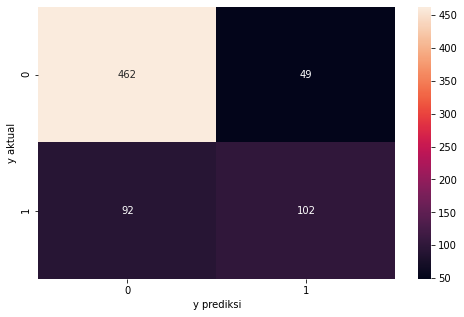

In [418]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [419]:
print(classification_report(yselRF_test,y_predRFRSsel))

precision    recall  f1-score   support

           0       0.83      0.90      0.87       511
           1       0.68      0.53      0.59       194

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



In [420]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.000000
recall         52.577320
precission     67.549669
roc_auc_score  71.494139
F1 Score       59.130435

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [421]:
modelRFRSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=2,n_estimators=400)
modelRFRSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400)

In [422]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel80 = cross_val_score(modelRFRSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [423]:
y_predRFRSsel1 = modelRFRSsel1.predict(xselRF1_test)

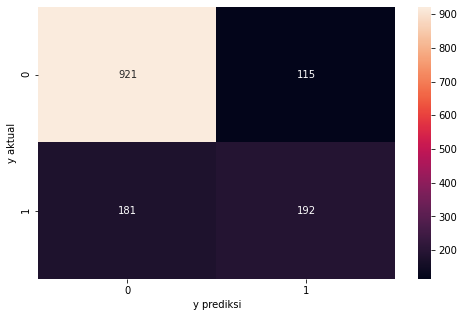

In [424]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [425]:
print(classification_report(yselRF1_test,y_predRFRSsel1))

precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [426]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.992193
recall         51.474531
precission     62.540717
roc_auc_score  70.187072
F1 Score       56.470588

### Feature Selection with Parameter Tuning Grid Search and without Scalling train 90

In [427]:
modelRFGSsel = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [428]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel = cross_val_score(modelRFGSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [429]:
y_predRFGSsel = modelRFGSsel.predict(xselRF_test)

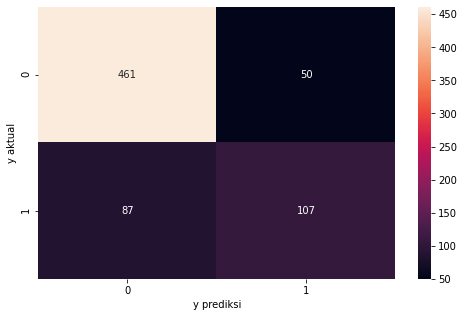

In [430]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFGSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [431]:
print(classification_report(yselRF_test,y_predRFGSsel))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       511
           1       0.68      0.55      0.61       194

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [432]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         55.154639
precission     68.152866
roc_auc_score  72.684952
F1 Score       60.968661

### Feature Selection with Parameter Tuning Grid Search and without Scalling train 80

In [433]:
modelRFGSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=400)
modelRFGSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=400)

In [434]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel80 = cross_val_score(modelRFGSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [435]:
y_predRFGSsel1 = modelRFGSsel1.predict(xselRF1_test)

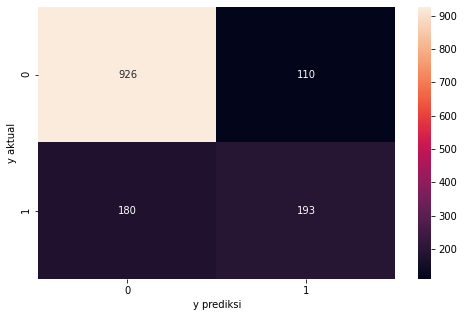

In [436]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFGSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [437]:
print(classification_report(yselRF1_test,y_predRFGSsel1))

precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [438]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.418027
recall         51.742627
precission     63.696370
roc_auc_score  70.562433
F1 Score       57.100592

### Feature Selection without Parameter Tuning but with Scalling train 90

In [439]:
x_selRFscal = df2_Scal[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selRFscal  = df2_Scal["Churn"]

In [440]:
xselRFscal_train, xselRFscal_test, yselRFscal_train, yselRFscal_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.1, random_state = 42)

In [441]:
xselRFscal1_train, xselRFscal1_test, yselRFscal1_train, yselRFscal1_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.2, random_state = 42)

In [442]:
modelRFselscal = RandomForestClassifier()
modelRFselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier()

In [443]:
# 10 Folds Cross Validation 
clf_scoreRFselscal = cross_val_score(modelRFselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [444]:
y_predRFselscal = modelRFselscal.predict(xselRFscal_test)

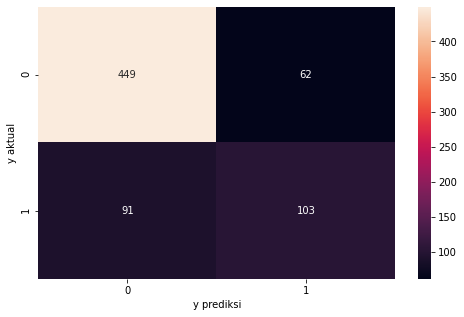

In [445]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [446]:
print(classification_report(yselRFscal_test,y_predRFselscal))

precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       511
         1.0       0.62      0.53      0.57       194

    accuracy                           0.78       705
   macro avg       0.73      0.70      0.71       705
weighted avg       0.77      0.78      0.78       705



In [447]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.297872
recall         53.092784
precission     62.424242
roc_auc_score  70.479856
F1 Score       57.381616

### Feature Selection without Parameter Tuning but with Scalling train 80

In [448]:
modelRFselscal1 = RandomForestClassifier()
modelRFselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier()

In [449]:
# 10 Folds Cross Validation 
clf_scoreRFselscal1 = cross_val_score(modelRFselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [450]:
y_predRFselscal1 = modelRFselscal1.predict(xselRFscal1_test)

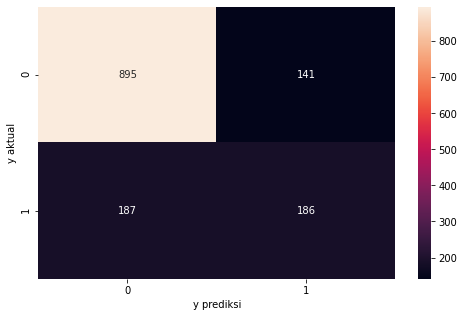

In [451]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [452]:
print(classification_report(yselRFscal1_test,y_predRFselscal1))

precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      1036
         1.0       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [453]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       76.721079
recall         49.865952
precission     56.880734
roc_auc_score  68.127957
F1 Score       53.142857

### Feature Selection with Parameter Tuning Random Search and with Scalling train 90

In [454]:
modelRFRSselscal = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=90)
modelRFRSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=90)

In [455]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal = cross_val_score(modelRFRSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [456]:
y_predRFRSselscal = modelRFRSselscal.predict(xselRFscal_test)

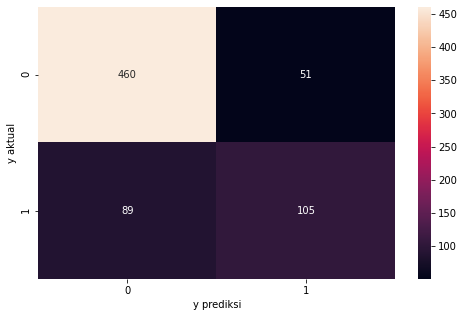

In [457]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [458]:
print(classification_report(yselRFscal_test,y_predRFRSselscal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       511
         1.0       0.67      0.54      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.73       705
weighted avg       0.79      0.80      0.79       705



In [459]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.141844
recall         54.123711
precission     67.307692
roc_auc_score  72.071640
F1 Score       60.000000

### Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [460]:
modelRFRSselscal1 = RandomForestClassifier(max_depth=80,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [461]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [462]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

In [463]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [464]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

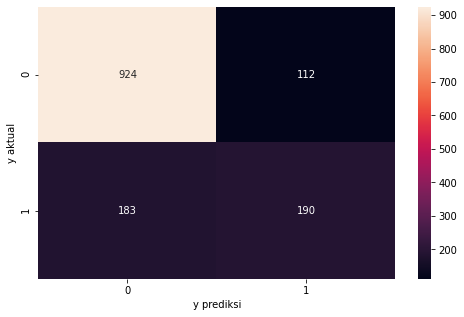

In [465]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [466]:
print(classification_report(yselRFscal1_test,y_predRFRSselscal1))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1036
         1.0       0.63      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [467]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.063165
recall         50.938338
precission     62.913907
roc_auc_score  70.063763
F1 Score       56.296296

In [468]:
### Feature Selection with Parameter Tuning Grid Search and with Scalling train 90

In [469]:
modelRFGSselscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFGSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [470]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal = cross_val_score(modelRFGSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [471]:
y_predRFGSselscal = modelRFGSselscal.predict(xselRFscal_test)

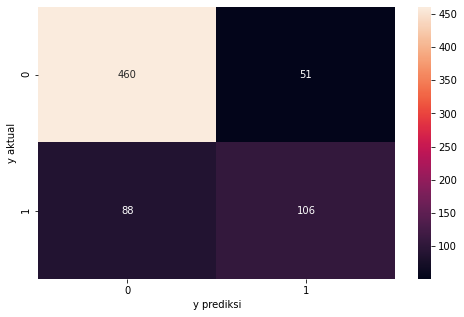

In [472]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFGSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [473]:
BestRF = pd.DataFrame(classification_report(yselRFscal_test,y_predRFGSselscal, target_names= labels, output_dict=True)).T


In [474]:
print(classification_report(yselRFscal_test,y_predRFGSselscal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       511
         1.0       0.68      0.55      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.74       705
weighted avg       0.79      0.80      0.80       705



In [475]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.283688
recall         54.639175
precission     67.515924
roc_auc_score  72.329372
F1 Score       60.398860

### Feature Selection with Parameter Tuning Grid Search and with Scalling train 80

In [476]:
modelRFGSselscal1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [477]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal80 = cross_val_score(modelRFGSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [478]:
y_predRFGSselscal1 = modelRFGSselscal1.predict(xselRFscal1_test)

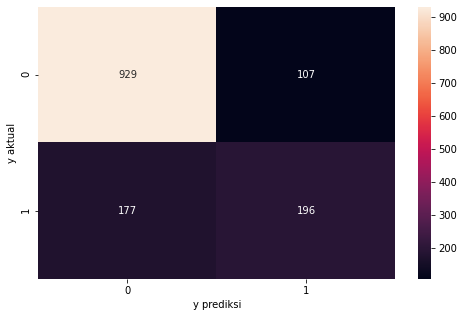

In [479]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFGSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [480]:
print(classification_report(yselRFscal1_test,y_predRFGSselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [481]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.843861
recall         52.546917
precission     64.686469
roc_auc_score  71.109366
F1 Score       57.988166

In [482]:
RandomForest_Summary = pd.DataFrame({"Random Forest": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
                                 "All Feature with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
                                  "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
                                   "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 90": [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100]
                                 


})
c = RandomForest_Summary.set_index("Random Forest").T
c   

Random Forest                                        accuracy     recall  \
All Feature without Parameter Tuning and withou...  79.716312  48.453608   
All Feature without Parameter Tuning and withou...  79.205110  48.793566   
All Feature with Parameter Tuning Random Search...  81.560284  52.577320   
All Feature with Parameter Tuning Random Search...  80.979418  51.206434   
All Feature with Parameter Tuning Grid Search a...  80.567376  51.546392   
All Feature with Parameter Tuning Grid Search a...  81.121363  52.010724   
All Feature without Parameter Tuning but with S...  79.290780  47.422680   
All Feature without Parameter Tuning but with S...  79.701916  46.916890   
All Feature with Parameter Tuning Random Search...  80.992908  51.546392   
All Feature with Parameter Tuning Random Search...  81.121363  51.474531   
All Feature with Parameter Tuning Grid Search a...  80.992908  51.546392   
All Feature with Parameter Tuning Grid Search a...  81.121363  52.010724   
Feature Selection without Parameter Tuning and ...  77.021277  51.030928   
Feature Selection without Parameter Tuning and ...  76.295245  49.329759   
Feature Selection with Parameter Tuning Random ...  80.000000  52.577320   
Feature Selection with Parameter Tuning Random ...  78.992193  51.474531   
Feature Selection with Parameter Tuning Grid Se...  80.567376  55.154639   
Feature Selection with Parameter Tuning Grid Se...  79.418027  51.742627   
Feature Selection without Parameter Tuning but ...  78.297872  53.092784   
Feature Selection without Parameter Tuning but ...  76.721079  49.865952   
Feature Selection with Parameter Tuning Random ...  80.141844  54.123711   
Feature Selection with Parameter Tuning Random ...  79.063165  50.938338   
Feature Selection with Parameter Tuning Grid Se...  80.283688  54.639175   
Feature Selection with Parameter Tuning Grid Se...  79.843861  52.546917   

Random Forest                                       precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  68.613139      70.019368   
All Feature without Parameter Tuning and withou...  64.084507      69.474003   
All Feature with Parameter Tuning Random Search...  72.857143      72.570460   
All Feature with Parameter Tuning Random Search...  68.953069      71.452638   
All Feature with Parameter Tuning Grid Search a...  69.930070      71.565759   
All Feature with Parameter Tuning Grid Search a...  69.039146      71.806520   
All Feature without Parameter Tuning but with S...  67.647059      69.406056   
All Feature without Parameter Tuning but with S...  66.539924      69.211341   
All Feature with Parameter Tuning Random Search...  71.428571      71.859302   
All Feature with Parameter Tuning Random Search...  69.314079      71.634949   
All Feature with Parameter Tuning Grid Search a...  71.428571      71.859302   
All Feature with Parameter Tuning Grid Search a...  69.039146      71.806520   
Feature Selection without Parameter Tuning and ...  59.638554      68.959691   
Feature Selection without Parameter Tuning and ...  55.927052      67.666810   
Feature Selection with Parameter Tuning Random ...  67.549669      71.494139   
Feature Selection with Parameter Tuning Random ...  62.540717      70.187072   
Feature Selection with Parameter Tuning Grid Se...  68.152866      72.684952   
Feature Selection with Parameter Tuning Grid Se...  63.696370      70.562433   
Feature Selection without Parameter Tuning but ...  62.424242      70.479856   
Feature Selection without Parameter Tuning but ...  56.880734      68.127957   
Feature Selection with Parameter Tuning Random ...  67.307692      72.071640   
Feature Selection with Parameter Tuning Random ...  62.913907      70.063763   
Feature Selection with Parameter Tuning Grid Se...  67.515924      72.329372   
Feature Selection with Parameter Tuning Grid Se...  64.686469      71.109366   

Random Forest                                        f1_score  
All Feature without Parameter Tuni

## The Best Model test Random Forrest with Condition : Feature Selection with Parameter Tuning Grid Search and with Scalling train 90

In [483]:
RandomForest_Summary = pd.DataFrame({"Random Forest": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100]})
RandomForest_Summary.set_index("Random Forest").T

Random Forest                                        accuracy     recall  \
Feature Selection with Parameter Tuning Grid Se...  80.283688  54.639175   

Random Forest                                       precision  roc_auc_score  \
Feature Selection with Parameter Tuning Grid Se...  67.515924      72.329372   

Random Forest                                       f1_score  
Feature Selection with Parameter Tuning Grid Se...  60.39886

In [484]:
BestRF

precision    recall  f1-score     support
Not Churned    0.839416  0.900196  0.868744  511.000000
Churned        0.675159  0.546392  0.603989  194.000000
accuracy       0.802837  0.802837  0.802837    0.802837
macro avg      0.757288  0.723294  0.736366  705.000000
weighted avg   0.794216  0.802837  0.795889  705.000000

<hr>
<hr>

# XGB Classifier

In [485]:
df_XGB = df2.copy()

In [486]:
xXGB = df_XGB.drop(["Churn"],axis=1)
yXGB = df_XGB["Churn"]

In [487]:
xXGB_train, xXGB_test, yXGB_train, yXGB_test = train_test_split(xXGB, yXGB, test_size = 0.1, random_state = 42)

In [488]:
xXGB1_train, xXGB1_test, yXGB1_train, yXGB1_test = train_test_split(xXGB, yXGB, test_size = 0.2, random_state = 42)

In [489]:
modelXGB = XGBClassifier()
modelXGB.fit(xXGB_train,yXGB_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### All Feature without Parameter Tuning and without Scalling train 90

In [490]:
 #10 Folds Cross Validation 
clf_scoreXGB = cross_val_score(modelXGB, xXGB_train, yXGB_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [491]:
y_predXGB = modelXGB.predict(xXGB_test)

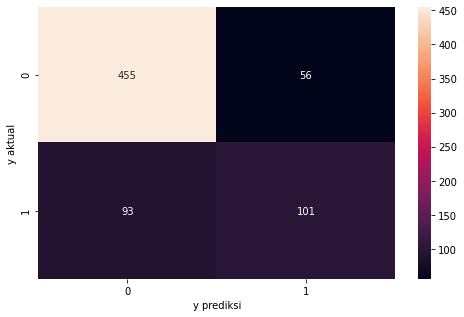

In [492]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB_test,y_predXGB),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [493]:
print(classification_report(yXGB_test,y_predXGB))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       511
           1       0.64      0.52      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [494]:
pd.DataFrame(data= [accuracy_score(yXGB_test,y_predXGB)*100,recall_score(yXGB_test,y_predXGB)*100,precision_score(yXGB_test,y_predXGB)*100,roc_auc_score(yXGB_test,y_predXGB)*100,f1_score(yXGB_test,y_predXGB)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.865248
recall         52.061856
precission     64.331210
roc_auc_score  70.551476
F1 Score       57.549858

### All Feature without Parameter Tuning and without Scalling train 80

In [495]:
modelXGB1 = XGBClassifier()
modelXGB1.fit(xXGB1_train,yXGB1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [496]:
 #10 Folds Cross Validation 
clf_scoreXGB1 = cross_val_score(modelXGB1, xXGB1_train, yXGB1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [497]:
y_predXGB1 = modelXGB1.predict(xXGB1_test)

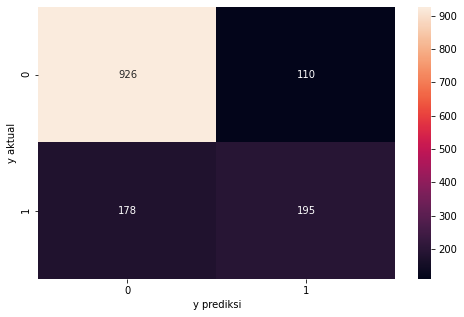

In [498]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB1_test,y_predXGB1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [499]:
print(classification_report(yXGB1_test,y_predXGB1))

precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [500]:
pd.DataFrame(data= [accuracy_score(yXGB1_test,y_predXGB1)*100,recall_score(yXGB1_test,y_predXGB1)*100,precision_score(yXGB1_test,y_predXGB1)*100,roc_auc_score(yXGB1_test,y_predXGB1)*100,f1_score(yXGB1_test,y_predXGB1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         52.278820
precission     63.934426
roc_auc_score  70.830530
F1 Score       57.522124

### All Feature with Parameter Tuning Random search and without Scalling train 90

In [501]:
modelXGBRS = XGBClassifier(subsample= 0.6, n_estimators= 200, min_child_weight= 10, max_depth= 3, learning_rate= 0.2 , colsample_bytree=0.1, random_state=5)

modelXGBRS.fit(xXGB_train,yXGB_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [502]:
 #10 Folds Cross Validation 
clf_scoreXGBRS = cross_val_score(modelXGB, xXGB_train, yXGB_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [503]:
y_predXGBRS = modelXGBRS.predict(xXGB_test)

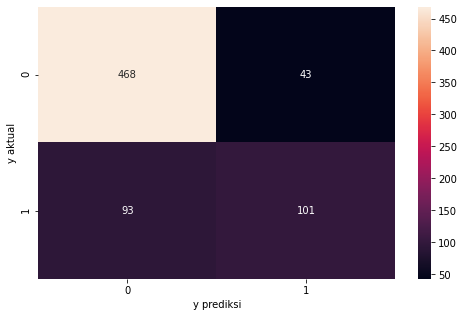

In [504]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB_test,y_predXGBRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [505]:
print(classification_report(yXGB_test,y_predXGBRS))

precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.70      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [506]:
pd.DataFrame(data= [accuracy_score(yXGB_test,y_predXGBRS)*100,recall_score(yXGB_test,y_predXGBRS)*100,precision_score(yXGB_test,y_predXGBRS)*100,roc_auc_score(yXGB_test,y_predXGBRS)*100,f1_score(yXGB_test,y_predXGBRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.709220
recall         52.061856
precission     70.138889
roc_auc_score  71.823491
F1 Score       59.763314

### All Feature with Parameter Tuning Random search and without Scalling train 80

In [507]:
modelXGBRS1 = XGBClassifier(subsample= 1.0, n_estimators= 200, min_child_weight= 1, max_depth= 4, learning_rate= 0.02 , gamma= 0.1, colsample_bytree=0.8, random_state=5, reg_alpha=0,reg_lambda=1)

modelXGBRS1.fit(xXGB1_train,yXGB1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [508]:
 #10 Folds Cross Validation 
clf_scoreXGBRS80 = cross_val_score(modelXGB1, xXGB1_train, yXGB1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [509]:
y_predXGBRS1 = modelXGBRS1.predict(xXGB1_test)

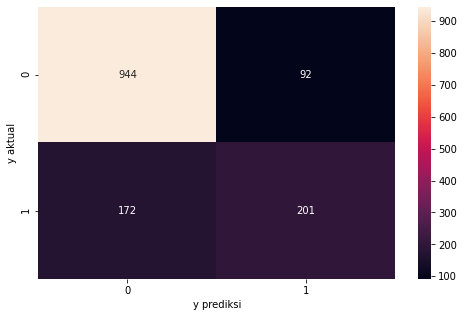

In [510]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB1_test,y_predXGBRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [511]:
print(classification_report(yXGB1_test,y_predXGBRS1))

precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [512]:
pd.DataFrame(data= [accuracy_score(yXGB1_test,y_predXGBRS1)*100,recall_score(yXGB1_test,y_predXGBRS1)*100,precision_score(yXGB1_test,y_predXGBRS1)*100,roc_auc_score(yXGB1_test,y_predXGBRS1)*100,f1_score(yXGB1_test,y_predXGBRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.263307
recall         53.887399
precission     68.600683
roc_auc_score  72.503545
F1 Score       60.360360

### All Feature without Parameter Tuning Random search but with Scalling train 90

In [513]:
xscalXG = df2_Scal.drop(["Churn"],axis=1)
yscalXG = df2_Scal["Churn"]

In [514]:
xscalXG_train, xscalXG_test, yscalXG_train, yscalXG_test = train_test_split(xscalXG, yscalXG, test_size = 0.1, random_state = 42)

In [515]:
xscalXG1_train, xscalXG1_test, yscalXG1_train, yscalXG1_test = train_test_split(xscalXG, yscalXG, test_size = 0.2, random_state = 42)

In [516]:
modelXGBscal = XGBClassifier()

modelXGBscal.fit(xscalXG_train,yscalXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [517]:
 #10 Folds Cross Validation 
clf_scoreXGBscal = cross_val_score(modelXGBscal, xscalXG_train, yscalXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [518]:
y_predXGBscal = modelXGBscal.predict(xscalXG_test)

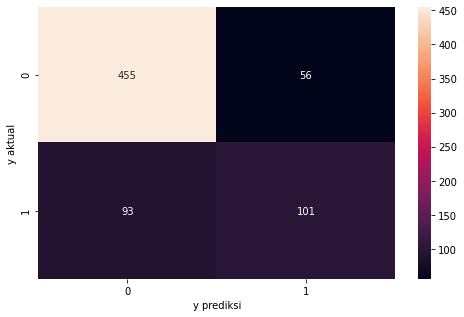

In [519]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG_test,y_predXGBscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [520]:
print(classification_report(yscalXG_test,y_predXGBscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       511
         1.0       0.64      0.52      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [521]:
pd.DataFrame(data= [accuracy_score(yscalXG_test,y_predXGBscal)*100,recall_score(yscalXG_test,y_predXGBscal)*100,precision_score(yscalXG_test,y_predXGBscal)*100,roc_auc_score(yscalXG_test,y_predXGBscal)*100,f1_score(yscalXG_test,y_predXGBscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.865248
recall         52.061856
precission     64.331210
roc_auc_score  70.551476
F1 Score       57.549858

### All Feature without Parameter Tuning Random search but with Scalling train 80

In [522]:
modelXGBscal1 = XGBClassifier()

modelXGBscal1.fit(xscalXG1_train,yscalXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [523]:
 #10 Folds Cross Validation 
clf_scoreXGBscal80 = cross_val_score(modelXGBscal1, xscalXG1_train, yscalXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [524]:
y_predXGBscal1 = modelXGBscal1.predict(xscalXG1_test)

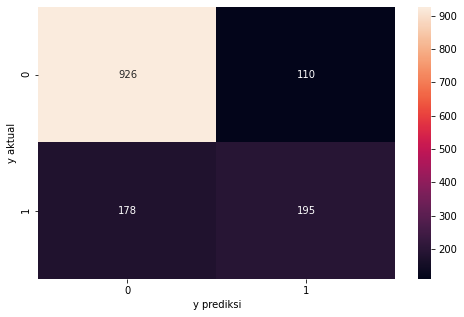

In [525]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG1_test,y_predXGBscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [526]:
print(classification_report(yscalXG1_test,y_predXGBscal1))

precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1036
         1.0       0.64      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [527]:
pd.DataFrame(data= [accuracy_score(yscalXG1_test,y_predXGBscal1)*100,recall_score(yscalXG1_test,y_predXGBscal1)*100,precision_score(yscalXG1_test,y_predXGBscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBscal1)*100,f1_score(yscalXG1_test,y_predXGBscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         52.278820
precission     63.934426
roc_auc_score  70.830530
F1 Score       57.522124

### All Feature with Parameter Tuning Random search and with Scalling train 90

In [528]:
modelXGBRSscal = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 1, max_depth= 5, learning_rate= 0.02 , gamma= 5, colsample_bytree=0.6,random_state=5)

modelXGBRSscal.fit(xscalXG_train,yscalXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [529]:
 #10 Folds Cross Validation 
clf_scoreXGBRSscal = cross_val_score(modelXGBRSscal, xscalXG_train, yscalXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [530]:
y_predXGBRSscal = modelXGBRSscal.predict(xscalXG_test)

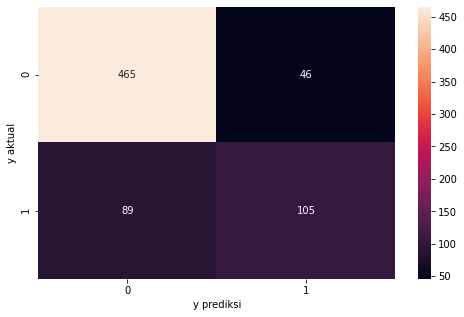

In [531]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG_test,y_predXGBRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [532]:
print(classification_report(yscalXG_test,y_predXGBRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.54      0.61       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [533]:
pd.DataFrame(data= [accuracy_score(yscalXG_test,y_predXGBRSscal)*100,recall_score(yscalXG_test,y_predXGBRSscal)*100,precision_score(yscalXG_test,y_predXGBRSscal)*100,roc_auc_score(yscalXG_test,y_predXGBRSscal)*100,f1_score(yscalXG_test,y_predXGBRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         54.123711
precission     69.536424
roc_auc_score  72.560877
F1 Score       60.869565

### All Feature with Parameter Tuning Random search and with Scalling train 80

In [534]:
modelXGBRSscal1 = XGBClassifier(subsample= 0.8, n_estimators= 500, min_child_weight= 7, max_depth= 10, learning_rate= 0.01 , gamma= 5, colsample_bytree=0.6,random_state=5)

modelXGBRSscal1.fit(xscalXG1_train,yscalXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [535]:
 #10 Folds Cross Validation 
clf_scoreXGBRSscal80 = cross_val_score(modelXGBRSscal1, xscalXG1_train, yscalXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [536]:
y_predXGBRSscal1 = modelXGBRSscal1.predict(xscalXG1_test)

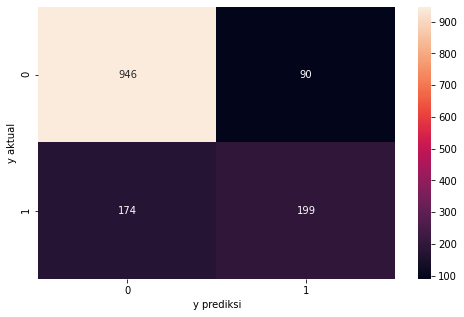

In [537]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG1_test,y_predXGBRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [538]:
print(classification_report(yscalXG1_test,y_predXGBRSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1036
         1.0       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [539]:
pd.DataFrame(data= [accuracy_score(yscalXG1_test,y_predXGBRSscal1)*100,recall_score(yscalXG1_test,y_predXGBRSscal1)*100,precision_score(yscalXG1_test,y_predXGBRSscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBRSscal1)*100,f1_score(yscalXG1_test,y_predXGBRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.263307
recall         53.351206
precission     68.858131
roc_auc_score  72.331974
F1 Score       60.120846

### Feature Selection without Parameter Tuning and without Scalling train 90

In [540]:
x_selXG = df2[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selXG  = df2["Churn"]

In [541]:
xselXG_train, xselXG_test, yselXG_train, yselXG_test = train_test_split(x_selXG, y_selXG, test_size = 0.1, random_state = 42)

In [542]:
xselXG1_train, xselXG1_test, yselXG1_train, yselXG1_test = train_test_split(x_selXG, y_selXG, test_size = 0.2, random_state = 42)

In [543]:
modelXGBsel = XGBClassifier()

modelXGBsel.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [544]:
 #10 Folds Cross Validation 
clf_scoreXGBscal = cross_val_score(modelXGBsel, xselXG_train, yselXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [545]:
y_predXGBsel = modelXGBsel.predict(xselXG_test)

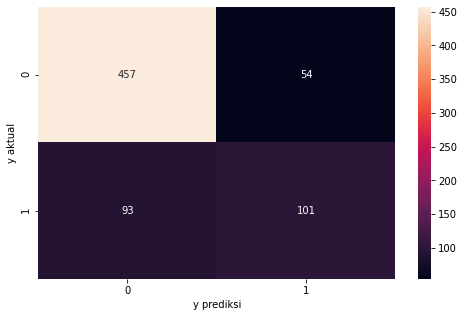

In [546]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG_test,y_predXGBsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [547]:
print(classification_report(yselXG_test,y_predXGBsel))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       511
           1       0.65      0.52      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [548]:
pd.DataFrame(data= [accuracy_score(yselXG_test,y_predXGBsel)*100,recall_score(yselXG_test,y_predXGBsel)*100,precision_score(yselXG_test,y_predXGBsel)*100,roc_auc_score(yselXG_test,y_predXGBsel)*100,f1_score(yselXG_test,y_predXGBsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.148936
recall         52.061856
precission     65.161290
roc_auc_score  70.747170
F1 Score       57.879656

### Feature Selection without Parameter Tuning and without Scalling train 80

In [549]:
modelXGBsel1 = XGBClassifier()

modelXGBsel1.fit(xselXG1_train,yselXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [550]:
 #10 Folds Cross Validation 
clf_scoreXGBscal80 = cross_val_score(modelXGBsel1, xselXG1_train, yselXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [551]:
y_predXGBsel1 = modelXGBsel1.predict(xselXG1_test)

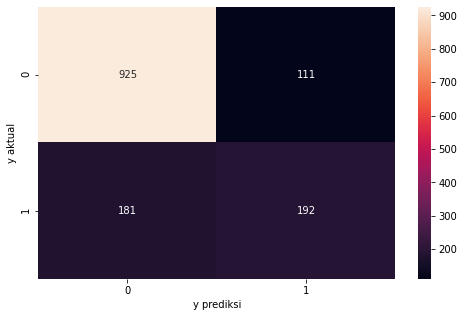

In [552]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG1_test,y_predXGBsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [553]:
print(classification_report(yselXG1_test,y_predXGBsel1))

precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [554]:
pd.DataFrame(data= [accuracy_score(yselXG1_test,y_predXGBsel1)*100,recall_score(yselXG1_test,y_predXGBsel1)*100,precision_score(yselXG1_test,y_predXGBsel1)*100,roc_auc_score(yselXG1_test,y_predXGBsel1)*100,f1_score(yselXG1_test,y_predXGBsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.276082
recall         51.474531
precission     63.366337
roc_auc_score  70.380123
F1 Score       56.804734

### Feature Selection with Parameter and without Scalling train 90

In [555]:
modelXGBRSsel = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 7, max_depth= 4, learning_rate= 0.2 ,gamma=1.5, colsample_bytree=0.8)

modelXGBRSsel.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [556]:
  #10 Folds Cross Validation 
clf_scoreXGBRSsel = cross_val_score(modelXGBRSsel, xselXG_train, yselXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [557]:
y_predXGBRSsel = modelXGBRSsel.predict(xselXG_test)

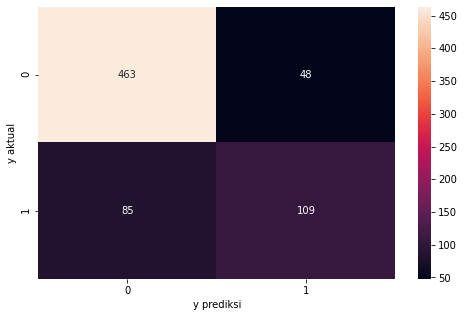

In [558]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG_test,y_predXGBRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [559]:
print(classification_report(yselXG_test,y_predXGBRSsel))

precision    recall  f1-score   support

           0       0.84      0.91      0.87       511
           1       0.69      0.56      0.62       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.75       705
weighted avg       0.80      0.81      0.80       705



In [560]:
pd.DataFrame(data= [accuracy_score(yselXG_test,y_predXGBRSsel)*100,recall_score(yselXG_test,y_predXGBRSsel)*100,precision_score(yselXG_test,y_predXGBRSsel)*100,roc_auc_score(yselXG_test,y_predXGBRSsel)*100,f1_score(yselXG_test,y_predXGBRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.134752
recall         56.185567
precission     69.426752
roc_auc_score  73.396110
F1 Score       62.108262

### Feature Selection with Parameter and without Scalling train 80

In [561]:
modelXGBRSsel1 = XGBClassifier(subsample= 0.6, n_estimators= 200, min_child_weight= 10, max_depth= 4, learning_rate= 0.2 ,gamma=0.5, colsample_bytree=0.8)

modelXGBRSsel1.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [562]:
  #10 Folds Cross Validation 
clf_scoreXGBRSsel80 = cross_val_score(modelXGBRSsel1, xselXG1_train, yselXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [563]:
y_predXGBRSsel1 = modelXGBRSsel1.predict(xselXG1_test)

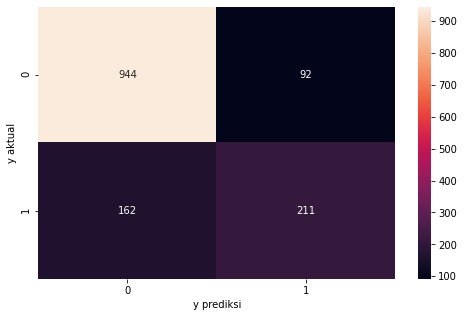

In [564]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG1_test,y_predXGBRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [565]:
BestXGB = pd.DataFrame(classification_report(yselXG1_test,y_predXGBRSsel1, target_names= labels, output_dict=True)).T

In [566]:
print(classification_report(yselXG1_test,y_predXGBRSsel1))

precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [567]:
pd.DataFrame(data= [accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.973031
recall         56.568365
precission     69.636964
roc_auc_score  73.844028
F1 Score       62.426036

### Feature Selection without Parameter and with Scalling train 90

In [568]:
x_selXGBScal = df2_Scal[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selXGBScal  = df2_Scal["Churn"]

In [569]:
xselXGBscal_train, xselXGBscal_test, yselXGBscal_train, yselXGBscal_test = train_test_split(x_selXGBScal, y_selXGBScal, test_size = 0.1, random_state = 42)

In [570]:
xselXGBscal1_train, xselXGBscal1_test, yselXGBscal1_train, yselXGBscal1_test = train_test_split(x_selXGBScal, y_selXGBScal, test_size = 0.2, random_state = 42)

In [571]:
modelXGBselscal = XGBClassifier()

modelXGBselscal.fit(xselXGBscal_train,yselXGBscal_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [572]:
  #10 Folds Cross Validation 
clf_scoreXGBselscal = cross_val_score(modelXGBselscal, xselXGBscal_train, yselXGBscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [573]:
y_predXGBselscal = modelXGBselscal.predict(xselXGBscal_test)

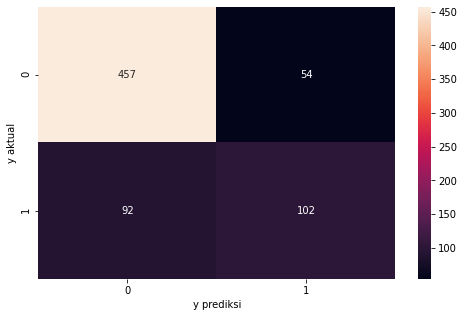

In [574]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal_test,y_predXGBselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [575]:
print(classification_report(yselXGBscal_test,y_predXGBselscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       511
         1.0       0.65      0.53      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.79       705



In [576]:
pd.DataFrame(data= [accuracy_score(yselXGBscal_test,y_predXGBselscal)*100,recall_score(yselXGBscal_test,y_predXGBselscal)*100,precision_score(yselXGBscal_test,y_predXGBselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBselscal)*100,f1_score(yselXGBscal_test,y_predXGBselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.290780
recall         52.577320
precission     65.384615
roc_auc_score  71.004902
F1 Score       58.285714

### Feature Selection without Parameter and with Scalling train 80

In [577]:
modelXGBselscal1 = XGBClassifier()

modelXGBselscal1.fit(xselXGBscal1_train,yselXGBscal1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [578]:
  #10 Folds Cross Validation 
clf_scoreXGBselscal80 = cross_val_score(modelXGBselscal1, xselXGBscal1_train, yselXGBscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [579]:
y_predXGBselscal1 = modelXGBselscal1.predict(xselXGBscal1_test)

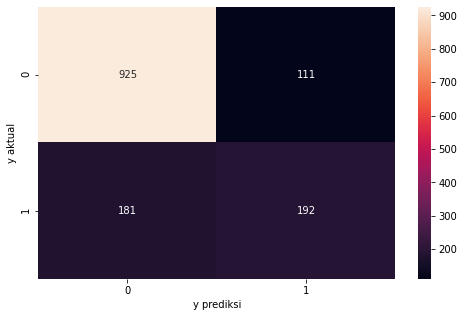

In [580]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal1_test,y_predXGBselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [581]:
print(classification_report(yselXGBscal1_test,y_predXGBselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1036
         1.0       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [582]:
pd.DataFrame(data= [accuracy_score(yselXGBscal1_test,y_predXGBselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.276082
recall         51.474531
precission     63.366337
roc_auc_score  70.380123
F1 Score       56.804734

### Feature Selection with Parameter Tuning Random Search but with Scalling train 90

In [583]:
modelXGBRSselscal = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 7, max_depth= 5, learning_rate= 0.01 ,gamma=1, colsample_bytree=0.8)

modelXGBRSselscal.fit(xselXGBscal_train,yselXGBscal_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [584]:
  #10 Folds Cross Validation 
clf_scoreXGBRSselscal = cross_val_score(modelXGBRSselscal, xselXGBscal_train, yselXGBscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [585]:
y_predXGBRSselscal = modelXGBRSselscal.predict(xselXGBscal_test)

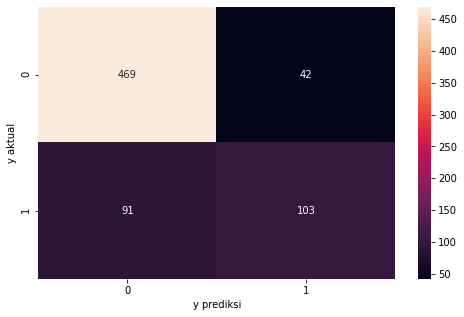

In [586]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal_test,y_predXGBRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [587]:
print(classification_report(yselXGBscal_test,y_predXGBRSselscal))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.71      0.53      0.61       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [588]:
pd.DataFrame(data= [accuracy_score(yselXGBscal_test,y_predXGBRSselscal)*100,recall_score(yselXGBscal_test,y_predXGBRSselscal)*100,precision_score(yselXGBscal_test,y_predXGBRSselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBRSselscal)*100,f1_score(yselXGBscal_test,y_predXGBRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.134752
recall         53.092784
precission     71.034483
roc_auc_score  72.436803
F1 Score       60.766962

### Feature Selection with Parameter Tuning Random Search but with Scalling train 80

In [589]:
modelXGBRSselscal1 = XGBClassifier(subsample= 0.8, n_estimators= 100, min_child_weight= 10, max_depth= 3, learning_rate= 0.1 ,gamma=0.5, colsample_bytree=0.8)

modelXGBRSselscal1.fit(xselXGBscal1_train,yselXGBscal1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [590]:
  #10 Folds Cross Validation 
clf_scoreXGBRSselscal1 = cross_val_score(modelXGBRSselscal1, xselXGBscal1_train, yselXGBscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [591]:
y_predXGBRSselscal1 = modelXGBRSselscal1.predict(xselXGBscal1_test)

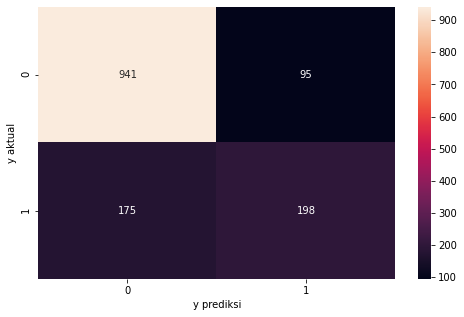

In [592]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal1_test,y_predXGBRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [593]:
print(classification_report(yselXGBscal1_test,y_predXGBRSselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [594]:
pd.DataFrame(data= [accuracy_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.837473
recall         53.083110
precission     67.576792
roc_auc_score  71.956613
F1 Score       59.459459

In [595]:
XGB_Summary = pd.DataFrame({"XGB": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90": [accuracy_score(yXGB_test,y_predXGB)*100,recall_score(yXGB_test,y_predXGB)*100,precision_score(yXGB_test,y_predXGB)*100,roc_auc_score(yXGB_test,y_predXGB)*100,f1_score(yXGB_test,y_predXGB)*100],
                                 "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yXGB1_test,y_predXGB1)*100,recall_score(yXGB1_test,y_predXGB1)*100,precision_score(yXGB1_test,y_predXGB1)*100,roc_auc_score(yXGB1_test,y_predXGB1)*100,f1_score(yXGB1_test,y_predXGB1)*100],
                                 "All Feature with Parameter Tuning Random Search and without Scalling train 90": [accuracy_score(yXGB_test,y_predXGBRS)*100,recall_score(yXGB_test,y_predXGBRS)*100,precision_score(yXGB_test,y_predXGBRS)*100,roc_auc_score(yXGB_test,y_predXGBRS)*100,f1_score(yXGB_test,y_predXGBRS)*100],
                                 "All Feature with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yXGB1_test,y_predXGBRS1)*100,recall_score(yXGB1_test,y_predXGBRS1)*100,precision_score(yXGB1_test,y_predXGBRS1)*100,roc_auc_score(yXGB1_test,y_predXGBRS1)*100,f1_score(yXGB1_test,y_predXGBRS1)*100],
                                 "All Feature without Parameter Tuning Random search but with Scalling train 90":[accuracy_score(yscalXG_test,y_predXGBscal)*100,recall_score(yscalXG_test,y_predXGBscal)*100,precision_score(yscalXG_test,y_predXGBscal)*100,roc_auc_score(yscalXG_test,y_predXGBscal)*100,f1_score(yscalXG_test,y_predXGBscal)*100],
                                 "All Feature without Parameter Tuning Random search but with Scalling train 80":[accuracy_score(yscalXG1_test,y_predXGBscal1)*100,recall_score(yscalXG1_test,y_predXGBscal1)*100,precision_score(yscalXG1_test,y_predXGBscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBscal1)*100,f1_score(yscalXG1_test,y_predXGBscal1)*100],
                                 "All Feature with Parameter Tuning Random search and with Scalling train 90":[accuracy_score(yscalXG_test,y_predXGBRSscal)*100,recall_score(yscalXG_test,y_predXGBRSscal)*100,precision_score(yscalXG_test,y_predXGBRSscal)*100,roc_auc_score(yscalXG_test,y_predXGBRSscal)*100,f1_score(yscalXG_test,y_predXGBRSscal)*100],
                                 "All Feature with Parameter Tuning Random search and with Scalling train 80":[accuracy_score(yscalXG1_test,y_predXGBRSscal1)*100,recall_score(yscalXG1_test,y_predXGBRSscal1)*100,precision_score(yscalXG1_test,y_predXGBRSscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBRSscal1)*100,f1_score(yscalXG1_test,y_predXGBRSscal1)*100],
                                 "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselXG_test,y_predXGBsel)*100,recall_score(yselXG_test,y_predXGBsel)*100,precision_score(yselXG_test,y_predXGBsel)*100,roc_auc_score(yselXG_test,y_predXGBsel)*100,f1_score(yselXG_test,y_predXGBsel)*100],
                                 "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBsel1)*100,recall_score(yselXG1_test,y_predXGBsel1)*100,precision_score(yselXG1_test,y_predXGBsel1)*100,roc_auc_score(yselXG1_test,y_predXGBsel1)*100,f1_score(yselXG1_test,y_predXGBsel1)*100],
                                  "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselXG_test,y_predXGBRSsel)*100,recall_score(yselXG_test,y_predXGBRSsel)*100,precision_score(yselXG_test,y_predXGBRSsel)*100,roc_auc_score(yselXG_test,y_predXGBRSsel)*100,f1_score(yselXG_test,y_predXGBRSsel)*100],
                                   "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselXGBscal_test,y_predXGBselscal)*100,recall_score(yselXGBscal_test,y_predXGBselscal)*100,precision_score(yselXGBscal_test,y_predXGBselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBselscal)*100,f1_score(yselXGBscal_test,y_predXGBselscal)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselXGBscal1_test,y_predXGBselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBselscal1)*100],
                                   "Feature Selection with Parameter Tuning but with Scalling train 90": [accuracy_score(yselXGBscal_test,y_predXGBRSselscal)*100,recall_score(yselXGBscal_test,y_predXGBRSselscal)*100,precision_score(yselXGBscal_test,y_predXGBRSselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBRSselscal)*100,f1_score(yselXGBscal_test,y_predXGBRSselscal)*100],
                                   "Feature Selection with Parameter Tuning but with Scalling train 80":[accuracy_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBRSselscal1)*100]






})
d = XGB_Summary.set_index("XGB").T
d 

XGB                                                  accuracy     recall  \
All Feature without Parameter Tuning and withou...  78.865248  52.061856   
All Feature without Parameter Tuning and withou...  79.559972  52.278820   
All Feature with Parameter Tuning Random Search...  80.709220  52.061856   
All Feature with Parameter Tuning Random Search...  81.263307  53.887399   
All Feature without Parameter Tuning Random sea...  78.865248  52.061856   
All Feature without Parameter Tuning Random sea...  79.559972  52.278820   
All Feature with Parameter Tuning Random search...  80.851064  54.123711   
All Feature with Parameter Tuning Random search...  81.263307  53.351206   
Feature Selection without Parameter Tuning and ...  79.148936  52.061856   
Feature Selection without Parameter Tuning and ...  79.276082  51.474531   
Feature Selection with Parameter Tuning and wit...  81.134752  56.185567   
Feature Selection with Parameter Tuning and wit...  81.973031  56.568365   
Feature Selection without Parameter Tuning but ...  79.290780  52.577320   
Feature Selection without Parameter Tuning but ...  79.276082  51.474531   
Feature Selection with Parameter Tuning but wit...  81.134752  53.092784   
Feature Selection with Parameter Tuning but wit...  80.837473  53.083110   

XGB                                                 precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  64.331210      70.551476   
All Feature without Parameter Tuning and withou...  63.934426      70.830530   
All Feature with Parameter Tuning Random Search...  70.138889      71.823491   
All Feature with Parameter Tuning Random Search...  68.600683      72.503545   
All Feature without Parameter Tuning Random sea...  64.331210      70.551476   
All Feature without Parameter Tuning Random sea...  63.934426      70.830530   
All Feature with Parameter Tuning Random search...  69.536424      72.560877   
All Feature with Parameter Tuning Random search...  68.858131      72.331974   
Feature Selection without Parameter Tuning and ...  65.161290      70.747170   
Feature Selection without Parameter Tuning and ...  63.366337      70.380123   
Feature Selection with Parameter Tuning and wit...  69.426752      73.396110   
Feature Selection with Parameter Tuning and wit...  69.636964      73.844028   
Feature Selection without Parameter Tuning but ...  65.384615      71.004902   
Feature Selection without Parameter Tuning but ...  63.366337      70.380123   
Feature Selection with Parameter Tuning but wit...  71.034483      72.436803   
Feature Selection with Parameter Tuning but wit...  67.576792      71.956613   

XGB                                                  f1_score  
All Feature without Parameter Tuning and withou...  57.549858  
All Feature without Parameter Tuning and withou...  57.522124  
All Feature with Parameter Tuning Random Search...  59.763314  
All Feature with Parameter Tuning Random Search...  60.360360  
All Feature without Parameter Tuning Random sea...  57.549858  
All Feature without Parameter Tuning Random sea...  57.522124  
All Feature with Parameter Tuning Random search...  60.869565  
All Feature with Parameter Tuning Random search...  60.120846  
Feature Selection without Parameter Tuning and ...  57.879656  
Feature Selection without Parameter Tuning and ...  56.804734  
Feature Selection with Parameter Tuning and wit...  62.108262  
Feature Selection with Parameter Tuning and wit...  62.426036  
Feature Selection without Parameter Tuning but ...  58.285714  
Feature Selection without Parameter Tuning but ...  56.804734  
Feature Selection with Parameter Tuning but wit...  60.766962  
Feature Selection with Parameter Tuning but wit...  59.459459

## The Best Condition Model Test XGB : Feature Selection with Parameter Tuning and without Scalling train 80

In [596]:
XGB_Summary = pd.DataFrame({"XGB": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100]})
XGB_Summary.set_index("XGB").T

XGB                                                  accuracy     recall  \
Feature Selection with Parameter Tuning and wit...  81.973031  56.568365   

XGB                                                 precision  roc_auc_score  \
Feature Selection with Parameter Tuning and wit...  69.636964      73.844028   

XGB                                                  f1_score  
Feature Selection with Parameter Tuning and wit...  62.426036

In [597]:
BestXGB

precision    recall  f1-score     support
Not Churned    0.853526  0.911197  0.881419  1036.00000
Churned        0.696370  0.565684  0.624260   373.00000
accuracy       0.819730  0.819730  0.819730     0.81973
macro avg      0.774948  0.738440  0.752840  1409.00000
weighted avg   0.811923  0.819730  0.813342  1409.00000

# Gradient Boosting

In [598]:
df_Grad = df2.copy()

In [599]:

xGrad = df_Grad.drop(["Churn"],axis=1)
yGrad = df_Grad["Churn"]


In [600]:
xGrad_train, xGrad_test, yGrad_train, yGrad_test = train_test_split(xGrad, yGrad, test_size = 0.1, random_state = 42)

In [601]:
xGrad1_train, xGrad1_test, yGrad1_train, yGrad1_test = train_test_split(xGrad, yGrad, test_size = 0.2, random_state = 42)

### All Feature without Parameter Tuning and without Scalling train 90

In [602]:
modelGrad = GradientBoostingClassifier()

modelGrad.fit(xGrad_train,yGrad_train)

GradientBoostingClassifier()

In [603]:
  #10 Folds Cross Validation 
clf_scoreGrad= cross_val_score(modelGrad, xGrad_train, yGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [604]:
y_predGrad = modelGrad.predict(xGrad_test)

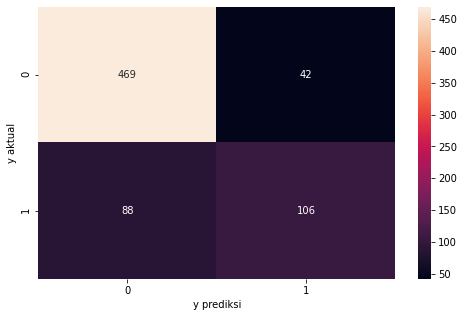

In [605]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad_test,y_predGrad),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [606]:
print(classification_report(yGrad_test,y_predGrad))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.72      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [607]:
pd.DataFrame(data= [accuracy_score(yGrad_test,y_predGrad)*100,recall_score(yGrad_test,y_predGrad)*100,precision_score(yGrad_test,y_predGrad)*100,roc_auc_score(yGrad_test,y_predGrad)*100,f1_score(yGrad_test,y_predGrad)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.560284
recall         54.639175
precission     71.621622
roc_auc_score  73.209999
F1 Score       61.988304

### All Feature without Parameter Tuning and without Scalling train 80

In [608]:
modelGrad1 = GradientBoostingClassifier()

modelGrad1.fit(xGrad1_train,yGrad1_train)

GradientBoostingClassifier()

In [609]:
  #10 Folds Cross Validation 
clf_scoreGrad1= cross_val_score(modelGrad1, xGrad1_train, yGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [610]:
y_predGrad1 = modelGrad1.predict(xGrad1_test)

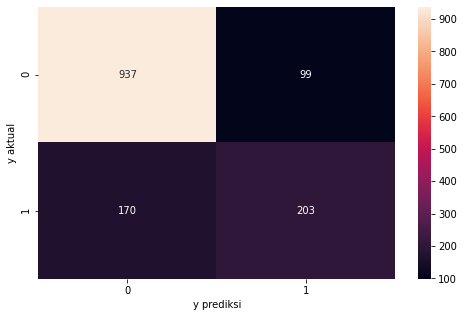

In [611]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad1_test,y_predGrad1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [612]:
print(classification_report(yGrad1_test,y_predGrad1))

precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [613]:
pd.DataFrame(data= [accuracy_score(yGrad1_test,y_predGrad1)*100,recall_score(yGrad1_test,y_predGrad1)*100,precision_score(yGrad1_test,y_predGrad1)*100,roc_auc_score(yGrad1_test,y_predGrad1)*100,f1_score(yGrad1_test,y_predGrad1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         54.423592
precission     67.218543
roc_auc_score  72.433804
F1 Score       60.148148

### All Feature with Parameter Tuning and without Scalling train 90

In [614]:
modelGradRS = GradientBoostingClassifier(learning_rate=1, max_depth=3,min_samples_leaf=9, n_estimators=5,random_state=500)

modelGradRS.fit(xGrad_train,yGrad_train)

GradientBoostingClassifier(learning_rate=1, min_samples_leaf=9, n_estimators=5,
                           random_state=500)

In [615]:
  #10 Folds Cross Validation 
clf_scoreGradRS= cross_val_score(modelGradRS, xGrad_train, yGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [616]:
y_predGradRS = modelGradRS.predict(xGrad_test)

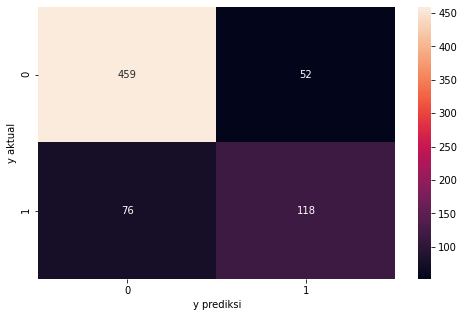

In [617]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad_test,y_predGradRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [618]:
BestGrad = pd.DataFrame(classification_report(yGrad_test,y_predGradRS, target_names= labels, output_dict=True)).T

In [619]:
print(classification_report(yGrad_test,y_predGradRS))

precision    recall  f1-score   support

           0       0.86      0.90      0.88       511
           1       0.69      0.61      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.81       705



In [620]:
pd.DataFrame(data= [accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.843972
recall         60.824742
precission     69.411765
roc_auc_score  75.324309
F1 Score       64.835165

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [621]:
modelGradRS1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=1,min_samples_leaf=1, n_estimators=50,random_state=100)

modelGradRS1.fit(xGrad1_train,yGrad1_train)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=100)

In [622]:
  #10 Folds Cross Validation 
clf_scoreGradRS1= cross_val_score(modelGradRS1, xGrad1_train, yGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [623]:
y_predGradRS1 = modelGradRS1.predict(xGrad1_test)

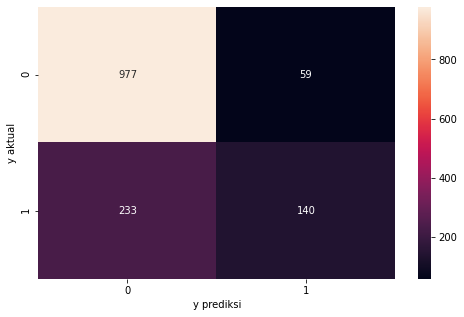

In [624]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad1_test,y_predGradRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [625]:
print(classification_report(yGrad1_test,y_predGradRS1))

precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.76      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



In [626]:
pd.DataFrame(data= [accuracy_score(yGrad1_test,y_predGradRS1)*100,recall_score(yGrad1_test,y_predGradRS1)*100,precision_score(yGrad1_test,y_predGradRS1)*100,roc_auc_score(yGrad1_test,y_predGradRS1)*100,f1_score(yGrad1_test,y_predGradRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.276082
recall         37.533512
precission     70.351759
roc_auc_score  65.919266
F1 Score       48.951049

### All Feature without Parameter Tuning Random Search but with Scalling train 90

In [627]:
xscalGrad = df2_Scal.drop(["Churn"],axis=1)
yscalGrad = df2_Scal["Churn"]

In [628]:
xscalGrad_train, xscalGrad_test, yscalGrad_train, yscalGrad_test = train_test_split(xscalGrad, yscalGrad, test_size = 0.1, random_state = 42)

In [629]:
xscalGrad1_train, xscalGrad1_test, yscalGrad1_train, yscalGrad1_test = train_test_split(xscalGrad, yscalGrad, test_size = 0.2, random_state = 42)

In [630]:
modelGradscal = GradientBoostingClassifier()

modelGradscal.fit(xscalGrad_train,yscalGrad_train)

GradientBoostingClassifier()

In [631]:
  #10 Folds Cross Validation 
clf_scoreGradscal= cross_val_score(modelGradscal, xscalGrad_train, yscalGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [632]:
y_predGradscal = modelGradscal.predict(xscalGrad_test)

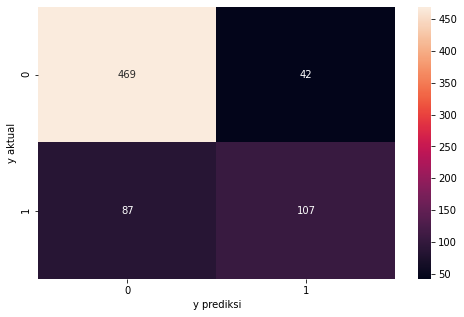

In [633]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad_test,y_predGradscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [634]:
print(classification_report(yscalGrad_test,y_predGradscal))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.72      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [635]:
pd.DataFrame(data= [accuracy_score(yscalGrad_test,y_predGradscal)*100,recall_score(yscalGrad_test,y_predGradscal)*100,precision_score(yscalGrad_test,y_predGradscal)*100,roc_auc_score(yscalGrad_test,y_predGradscal)*100,f1_score(yscalGrad_test,y_predGradscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.702128
recall         55.154639
precission     71.812081
roc_auc_score  73.467731
F1 Score       62.390671

### All Feature without Parameter Tuning Random Search but with Scalling train 80

In [636]:
modelGradscal1 = GradientBoostingClassifier()

modelGradscal1.fit(xscalGrad1_train,yscalGrad1_train)

GradientBoostingClassifier()

In [637]:
  #10 Folds Cross Validation 
clf_scoreGradscal80= cross_val_score(modelGradscal1, xscalGrad1_train, yscalGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [638]:
y_predGradscal1 = modelGradscal1.predict(xscalGrad1_test)

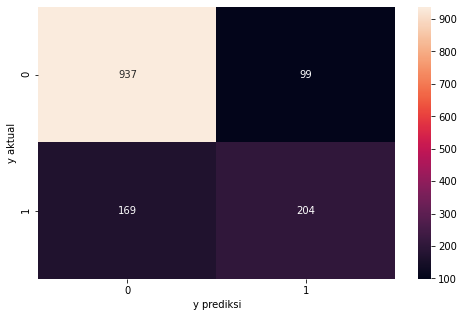

In [639]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad1_test,y_predGradscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [640]:
print(classification_report(yscalGrad1_test,y_predGradscal1))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1036
         1.0       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [641]:
pd.DataFrame(data= [accuracy_score(yscalGrad1_test,y_predGradscal1)*100,recall_score(yscalGrad1_test,y_predGradscal1)*100,precision_score(yscalGrad1_test,y_predGradscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradscal1)*100,f1_score(yscalGrad1_test,y_predGradscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.979418
recall         54.691689
precission     67.326733
roc_auc_score  72.567852
F1 Score       60.355030

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [642]:
modelGradRSscal = GradientBoostingClassifier(learning_rate=0.01, max_depth=9,min_samples_leaf=7, n_estimators=500,random_state=500)

modelGradRSscal.fit(xscalGrad_train,yscalGrad_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, min_samples_leaf=7,
                           n_estimators=500, random_state=500)

In [643]:
  #10 Folds Cross Validation 
clf_scoreGradRSscal= cross_val_score(modelGradRSscal, xscalGrad_train, yscalGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [644]:
y_predGradRSscal = modelGradRSscal.predict(xscalGrad_test)

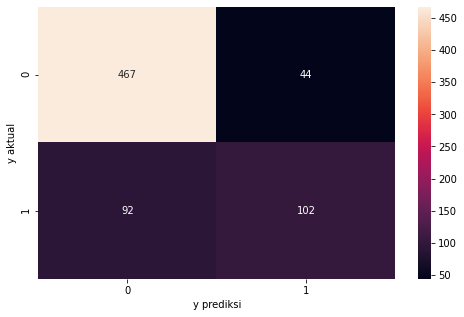

In [645]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad_test,y_predGradRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [646]:
print(classification_report(yscalGrad_test,y_predGradRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.53      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [647]:
pd.DataFrame(data= [accuracy_score(yscalGrad_test,y_predGradRSscal)*100,recall_score(yscalGrad_test,y_predGradRSscal)*100,precision_score(yscalGrad_test,y_predGradRSscal)*100,roc_auc_score(yscalGrad_test,y_predGradRSscal)*100,f1_score(yscalGrad_test,y_predGradRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.709220
recall         52.577320
precission     69.863014
roc_auc_score  71.983376
F1 Score       60.000000

### All Feature with Parameter Tuning Random Search and with Scalling train 80

In [648]:
modelGradRSscal1 = GradientBoostingClassifier(learning_rate=1, max_depth=1,min_samples_leaf=5, n_estimators=50,random_state=200)

modelGradRSscal1.fit(xscalGrad1_train,yscalGrad1_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, min_samples_leaf=5,
                           n_estimators=50, random_state=200)

In [649]:
  #10 Folds Cross Validation 
clf_scoreGradRSscal80= cross_val_score(modelGradRSscal1, xscalGrad1_train, yscalGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [650]:
y_predGradRSscal1 = modelGradRSscal1.predict(xscalGrad1_test)

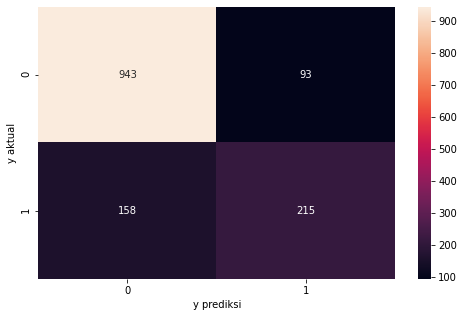

In [651]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad1_test,y_predGradRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [652]:
print(classification_report(yscalGrad1_test,y_predGradRSscal1))

precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1036
         1.0       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [653]:
pd.DataFrame(data= [accuracy_score(yscalGrad1_test,y_predGradRSscal1)*100,recall_score(yscalGrad1_test,y_predGradRSscal1)*100,precision_score(yscalGrad1_test,y_predGradRSscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradRSscal1)*100,f1_score(yscalGrad1_test,y_predGradRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.185947
recall         57.640751
precission     69.805195
roc_auc_score  74.331958
F1 Score       63.142438

### Feature Selection without Parameter Tuning Random Search and without Scalling train 90

In [654]:
x_selGrad = df2[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selGrad  = df2["Churn"]

In [655]:
xselGrad_train, xselGrad_test, yselGrad_train, yselGrad_test = train_test_split(x_selGrad, y_selGrad, test_size = 0.1, random_state = 42)

In [656]:
xselGrad1_train, xselGrad1_test, yselGrad1_train, yselGrad1_test = train_test_split(x_selGrad, y_selGrad, test_size = 0.2, random_state = 42)

In [657]:
modelGradsel = GradientBoostingClassifier()

modelGradsel.fit(xselGrad_train,yselGrad_train)

GradientBoostingClassifier()

In [658]:
  #10 Folds Cross Validation 
clf_scoreGradsel= cross_val_score(modelGradsel, xselGrad_train, yselGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [659]:
y_predGradsel = modelGradsel.predict(xselGrad_test)

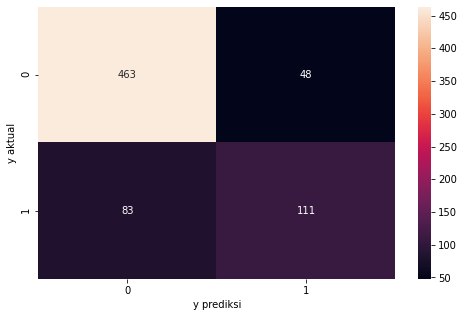

In [660]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad_test,y_predGradsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [661]:
print(classification_report(yselGrad_test,y_predGradsel))

precision    recall  f1-score   support

           0       0.85      0.91      0.88       511
           1       0.70      0.57      0.63       194

    accuracy                           0.81       705
   macro avg       0.77      0.74      0.75       705
weighted avg       0.81      0.81      0.81       705



In [662]:
pd.DataFrame(data= [accuracy_score(yselGrad_test,y_predGradsel)*100,recall_score(yselGrad_test,y_predGradsel)*100,precision_score(yselGrad_test,y_predGradsel)*100,roc_auc_score(yselGrad_test,y_predGradsel)*100,f1_score(yselGrad_test,y_predGradsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.418440
recall         57.216495
precission     69.811321
roc_auc_score  73.911574
F1 Score       62.889518

### Feature Selection without Parameter Tuning Random Search and without Scalling train 80

In [663]:
modelGradsel1 = GradientBoostingClassifier()

modelGradsel1.fit(xselGrad1_train,yselGrad1_train)

GradientBoostingClassifier()

In [664]:
  #10 Folds Cross Validation 
clf_scoreGradsel80= cross_val_score(modelGradsel1, xselGrad1_train, yselGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [665]:
y_predGradsel1 = modelGradsel1.predict(xselGrad1_test)

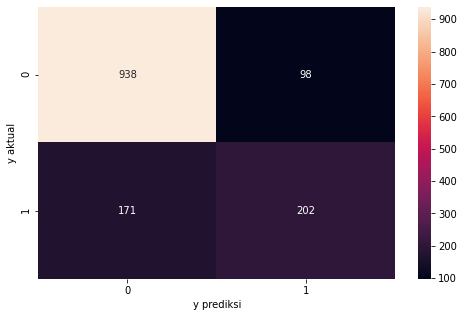

In [666]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad1_test,y_predGradsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [667]:
print(classification_report(yselGrad1_test,y_predGradsel1))

precision    recall  f1-score   support

           0       0.85      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [668]:
pd.DataFrame(data= [accuracy_score(yselGrad1_test,y_predGradsel1)*100,recall_score(yselGrad1_test,y_predGradsel1)*100,precision_score(yselGrad1_test,y_predGradsel1)*100,roc_auc_score(yselGrad1_test,y_predGradsel1)*100,f1_score(yselGrad1_test,y_predGradsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         54.155496
precission     67.333333
roc_auc_score  72.348018
F1 Score       60.029718

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [669]:
modelGradRSsel = GradientBoostingClassifier(learning_rate=1, max_depth=1,min_samples_leaf=9, n_estimators=5,random_state=100)

modelGradRSsel.fit(xselGrad_train,yselGrad_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, min_samples_leaf=9,
                           n_estimators=5, random_state=100)

In [670]:
  #10 Folds Cross Validation 
clf_scoreGradRSsel= cross_val_score(modelGradRSsel, xselGrad_train, yselGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [671]:
y_predGradRSsel = modelGradRSsel.predict(xselGrad_test)

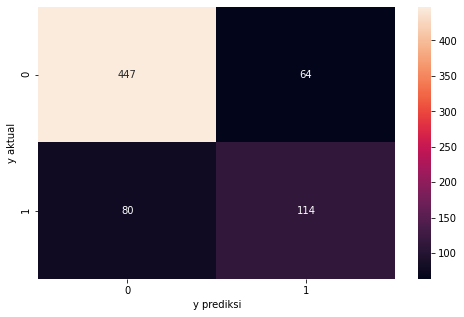

In [672]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad_test,y_predGradRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [673]:
print(classification_report(yselGrad_test,y_predGradRSsel))

precision    recall  f1-score   support

           0       0.85      0.87      0.86       511
           1       0.64      0.59      0.61       194

    accuracy                           0.80       705
   macro avg       0.74      0.73      0.74       705
weighted avg       0.79      0.80      0.79       705



In [674]:
pd.DataFrame(data= [accuracy_score(yselGrad_test,y_predGradRSsel)*100,recall_score(yselGrad_test,y_predGradRSsel)*100,precision_score(yselGrad_test,y_predGradRSsel)*100,roc_auc_score(yselGrad_test,y_predGradRSsel)*100,f1_score(yselGrad_test,y_predGradRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.574468
recall         58.762887
precission     64.044944
roc_auc_score  73.119212
F1 Score       61.290323

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [675]:
modelGradRSsel1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5,min_samples_leaf=7, n_estimators=500,random_state=200)

modelGradRSsel1.fit(xselGrad1_train,yselGrad1_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=7, n_estimators=500,
                           random_state=200)

In [676]:
  #10 Folds Cross Validation 
clf_scoreGradRSsel80= cross_val_score(modelGradRSsel1, xselGrad1_train, yselGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [677]:
y_predGradRSsel1 = modelGradRSsel1.predict(xselGrad1_test)

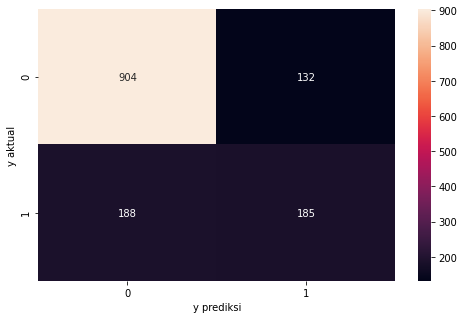

In [678]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad1_test,y_predGradRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [679]:
print(classification_report(yselGrad1_test,y_predGradRSsel1))

precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.50      0.54       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [680]:
pd.DataFrame(data= [accuracy_score(yselGrad1_test,y_predGradRSsel1)*100,recall_score(yselGrad1_test,y_predGradRSsel1)*100,precision_score(yselGrad1_test,y_predGradRSsel1)*100,roc_auc_score(yselGrad1_test,y_predGradRSsel1)*100,f1_score(yselGrad1_test,y_predGradRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       77.288857
recall         49.597855
precission     58.359621
roc_auc_score  68.428271
F1 Score       53.623188

### Feature Selection without Parameter Tuning but with Scalling train 90

In [681]:
x_selGradScal = df2_Scal[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]]
y_selGradScal  = df2_Scal["Churn"]

In [682]:
xselGradscal_train, xselGradscal_test, yselGradscal_train, yselGradscal_test = train_test_split(x_selGradScal, y_selGradScal, test_size = 0.1, random_state = 42)

In [683]:
xselGradscal1_train, xselGradscal1_test, yselGradscal1_train, yselGradscal1_test = train_test_split(x_selGradScal, y_selGradScal, test_size = 0.2, random_state = 42)

In [684]:
modelGradselscal = GradientBoostingClassifier()

modelGradselscal.fit(xselGradscal_train,yselGradscal_train)

GradientBoostingClassifier()

In [685]:
  #10 Folds Cross Validation 
clf_scoreGradselscal= cross_val_score(modelGradselscal, xselGradscal_train, yselGradscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [686]:
y_predGradselscal = modelGradselscal.predict(xselGradscal_test)

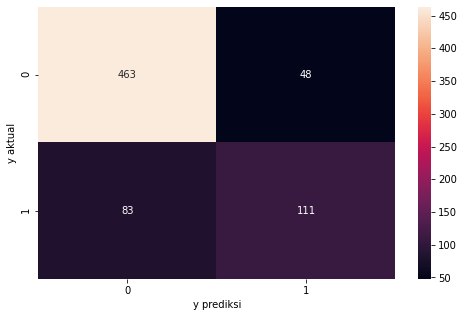

In [687]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal_test,y_predGradselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [688]:
print(classification_report(yselGradscal_test,y_predGradselscal))

precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       511
         1.0       0.70      0.57      0.63       194

    accuracy                           0.81       705
   macro avg       0.77      0.74      0.75       705
weighted avg       0.81      0.81      0.81       705



In [689]:
pd.DataFrame(data= [accuracy_score(yselGradscal_test,y_predGradselscal)*100,recall_score(yselGrad_test,y_predGradselscal)*100,precision_score(yselGradscal_test,y_predGradselscal)*100,roc_auc_score(yselGradscal_test,y_predGradselscal)*100,f1_score(yselGradscal_test,y_predGradselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.418440
recall         57.216495
precission     69.811321
roc_auc_score  73.911574
F1 Score       62.889518

### Feature Selection without Parameter Tuning but with Scalling train 80

In [690]:
modelGradselscal1 = GradientBoostingClassifier()

modelGradselscal1.fit(xselGradscal1_train,yselGradscal1_train)

GradientBoostingClassifier()

In [691]:
  #10 Folds Cross Validation 
clf_scoreGradselscal80= cross_val_score(modelGradselscal1, xselGradscal1_train, yselGradscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [692]:
y_predGradselscal1 = modelGradselscal1.predict(xselGradscal1_test)

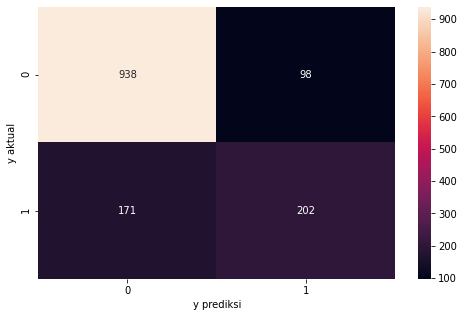

In [693]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal1_test,y_predGradselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [694]:
print(classification_report(yselGradscal1_test,y_predGradselscal1))

precision    recall  f1-score   support

         0.0       0.85      0.91      0.87      1036
         1.0       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [695]:
pd.DataFrame(data= [accuracy_score(yselGradscal1_test,y_predGradselscal1)*100,recall_score(yselGrad1_test,y_predGradselscal1)*100,precision_score(yselGradscal1_test,y_predGradselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradselscal1)*100,f1_score(yselGradscal1_test,y_predGradselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         54.155496
precission     67.333333
roc_auc_score  72.348018
F1 Score       60.029718

### Feature Selection with Parameter Tuning Random Search and with Scalling train 90

In [696]:
modelGradRSselscal = GradientBoostingClassifier(learning_rate=0.01, max_depth=5,min_samples_leaf=9, n_estimators=250,random_state=200)

modelGradRSselscal.fit(xselGradscal_train,yselGradscal_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=9,
                           n_estimators=250, random_state=200)

In [697]:
  #10 Folds Cross Validation 
clf_scoreGradRSselscal= cross_val_score(modelGradRSselscal, xselGradscal_train, yselGradscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [698]:
y_predGradRSselscal = modelGradRSselscal.predict(xselGradscal_test)

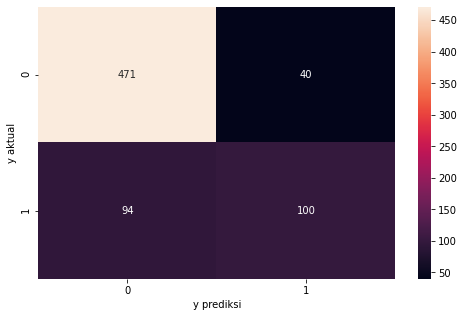

In [699]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal_test,y_predGradRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [700]:
print(classification_report(yselGradscal_test,y_predGradRSselscal))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       511
         1.0       0.71      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [701]:
pd.DataFrame(data= [accuracy_score(yselGradscal_test,y_predGradRSselscal)*100,recall_score(yselGrad_test,y_predGradRSselscal)*100,precision_score(yselGradscal_test,y_predGradRSselscal)*100,roc_auc_score(yselGradscal_test,y_predGradRSselscal)*100,f1_score(yselGradscal_test,y_predGradRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         51.546392
precission     71.428571
roc_auc_score  71.859302
F1 Score       59.880240

### Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [702]:
modelGradRSselscal1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=3,min_samples_leaf=7, n_estimators=250,random_state=500)

modelGradRSselscal1.fit(xselGradscal1_train,yselGradscal1_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=7,
                           n_estimators=250, random_state=500)

In [703]:
  #10 Folds Cross Validation 
clf_scoreGradRSselscal80= cross_val_score(modelGradRSselscal1, xselGradscal1_train, yselGradscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [704]:
y_predGradRSselscal1 = modelGradRSselscal1.predict(xselGradscal1_test)

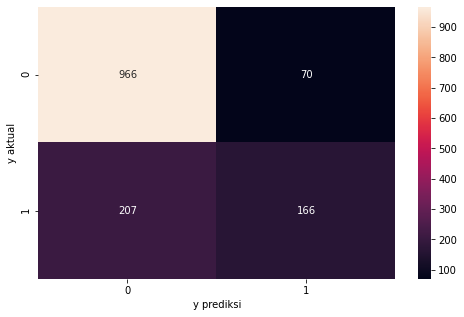

In [705]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal1_test,y_predGradRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [706]:
print(classification_report(yselGradscal1_test,y_predGradRSselscal1))

precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1036
         1.0       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [707]:
pd.DataFrame(data= [accuracy_score(yselGradscal1_test,y_predGradRSselscal1)*100,recall_score(yselGrad1_test,y_predGradRSselscal1)*100,precision_score(yselGradscal1_test,y_predGradRSselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradRSselscal1)*100,f1_score(yselGradscal1_test,y_predGradRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.340667
recall         44.504021
precission     70.338983
roc_auc_score  68.873632
F1 Score       54.515599

In [708]:
Grad_Summary = pd.DataFrame({"Gradient Boosting": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGrad)*100,recall_score(yGrad_test,y_predGrad)*100,precision_score(yGrad_test,y_predGrad)*100,roc_auc_score(yGrad_test,y_predGrad)*100,f1_score(yGrad_test,y_predGrad)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yGrad1_test,y_predGrad1)*100,recall_score(yGrad1_test,y_predGrad1)*100,precision_score(yGrad1_test,y_predGrad1)*100,roc_auc_score(yGrad1_test,y_predGrad1)*100,f1_score(yGrad1_test,y_predGrad1)*100],
                                "All Feature with Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],
                                "All Feature with Parameter Tuning and without Scalling train 80":[accuracy_score(yGrad1_test,y_predGradRS1)*100,recall_score(yGrad1_test,y_predGradRS1)*100,precision_score(yGrad1_test,y_predGradRS1)*100,roc_auc_score(yGrad1_test,y_predGradRS1)*100,f1_score(yGrad1_test,y_predGradRS1)*100],
                                "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yscalGrad_test,y_predGradscal)*100,recall_score(yscalGrad_test,y_predGradscal)*100,precision_score(yscalGrad_test,y_predGradscal)*100,roc_auc_score(yscalGrad_test,y_predGradscal)*100,f1_score(yscalGrad_test,y_predGradscal)*100],
                                "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yscalGrad1_test,y_predGradscal1)*100,recall_score(yscalGrad1_test,y_predGradscal1)*100,precision_score(yscalGrad1_test,y_predGradscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradscal1)*100,f1_score(yscalGrad1_test,y_predGradscal1)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yscalGrad_test,y_predGradRSscal)*100,recall_score(yscalGrad_test,y_predGradRSscal)*100,precision_score(yscalGrad_test,y_predGradRSscal)*100,roc_auc_score(yscalGrad_test,y_predGradRSscal)*100,f1_score(yscalGrad_test,y_predGradRSscal)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yscalGrad1_test,y_predGradRSscal1)*100,recall_score(yscalGrad1_test,y_predGradRSscal1)*100,precision_score(yscalGrad1_test,y_predGradRSscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradRSscal1)*100,f1_score(yscalGrad1_test,y_predGradRSscal1)*100],
                                "Feature Selection without Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselGrad_test,y_predGradsel)*100,recall_score(yselGrad_test,y_predGradsel)*100,precision_score(yselGrad_test,y_predGradsel)*100,roc_auc_score(yselGrad_test,y_predGradsel)*100,f1_score(yselGrad_test,y_predGradsel)*100],
                                 "Feature Selection without Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselGrad1_test,y_predGradsel1)*100,recall_score(yselGrad1_test,y_predGradsel1)*100,precision_score(yselGrad1_test,y_predGradsel1)*100,roc_auc_score(yselGrad1_test,y_predGradsel1)*100,f1_score(yselGrad1_test,y_predGradsel1)*100],
                                 "Feature Selection with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselGrad_test,y_predGradRSsel)*100,recall_score(yselGrad_test,y_predGradRSsel)*100,precision_score(yselGrad_test,y_predGradRSsel)*100,roc_auc_score(yselGrad_test,y_predGradRSsel)*100,f1_score(yselGrad_test,y_predGradRSsel)*100],
                                 "Feature Selection with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselGrad1_test,y_predGradRSsel1)*100,recall_score(yselGrad1_test,y_predGradRSsel1)*100,precision_score(yselGrad1_test,y_predGradRSsel1)*100,roc_auc_score(yselGrad1_test,y_predGradRSsel1)*100,f1_score(yselGrad1_test,y_predGradRSsel1)*100],
                                  "Feature Selection without Parameter Tuning and with Scalling train 90":[accuracy_score(yselGradscal_test,y_predGradselscal)*100,recall_score(yselGrad_test,y_predGradselscal)*100,precision_score(yselGradscal_test,y_predGradselscal)*100,roc_auc_score(yselGradscal_test,y_predGradselscal)*100,f1_score(yselGradscal_test,y_predGradselscal)*100],
                                   "Feature Selection without Parameter Tuning and with Scalling train 80":[accuracy_score(yselGradscal1_test,y_predGradselscal1)*100,recall_score(yselGrad1_test,y_predGradselscal1)*100,precision_score(yselGradscal1_test,y_predGradselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradselscal1)*100,f1_score(yselGradscal1_test,y_predGradselscal1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yselGradscal_test,y_predGradRSselscal)*100,recall_score(yselGrad_test,y_predGradRSselscal)*100,precision_score(yselGradscal_test,y_predGradRSselscal)*100,roc_auc_score(yselGradscal_test,y_predGradRSselscal)*100,f1_score(yselGradscal_test,y_predGradRSselscal)*100],
                                    "Feature Selection with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yselGradscal1_test,y_predGradRSselscal1)*100,recall_score(yselGrad1_test,y_predGradRSselscal1)*100,precision_score(yselGradscal1_test,y_predGradRSselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradRSselscal1)*100,f1_score(yselGradscal1_test,y_predGradRSselscal1)*100]
                            





})
e  = Grad_Summary.set_index("Gradient Boosting").T
e 

Gradient Boosting                                    accuracy     recall  \
All Feature without Parameter Tuning and withou...  81.560284  54.639175   
All Feature without Parameter Tuning and withou...  80.908446  54.423592   
All Feature with Parameter Tuning and without S...  81.843972  60.824742   
All Feature with Parameter Tuning and without S...  79.276082  37.533512   
All Feature without Parameter Tuning but with S...  81.702128  55.154639   
All Feature without Parameter Tuning but with S...  80.979418  54.691689   
All Feature with Parameter Tuning Random Search...  80.709220  52.577320   
All Feature with Parameter Tuning Random Search...  82.185947  57.640751   
Feature Selection without Parameter Tuning Rand...  81.418440  57.216495   
Feature Selection without Parameter Tuning Rand...  80.908446  54.155496   
Feature Selection with Parameter Tuning Random ...  79.574468  58.762887   
Feature Selection with Parameter Tuning Random ...  77.288857  49.597855   
Feature Selection without Parameter Tuning and ...  81.418440  57.216495   
Feature Selection without Parameter Tuning and ...  80.908446  54.155496   
Feature Selection with Parameter Tuning Random ...  80.992908  51.546392   
Feature Selection with Parameter Tuning Random ...  80.340667  44.504021   

Gradient Boosting                                   precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  71.621622      73.209999   
All Feature without Parameter Tuning and withou...  67.218543      72.433804   
All Feature with Parameter Tuning and without S...  69.411765      75.324309   
All Feature with Parameter Tuning and without S...  70.351759      65.919266   
All Feature without Parameter Tuning but with S...  71.812081      73.467731   
All Feature without Parameter Tuning but with S...  67.326733      72.567852   
All Feature with Parameter Tuning Random Search...  69.863014      71.983376   
All Feature with Parameter Tuning Random Search...  69.805195      74.331958   
Feature Selection without Parameter Tuning Rand...  69.811321      73.911574   
Feature Selection without Parameter Tuning Rand...  67.333333      72.348018   
Feature Selection with Parameter Tuning Random ...  64.044944      73.119212   
Feature Selection with Parameter Tuning Random ...  58.359621      68.428271   
Feature Selection without Parameter Tuning and ...  69.811321      73.911574   
Feature Selection without Parameter Tuning and ...  67.333333      72.348018   
Feature Selection with Parameter Tuning Random ...  71.428571      71.859302   
Feature Selection with Parameter Tuning Random ...  70.338983      68.873632   

Gradient Boosting                                    f1_score  
All Feature without Parameter Tuning and withou...  61.988304  
All Feature without Parameter Tuning and withou...  60.148148  
All Feature with Parameter Tuning and without S...  64.835165  
All Feature with Parameter Tuning and without S...  48.951049  
All Feature without Parameter Tuning but with S...  62.390671  
All Feature without Parameter Tuning but with S...  60.355030  
All Feature with Parameter Tuning Random Search...  60.000000  
All Feature with Parameter Tuning Random Search...  63.142438  
Feature Selection without Parameter Tuning Rand...  62.889518  
Feature Selection without Parameter Tuning Rand...  60.029718  
Feature Selection with Parameter Tuning Random ...  61.290323  
Feature Selection with Parameter Tuning Random ...  53.623188  
Feature Selection without Parameter Tuning and ...  62.889518  
Feature Selection without Parameter Tuning and ...  60.029718  
Feature Selection with Parameter Tuning Random ...  59.880240  
Feature Selection with Parameter Tuning Random ...  54.515599

## The Best COndition Model Test Gradient Boosting : All Feature with Parameter Tuning Random Search and without Scalling train 90

In [709]:
Grad_Summary = pd.DataFrame({"Gradient Boosting": ["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature with Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],

})
Grad_Summary.set_index("Gradient Boosting").T

Gradient Boosting                                    accuracy     recall  \
All Feature with Parameter Tuning and without S...  81.843972  60.824742   

Gradient Boosting                                   precision  roc_auc_score  \
All Feature with Parameter Tuning and without S...  69.411765      75.324309   

Gradient Boosting                                    f1_score  
All Feature with Parameter Tuning and without S...  64.835165

In [710]:
BestGrad

precision    recall  f1-score    support
Not Churned    0.857944  0.898239  0.877629  511.00000
Churned        0.694118  0.608247  0.648352  194.00000
accuracy       0.818440  0.818440  0.818440    0.81844
macro avg      0.776031  0.753243  0.762990  705.00000
weighted avg   0.812863  0.818440  0.814537  705.00000

### KNN 

In [711]:
df_KNN = df2.copy()



In [712]:
xKNN = df_KNN.drop(["Churn"],axis=1)
yKNN = df_KNN["Churn"]

In [713]:
xKNN_train, xKNN_test, yKNN_train, yKNN_test = train_test_split(xKNN, yKNN, test_size = 0.1, random_state = 42)

In [714]:
xKNN1_train, xKNN1_test, yKNN1_train, yKNN1_test = train_test_split(xKNN, yKNN, test_size = 0.2, random_state = 42)


#### All Feature without Parameter Tuning and without Scalling train 90

In [715]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(xKNN_train,yKNN_train)

KNeighborsClassifier()

In [716]:

# 10 Folds Cross Validation 
clf_scoreKNN = cross_val_score(modelKNN, xKNN_train, yKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [717]:
y_predKNN = modelKNN.predict(xKNN_test)


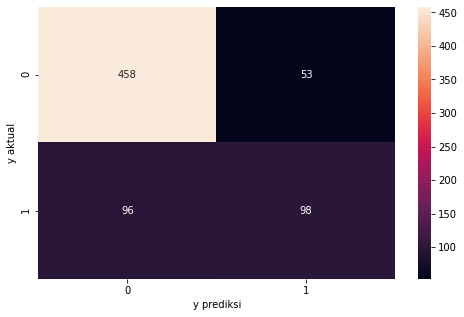

In [718]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yKNN_test,y_predKNN),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [719]:
print(classification_report(yKNN_test,y_predKNN))


precision    recall  f1-score   support

           0       0.83      0.90      0.86       511
           1       0.65      0.51      0.57       194

    accuracy                           0.79       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.78      0.79      0.78       705



In [720]:
pd.DataFrame(data= [accuracy_score(yKNN_test,y_predKNN)*100,recall_score(yKNN_test,y_predKNN)*100,precision_score(yKNN_test,y_predKNN)*100,roc_auc_score(yKNN_test,y_predKNN)*100,f1_score(yKNN_test,y_predKNN)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.865248
recall         50.515464
precission     64.900662
roc_auc_score  70.071822
F1 Score       56.811594

#### All Feature without Parameter Tuning and without Scalling train 80

In [721]:
modelKNN1 = KNeighborsClassifier()

modelKNN1.fit(xKNN1_train,yKNN1_train)

KNeighborsClassifier()

In [722]:

# 10 Folds Cross Validation 
clf_scoreKNN80 = cross_val_score(modelKNN1, xKNN1_train, yKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [723]:
y_predKNN1 = modelKNN1.predict(xKNN1_test)

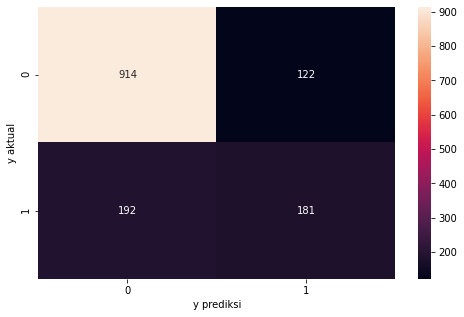

In [724]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yKNN1_test,y_predKNN1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [725]:
print(classification_report(yKNN1_test,y_predKNN1))


precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [726]:
pd.DataFrame(data= [accuracy_score(yKNN1_test,y_predKNN1)*100,recall_score(yKNN1_test,y_predKNN1)*100,precision_score(yKNN1_test,y_predKNN1)*100,roc_auc_score(yKNN1_test,y_predKNN1)*100,f1_score(yKNN1_test,y_predKNN1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       77.714691
recall         48.525469
precission     59.735974
roc_auc_score  68.374704
F1 Score       53.550296

#### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [727]:
modelKNNRS = KNeighborsClassifier(p = 1, n_neighbors = 23, leaf_size = 27).fit(xKNN_train, yKNN_train)

In [728]:
# 10 Folds Cross Validation 
clf_scoreKNNRS = cross_val_score(modelKNNRS, xKNN_train, yKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [729]:
y_predKNNRS = modelKNNRS.predict(xKNN_test)

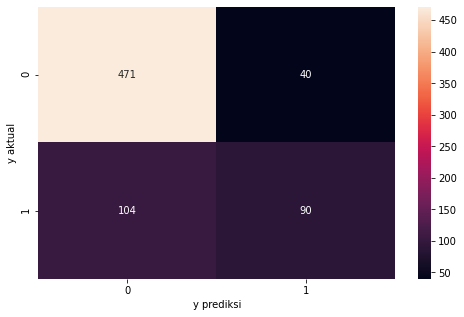

In [730]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yKNN_test,y_predKNNRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [731]:
print(classification_report(yKNN_test,y_predKNNRS))


precision    recall  f1-score   support

           0       0.82      0.92      0.87       511
           1       0.69      0.46      0.56       194

    accuracy                           0.80       705
   macro avg       0.76      0.69      0.71       705
weighted avg       0.78      0.80      0.78       705



In [732]:
pd.DataFrame(data= [accuracy_score(yKNN_test,y_predKNNRS)*100,recall_score(yKNN_test,y_predKNNRS)*100,precision_score(yKNN_test,y_predKNNRS)*100,roc_auc_score(yKNN_test,y_predKNNRS)*100,f1_score(yKNN_test,y_predKNNRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.574468
recall         46.391753
precission     69.230769
roc_auc_score  69.281982
F1 Score       55.555556

#### All Feature with Parameter Tuning and without Scalling train 80

In [733]:
modelKNNRS1 = KNeighborsClassifier(p = 1, n_neighbors = 16, leaf_size = 27).fit(xKNN1_train, yKNN1_train)

In [734]:
# 10 Folds Cross Validation 
clf_scoreKNNRS80 = cross_val_score(modelKNNRS1, xKNN1_train, yKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [735]:
y_predKNNRS1 = modelKNNRS1.predict(xKNN1_test)

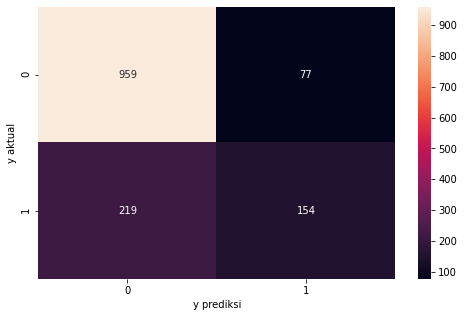

In [736]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yKNN1_test,y_predKNNRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [737]:
print(classification_report(yKNN1_test,y_predKNNRS1))


precision    recall  f1-score   support

           0       0.81      0.93      0.87      1036
           1       0.67      0.41      0.51       373

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.78      0.79      0.77      1409



In [738]:
pd.DataFrame(data= [accuracy_score(yKNN1_test,y_predKNNRS1)*100,recall_score(yKNN1_test,y_predKNNRS1)*100,precision_score(yKNN1_test,y_predKNNRS1)*100,roc_auc_score(yKNN1_test,y_predKNNRS1)*100,f1_score(yKNN1_test,y_predKNNRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.992193
recall         41.286863
precission     66.666667
roc_auc_score  66.927215
F1 Score       50.993377

### All Feature without Parameter Tuning and with Scalling train 90

In [739]:
xscalKNN = df2_Scal.drop(["Churn"],axis=1)
yscalKNN = df2_Scal["Churn"]

In [740]:
xscalKNN_train, xscalKNN_test, yscalKNN_train, yscalKNN_test = train_test_split(xscalKNN, yscalKNN, test_size = 0.1, random_state = 42)

In [741]:
xscalKNN1_train, xscalKNN1_test, yscalKNN1_train, yscalKNN1_test = train_test_split(xscalKNN, yscalKNN, test_size = 0.2, random_state = 42)

In [742]:
modelKNNscal = KNeighborsClassifier().fit(xscalKNN_train, yscalKNN_train)

In [743]:
# 10 Folds Cross Validation 
clf_scoreKNNscal = cross_val_score(modelKNNscal, xscalKNN_train, yscalKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [744]:
y_predKNNscal = modelKNNscal.predict(xscalKNN_test)

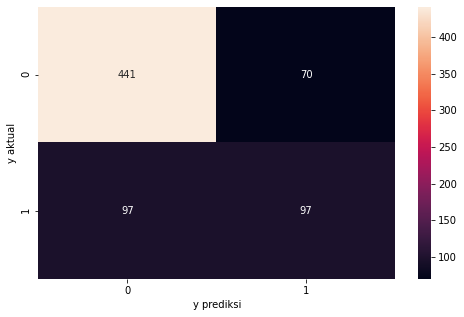

In [745]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalKNN_test,y_predKNNscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [746]:
print(classification_report(yscalKNN_test,y_predKNNscal))


precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       511
         1.0       0.58      0.50      0.54       194

    accuracy                           0.76       705
   macro avg       0.70      0.68      0.69       705
weighted avg       0.75      0.76      0.76       705



In [747]:
pd.DataFrame(data= [accuracy_score(yscalKNN_test,y_predKNNscal)*100,recall_score(yscalKNN_test,y_predKNNscal)*100,precision_score(yscalKNN_test,y_predKNNscal)*100,roc_auc_score(yscalKNN_test,y_predKNNscal)*100,f1_score(yscalKNN_test,y_predKNNscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       76.312057
recall         50.000000
precission     58.083832
roc_auc_score  68.150685
F1 Score       53.739612

### All Feature without Parameter Tuning and with Scalling train 80

In [748]:
modelKNNscal1 = KNeighborsClassifier().fit(xscalKNN1_train, yscalKNN1_train)

In [749]:
# 10 Folds Cross Validation 
clf_scoreKNNscal80 = cross_val_score(modelKNNscal1, xscalKNN1_train, yscalKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [750]:
y_predKNNscal1 = modelKNNscal1.predict(xscalKNN1_test)

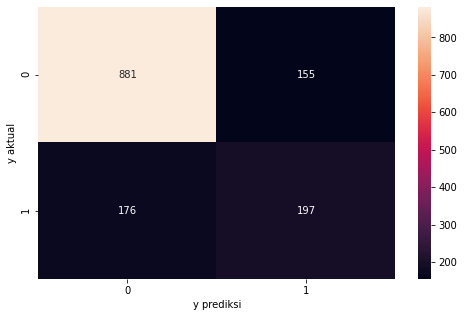

In [751]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalKNN1_test,y_predKNNscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [752]:
print(classification_report(yscalKNN1_test,y_predKNNscal1))


precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1036
         1.0       0.56      0.53      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [753]:
pd.DataFrame(data= [accuracy_score(yscalKNN1_test,y_predKNNscal1)*100,recall_score(yscalKNN1_test,y_predKNNscal1)*100,precision_score(yscalKNN1_test,y_predKNNscal1)*100,roc_auc_score(yscalKNN1_test,y_predKNNscal1)*100,f1_score(yscalKNN1_test,y_predKNNscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       76.508162
recall         52.815013
precission     55.965909
roc_auc_score  68.926812
F1 Score       54.344828

### All Feature with Parameter Tuning and with Scalling train 90

In [754]:
modelKNNRSscal = KNeighborsClassifier(p = 1, n_neighbors = 28, leaf_size = 19).fit(xscalKNN_train, yscalKNN_train)

In [755]:
# 10 Folds Cross Validation 
clf_scoreKNNRSscal = cross_val_score(modelKNNRSscal, xscalKNN_train, yscalKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [756]:
y_predKNNRSscal = modelKNNRSscal.predict(xscalKNN_test)

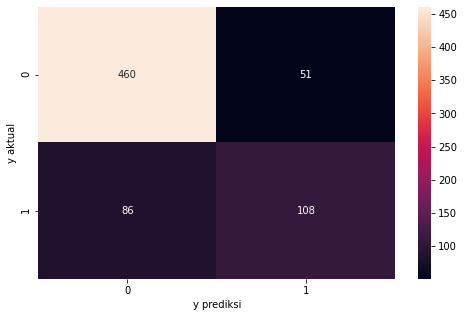

In [757]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalKNN_test,y_predKNNRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [758]:
BestKNN = pd.DataFrame(classification_report(yscalKNN_test,y_predKNNRSscal, target_names= labels, output_dict=True)).T

In [759]:
BestKNN

precision    recall  f1-score     support
Not Churned    0.842491  0.900196  0.870388  511.000000
Churned        0.679245  0.556701  0.611898  194.000000
accuracy       0.805674  0.805674  0.805674    0.805674
macro avg      0.760868  0.728448  0.741143  705.000000
weighted avg   0.797569  0.805674  0.799257  705.000000

In [760]:
print(classification_report(yscalKNN_test,y_predKNNRSscal))


precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       511
         1.0       0.68      0.56      0.61       194

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [761]:
pd.DataFrame(data= [accuracy_score(yscalKNN_test,y_predKNNRSscal)*100,recall_score(yscalKNN_test,y_predKNNRSscal)*100,precision_score(yscalKNN_test,y_predKNNRSscal)*100,roc_auc_score(yscalKNN_test,y_predKNNRSscal)*100,f1_score(yscalKNN_test,y_predKNNRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         55.670103
precission     67.924528
roc_auc_score  72.844836
F1 Score       61.189802

### All Feature with Parameter Tuning and with Scalling train 80

In [762]:
modelKNNRSscal1 = KNeighborsClassifier(p = 2, n_neighbors = 24, leaf_size = 24).fit(xscalKNN1_train, yscalKNN1_train)

In [763]:
# 10 Folds Cross Validation 
clf_scoreKNNRSscal80 = cross_val_score(modelKNNRSscal1, xscalKNN1_train, yscalKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [764]:
y_predKNNRSscal1 = modelKNNRSscal1.predict(xscalKNN1_test)

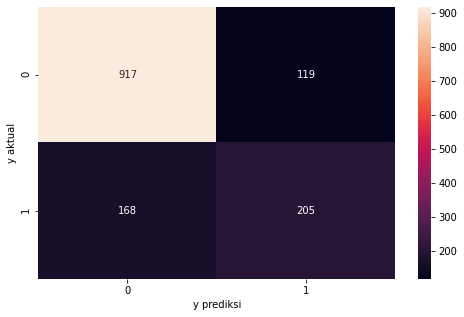

In [765]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalKNN1_test,y_predKNNRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [766]:
print(classification_report(yscalKNN1_test,y_predKNNRSscal1))


precision    recall  f1-score   support

         0.0       0.85      0.89      0.86      1036
         1.0       0.63      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [767]:
pd.DataFrame(data= [accuracy_score(yscalKNN1_test,y_predKNNRSscal1)*100,recall_score(yscalKNN1_test,y_predKNNRSscal1)*100,precision_score(yscalKNN1_test,y_predKNNRSscal1)*100,roc_auc_score(yscalKNN1_test,y_predKNNRSscal1)*100,f1_score(yscalKNN1_test,y_predKNNRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.630944
recall         54.959786
precission     63.271605
roc_auc_score  71.736650
F1 Score       58.823529

### Feature Selection without Parameter Tuning and without Scalling train 90

In [768]:
xselKNN = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
yselKNN  = df2["Churn"]

In [769]:
xselKNN_train, xselKNN_test, yselKNN_train, yselKNN_test = train_test_split(xselKNN, yselKNN, test_size = 0.1, random_state = 42)

In [770]:
xselKNN1_train, xselKNN1_test, yselKNN1_train, yselKNN1_test = train_test_split(xselKNN, yselKNN, test_size = 0.2, random_state = 42)

In [771]:
modelKNNsel = KNeighborsClassifier().fit(xselKNN_train, yselKNN_train)

In [772]:
# 10 Folds Cross Validation 
clf_scoreKNNsel = cross_val_score(modelKNNsel, xselKNN_train, yselKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [773]:
y_predKNNsel = modelKNNsel.predict(xselKNN_test)

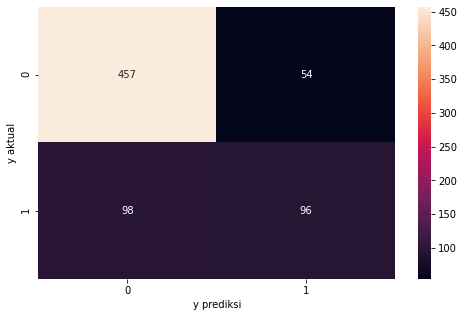

In [774]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNN_test,y_predKNNsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [775]:
print(classification_report(yselKNN_test,y_predKNNsel))


precision    recall  f1-score   support

           0       0.82      0.89      0.86       511
           1       0.64      0.49      0.56       194

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.71       705
weighted avg       0.77      0.78      0.78       705



In [776]:
pd.DataFrame(data= [accuracy_score(yselKNN_test,y_predKNNsel)*100,recall_score(yselKNN_test,y_predKNNsel)*100,precision_score(yselKNN_test,y_predKNNsel)*100,roc_auc_score(yselKNN_test,y_predKNNsel)*100,f1_score(yselKNN_test,y_predKNNsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.439716
recall         49.484536
precission     64.000000
roc_auc_score  69.458511
F1 Score       55.813953

### Feature Selection without Parameter Tuning and without Scalling train 80

In [777]:
modelKNNsel1 = KNeighborsClassifier().fit(xselKNN1_train, yselKNN1_train)

In [778]:
# 10 Folds Cross Validation 
clf_scoreKNNsel1 = cross_val_score(modelKNNsel1, xselKNN1_train, yselKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [779]:
y_predKNNsel1 = modelKNNsel1.predict(xselKNN1_test)

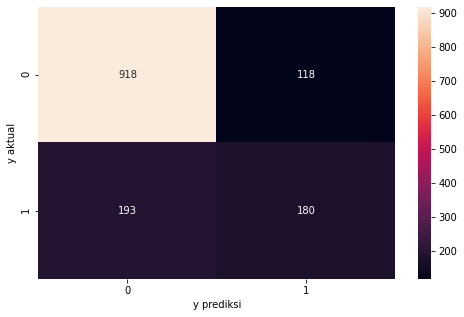

In [780]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNN1_test,y_predKNNsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [781]:
print(classification_report(yselKNN1_test,y_predKNNsel1))


precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.60      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [782]:
pd.DataFrame(data= [accuracy_score(yselKNN1_test,y_predKNNsel1)*100,recall_score(yselKNN1_test,y_predKNNsel1)*100,precision_score(yselKNN1_test,y_predKNNsel1)*100,roc_auc_score(yselKNN1_test,y_predKNNsel1)*100,f1_score(yselKNN1_test,y_predKNNsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       77.927608
recall         48.257373
precission     60.402685
roc_auc_score  68.433706
F1 Score       53.651267

### Feature Selection with Parameter Tuning and without Scalling train 90

In [783]:
modelKNNRSsel = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 2).fit(xselKNN_train, yselKNN_train)

In [784]:
# 10 Folds Cross Validation 
clf_scoreKNNRSsel = cross_val_score(modelKNNRSsel, xselKNN_train, yselKNN_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [785]:
y_predKNNRSsel = modelKNNsel.predict(xselKNN_test)

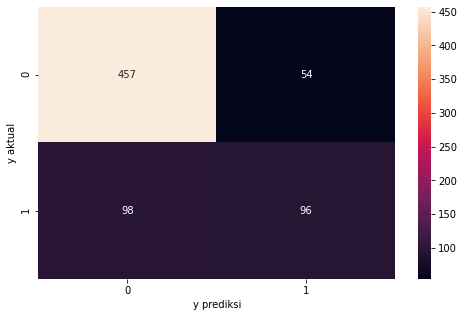

In [786]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNN_test,y_predKNNRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [787]:
print(classification_report(yselKNN_test,y_predKNNRSsel))


precision    recall  f1-score   support

           0       0.82      0.89      0.86       511
           1       0.64      0.49      0.56       194

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.71       705
weighted avg       0.77      0.78      0.78       705



In [788]:
pd.DataFrame(data= [accuracy_score(yselKNN_test,y_predKNNRSsel)*100,recall_score(yselKNN_test,y_predKNNRSsel)*100,precision_score(yselKNN_test,y_predKNNRSsel)*100,roc_auc_score(yselKNN_test,y_predKNNRSsel)*100,f1_score(yselKNN_test,y_predKNNRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.439716
recall         49.484536
precission     64.000000
roc_auc_score  69.458511
F1 Score       55.813953

### Feature Selection with Parameter Tuning and without Scalling train 80

In [789]:
modelKNNRSsel1 = KNeighborsClassifier(p = 1, n_neighbors = 28, leaf_size = 28).fit(xselKNN_train, yselKNN_train)

In [790]:
# 10 Folds Cross Validation 
clf_scoreKNNRSsel1 = cross_val_score(modelKNNRSsel1, xselKNN1_train, yselKNN1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [791]:
y_predKNNRSsel1 = modelKNNRSsel1.predict(xselKNN1_test)

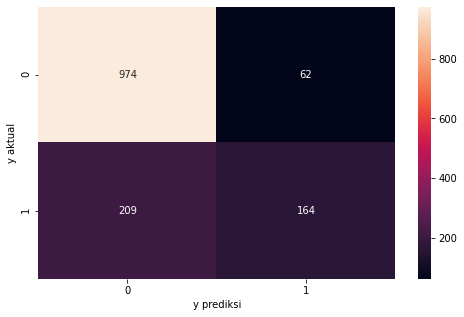

In [792]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNN1_test,y_predKNNRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [793]:
print(classification_report(yselKNN1_test,y_predKNNRSsel1))


precision    recall  f1-score   support

           0       0.82      0.94      0.88      1036
           1       0.73      0.44      0.55       373

    accuracy                           0.81      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.80      0.81      0.79      1409



In [794]:
pd.DataFrame(data= [accuracy_score(yselKNN1_test,y_predKNNRSsel1)*100,recall_score(yselKNN1_test,y_predKNNRSsel1)*100,precision_score(yselKNN1_test,y_predKNNRSsel1)*100,roc_auc_score(yselKNN1_test,y_predKNNRSsel1)*100,f1_score(yselKNN1_test,y_predKNNRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.766501
recall         43.967828
precission     72.566372
roc_auc_score  68.991636
F1 Score       54.757930

### Feature Selection without Parameter Tuning and with Scalling train 90

In [795]:
xselKNNscal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
yselKNNscal  = df2_Scal["Churn"]

In [796]:
xselKNNscal_train, xselKNNscal_test, yselKNNscal_train, yselKNNscal_test = train_test_split(xselKNNscal, yselKNNscal, test_size = 0.1, random_state = 42)

In [797]:
xselKNNscal1_train, xselKNNscal1_test, yselKNNscal1_train, yselKNNscal1_test = train_test_split(xselKNNscal, yselKNNscal, test_size = 0.2, random_state = 42)

In [798]:
modelKNNselscal = KNeighborsClassifier().fit(xselKNNscal_train, yselKNNscal_train)

In [799]:
# 10 Folds Cross Validation 
clf_scoreKNNselscal = cross_val_score(modelKNNselscal, xselKNNscal_train, yselKNNscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [800]:
y_predKNNselscal = modelKNNselscal.predict(xselKNNscal_test)

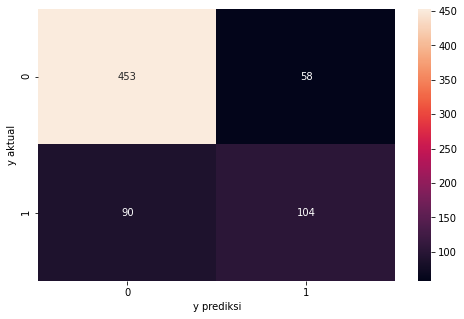

In [801]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNNscal_test,y_predKNNselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [802]:
print(classification_report(yselKNNscal_test,y_predKNNselscal))


precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       511
         1.0       0.64      0.54      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [803]:
pd.DataFrame(data= [accuracy_score(yselKNNscal_test,y_predKNNselscal)*100,recall_score(yselKNNscal_test,y_predKNNselscal)*100,precision_score(yselKNNscal_test,y_predKNNselscal)*100,roc_auc_score(yselKNNscal_test,y_predKNNselscal)*100,f1_score(yselKNNscal_test,y_predKNNselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.007092
recall         53.608247
precission     64.197531
roc_auc_score  71.128977
F1 Score       58.426966

### Feature Selection with Parameter Tuning and without Scalling train 80

In [804]:
modelKNNselscal1 = KNeighborsClassifier().fit(xselKNNscal1_train, yselKNNscal1_train)

In [805]:
# 10 Folds Cross Validation 
clf_scoreKNNselscal80 = cross_val_score(modelKNNselscal1, xselKNNscal1_train, yselKNNscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [806]:
y_predKNNselscal1 = modelKNNselscal1.predict(xselKNNscal1_test)

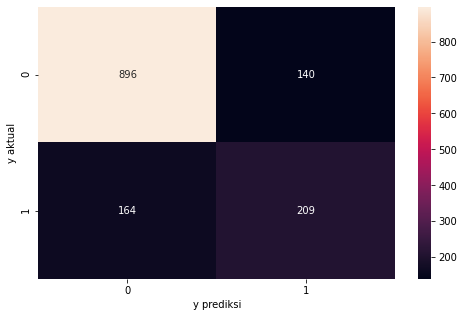

In [807]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNNscal1_test,y_predKNNselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [808]:
print(classification_report(yselKNNscal1_test,y_predKNNselscal1))


precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      1036
         1.0       0.60      0.56      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [809]:
pd.DataFrame(data= [accuracy_score(yselKNNscal1_test,y_predKNNselscal1)*100,recall_score(yselKNNscal1_test,y_predKNNselscal1)*100,precision_score(yselKNNscal1_test,y_predKNNselscal1)*100,roc_auc_score(yselKNNscal1_test,y_predKNNselscal1)*100,f1_score(yselKNNscal1_test,y_predKNNselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.424414
recall         56.032172
precission     59.885387
roc_auc_score  71.259329
F1 Score       57.894737

### Feature Selection with Parameter Tuning and with Scalling train 90

In [810]:
modelKNNRSselscal = KNeighborsClassifier(p = 1, n_neighbors = 26, leaf_size = 28).fit(xselKNNscal_train, yselKNNscal_train)

In [811]:
# 10 Folds Cross Validation 
clf_scoreKNNRSselscal = cross_val_score(modelKNNRSselscal, xselKNNscal_train, yselKNNscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [812]:
y_predKNNRSselscal = modelKNNRSselscal.predict(xselKNNscal_test)

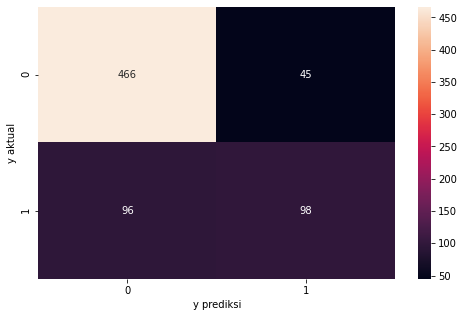

In [813]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNNscal_test,y_predKNNRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [814]:
print(classification_report(yselKNNscal_test,y_predKNNRSselscal))


precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       511
         1.0       0.69      0.51      0.58       194

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



In [815]:
pd.DataFrame(data= [accuracy_score(yselKNNscal_test,y_predKNNRSselscal)*100,recall_score(yselKNNscal_test,y_predKNNRSselscal)*100,precision_score(yselKNNscal_test,y_predKNNRSselscal)*100,roc_auc_score(yselKNNscal_test,y_predKNNRSselscal)*100,f1_score(yselKNNscal_test,y_predKNNRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.000000
recall         50.515464
precission     68.531469
roc_auc_score  70.854601
F1 Score       58.160237

### Feature Selection with Parameter Tuning and with Scalling train 80

In [816]:
modelKNNRSselscal1 = KNeighborsClassifier(p = 1, n_neighbors = 26, leaf_size = 49).fit(xselKNNscal1_train, yselKNNscal1_train)

In [817]:
# 10 Folds Cross Validation 
clf_scoreKNNRSselscal80 = cross_val_score(modelKNNRSselscal1, xselKNNscal1_train, yselKNNscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [818]:
y_predKNNRSselscal1 = modelKNNRSselscal1.predict(xselKNNscal1_test)

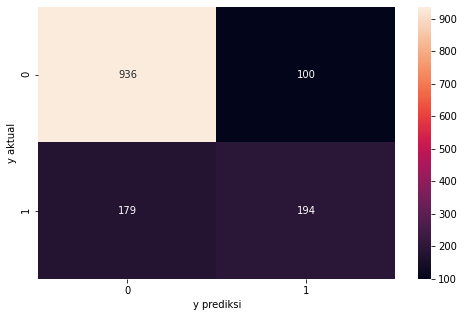

In [819]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselKNNscal1_test,y_predKNNRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [820]:
print(classification_report(yselKNNscal1_test,y_predKNNRSselscal1))


precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.66      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [821]:
pd.DataFrame(data= [accuracy_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,recall_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,precision_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,roc_auc_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,f1_score(yselKNNscal1_test,y_predKNNRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.198722
recall         52.010724
precission     65.986395
roc_auc_score  71.179107
F1 Score       58.170915

In [822]:
KNN_Summary = pd.DataFrame({"KNN": ["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yKNN_test,y_predKNN)*100,recall_score(yKNN_test,y_predKNN)*100,precision_score(yKNN_test,y_predKNN)*100,roc_auc_score(yKNN_test,y_predKNN)*100,f1_score(yKNN_test,y_predKNN)*100],
                            "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yKNN1_test,y_predKNN1)*100,recall_score(yKNN1_test,y_predKNN1)*100,precision_score(yKNN1_test,y_predKNN1)*100,roc_auc_score(yKNN1_test,y_predKNN1)*100,f1_score(yKNN1_test,y_predKNN1)*100],
                             "All Feature with Parameter Tuning and without Scalling train 90":[accuracy_score(yKNN_test,y_predKNNRS)*100,recall_score(yKNN_test,y_predKNNRS)*100,precision_score(yKNN_test,y_predKNNRS)*100,roc_auc_score(yKNN_test,y_predKNNRS)*100,f1_score(yKNN_test,y_predKNNRS)*100],
                             "All Feature with Parameter Tuning and without Scalling train 80":[accuracy_score(yKNN1_test,y_predKNNRS1)*100,recall_score(yKNN1_test,y_predKNNRS1)*100,precision_score(yKNN1_test,y_predKNNRS1)*100,roc_auc_score(yKNN1_test,y_predKNNRS1)*100,f1_score(yKNN1_test,y_predKNNRS1)*100],
                             "All Feature without Parameter Tuning and with Scalling train 90":[accuracy_score(yscalKNN_test,y_predKNNscal)*100,recall_score(yscalKNN_test,y_predKNNscal)*100,precision_score(yscalKNN_test,y_predKNNscal)*100,roc_auc_score(yscalKNN_test,y_predKNNscal)*100,f1_score(yscalKNN_test,y_predKNNscal)*100],
                             "All Feature without Parameter Tuning and with Scalling train 80":[accuracy_score(yscalKNN1_test,y_predKNNscal1)*100,recall_score(yscalKNN1_test,y_predKNNscal1)*100,precision_score(yscalKNN1_test,y_predKNNscal1)*100,roc_auc_score(yscalKNN1_test,y_predKNNscal1)*100,f1_score(yscalKNN1_test,y_predKNNscal1)*100],
                             "All Feature with Parameter Tuning and with Scalling train 90":[accuracy_score(yscalKNN_test,y_predKNNRSscal)*100,recall_score(yscalKNN_test,y_predKNNRSscal)*100,precision_score(yscalKNN_test,y_predKNNRSscal)*100,roc_auc_score(yscalKNN_test,y_predKNNRSscal)*100,f1_score(yscalKNN_test,y_predKNNRSscal)*100],
                             "All Feature with Parameter Tuning and with Scalling train 80":[accuracy_score(yscalKNN1_test,y_predKNNRSscal1)*100,recall_score(yscalKNN1_test,y_predKNNRSscal1)*100,precision_score(yscalKNN1_test,y_predKNNRSscal1)*100,roc_auc_score(yscalKNN1_test,y_predKNNRSscal1)*100,f1_score(yscalKNN1_test,y_predKNNRSscal1)*100],
                              "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselKNN_test,y_predKNNsel)*100,recall_score(yselKNN_test,y_predKNNsel)*100,precision_score(yselKNN_test,y_predKNNsel)*100,roc_auc_score(yselKNN_test,y_predKNNsel)*100,f1_score(yselKNN_test,y_predKNNsel)*100],
                              "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselKNN1_test,y_predKNNsel1)*100,recall_score(yselKNN1_test,y_predKNNsel1)*100,precision_score(yselKNN1_test,y_predKNNsel1)*100,roc_auc_score(yselKNN1_test,y_predKNNsel1)*100,f1_score(yselKNN1_test,y_predKNNsel1)*100],
                              "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselKNN_test,y_predKNNRSsel)*100,recall_score(yselKNN_test,y_predKNNRSsel)*100,precision_score(yselKNN_test,y_predKNNRSsel)*100,roc_auc_score(yselKNN_test,y_predKNNRSsel)*100,f1_score(yselKNN_test,y_predKNNRSsel)*100],
                              "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselKNN1_test,y_predKNNRSsel1)*100,recall_score(yselKNN1_test,y_predKNNRSsel1)*100,precision_score(yselKNN1_test,y_predKNNRSsel1)*100,roc_auc_score(yselKNN1_test,y_predKNNRSsel1)*100,f1_score(yselKNN1_test,y_predKNNRSsel1)*100],
                              "Feature Selection without Parameter Tuning and with Scalling train 90":[accuracy_score(yselKNNscal_test,y_predKNNselscal)*100,recall_score(yselKNNscal_test,y_predKNNselscal)*100,precision_score(yselKNNscal_test,y_predKNNselscal)*100,roc_auc_score(yselKNNscal_test,y_predKNNselscal)*100,f1_score(yselKNNscal_test,y_predKNNselscal)*100],
                              "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselKNNscal1_test,y_predKNNselscal1)*100,recall_score(yselKNNscal1_test,y_predKNNselscal1)*100,precision_score(yselKNNscal1_test,y_predKNNselscal1)*100,roc_auc_score(yselKNNscal1_test,y_predKNNselscal1)*100,f1_score(yselKNNscal1_test,y_predKNNselscal1)*100],
                              "Feature Selection with Parameter Tuning and with Scalling train 90":[accuracy_score(yselKNNscal_test,y_predKNNRSselscal)*100,recall_score(yselKNNscal_test,y_predKNNRSselscal)*100,precision_score(yselKNNscal_test,y_predKNNRSselscal)*100,roc_auc_score(yselKNNscal_test,y_predKNNRSselscal)*100,f1_score(yselKNNscal_test,y_predKNNRSselscal)*100],
                              "Feature Selection with Parameter Tuning and with Scalling train 80":[accuracy_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,recall_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,precision_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,roc_auc_score(yselKNNscal1_test,y_predKNNRSselscal1)*100,f1_score(yselKNNscal1_test,y_predKNNRSselscal1)*100]


})
KNN_Summary.set_index("KNN").T

KNN                                                  accuracy     recall  \
All Feature without Parameter Tuning and withou...  78.865248  50.515464   
All Feature without Parameter Tuning and withou...  77.714691  48.525469   
All Feature with Parameter Tuning and without S...  79.574468  46.391753   
All Feature with Parameter Tuning and without S...  78.992193  41.286863   
All Feature without Parameter Tuning and with S...  76.312057  50.000000   
All Feature without Parameter Tuning and with S...  76.508162  52.815013   
All Feature with Parameter Tuning and with Scal...  80.567376  55.670103   
All Feature with Parameter Tuning and with Scal...  79.630944  54.959786   
Feature Selection without Parameter Tuning and ...  78.439716  49.484536   
Feature Selection without Parameter Tuning and ...  77.927608  48.257373   
Feature Selection with Parameter Tuning and wit...  78.439716  49.484536   
Feature Selection with Parameter Tuning and wit...  78.424414  56.032172   
Feature Selection without Parameter Tuning and ...  79.007092  53.608247   
Feature Selection with Parameter Tuning and wit...  80.000000  50.515464   
Feature Selection with Parameter Tuning and wit...  80.198722  52.010724   

KNN                                                 precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  64.900662      70.071822   
All Feature without Parameter Tuning and withou...  59.735974      68.374704   
All Feature with Parameter Tuning and without S...  69.230769      69.281982   
All Feature with Parameter Tuning and without S...  66.666667      66.927215   
All Feature without Parameter Tuning and with S...  58.083832      68.150685   
All Feature without Parameter Tuning and with S...  55.965909      68.926812   
All Feature with Parameter Tuning and with Scal...  67.924528      72.844836   
All Feature with Parameter Tuning and with Scal...  63.271605      71.736650   
Feature Selection without Parameter Tuning and ...  64.000000      69.458511   
Feature Selection without Parameter Tuning and ...  60.402685      68.433706   
Feature Selection with Parameter Tuning and wit...  64.000000      69.458511   
Feature Selection with Parameter Tuning and wit...  59.885387      71.259329   
Feature Selection without Parameter Tuning and ...  64.197531      71.128977   
Feature Selection with Parameter Tuning and wit...  68.531469      70.854601   
Feature Selection with Parameter Tuning and wit...  65.986395      71.179107   

KNN                                                  f1_score  
All Feature without Parameter Tuning and withou...  56.811594  
All Feature without Parameter Tuning and withou...  53.550296  
All Feature with Parameter Tuning and without S...  55.555556  
All Feature with Parameter Tuning and without S...  50.993377  
All Feature without Parameter Tuning and with S...  53.739612  
All Feature without Parameter Tuning and with S...  54.344828  
All Feature with Parameter Tuning and with Scal...  61.189802  
All Feature with Parameter Tuning and with Scal...  58.823529  
Feature Selection without Parameter Tuning and ...  55.813953  
Feature Selection without Parameter Tuning and ...  53.651267  
Feature Selection with Parameter Tuning and wit...  55.813953  
Feature Selection with Parameter Tuning and wit...  57.894737  
Feature Selection without Parameter Tuning and ...  58.426966  
Feature Selection with Parameter Tuning and wit...  58.160237  
Feature Selection with Parameter Tuning and wit...  58.170915

## The Best Model KNN with Condition  : All Feature with Parameter Tuning and with Scalling train 90 

In [823]:
BestKNN

precision    recall  f1-score     support
Not Churned    0.842491  0.900196  0.870388  511.000000
Churned        0.679245  0.556701  0.611898  194.000000
accuracy       0.805674  0.805674  0.805674    0.805674
macro avg      0.760868  0.728448  0.741143  705.000000
weighted avg   0.797569  0.805674  0.799257  705.000000

## Best Of The Best Model Tested

In [824]:
TheBestModel = pd.concat([BestLG, BestDT, BestRF, BestXGB, BestGrad, BestKNN], keys = ['BEST LOGRES', 'BEST DECISION TREE', 'BEST RANDOM FOREST', 'BEST XGB', 'BEST GRADBOOST','BEST KNN'])
TheBestModel

precision    recall  f1-score      support
BEST LOGRES        Not Churned    0.857143  0.904110  0.880000   511.000000
                   Churned        0.704819  0.603093  0.650000   194.000000
                   accuracy       0.821277  0.821277  0.821277     0.821277
                   macro avg      0.780981  0.753601  0.765000   705.000000
                   weighted avg   0.815227  0.821277  0.816709   705.000000
BEST DECISION TREE Not Churned    0.876349  0.861969  0.869100  1036.000000
                   Churned        0.633333  0.662198  0.647444   373.000000
                   accuracy       0.809084  0.809084  0.809084     0.809084
                   macro avg      0.754841  0.762084  0.758272  1409.000000
                   weighted avg   0.812017  0.809084  0.810422  1409.000000
BEST RANDOM FOREST Not Churned    0.839416  0.900196  0.868744   511.000000
                   Churned        0.675159  0.546392  0.603989   194.000000
                   accuracy       0.802837  0.802837  0.802837     0.802837
                   macro avg      0.757288  0.723294  0.736366   705.000000
                   weighted avg   0.794216  0.802837  0.795889   705.000000
BEST XGB           Not Churned    0.853526  0.911197  0.881419  1036.000000
                   Churned        0.696370  0.565684  0.624260   373.000000
                   accuracy       0.819730  0.819730  0.819730     0.819730
                   macro avg      0.774948  0.738440  0.752840  1409.000000
                   weighted avg   0.811923  0.819730  0.813342  1409.000000
BEST GRADBOOST     Not Churned    0.857944  0.898239  0.877629   511.000000
                   Churned        0.694118  0.608247  0.648352   194.000000
                   accuracy       0.818440  0.818440  0.818440     0.818440
                   macro avg      0.776031  0.753243  0.762990   705.000000
                   weighted avg   0.812863  0.818440  0.814537   705.000000
BEST KNN           Not Churned    0.842491  0.900196  0.870388   511.000000
                   Churned        0.679245  0.556701  0.611898   194.000000
                   accuracy       0.805674  0.805674  0.805674     0.805674
                   macro avg      0.760868  0.728448  0.741143   705.000000
                   weighted avg   0.797569  0.805674  0.799257   705.000000

In [825]:

# Accuracy, Precision, Recall and F1 Score

#Logres
LRG_acc = accuracy_score(yLRScal1_test, y_predLRScal1)
LRG_prec = precision_score(yLRScal1_test, y_predLRScal1, pos_label = 1)
LRG_rec = recall_score(yLRScal1_test, y_predLRScal1, pos_label = 1)
LRG_fsc = f1_score(yLRScal1_test, y_predLRScal1, pos_label = 1)


# Decision Tree
DT_acc = accuracy_score(yselDTscal1_test,y_predselDTRSscal1)
DT_prec = precision_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_rec = recall_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_fsc = f1_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)

# Random Forest
RF_acc = accuracy_score(yScalRF1_test,y_predRFscal1)
RF_prec = precision_score(yScalRF1_test,y_predRFscal1, pos_label = 1)
RF_rec = recall_score(yScalRF1_test,y_predRFscal1, pos_label = 1)
RF_fsc = f1_score(yScalRF1_test,y_predRFscal1, pos_label = 1)

# XGB
XGB_acc = accuracy_score(yselXG1_test,y_predXGBRSsel1)
XGB_prec = precision_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)
XGB_rec = recall_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)
XGB_fsc = f1_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)

# Gradient Boosting
Grad_acc = accuracy_score(yscalGrad1_test,y_predGradRSscal1)
Grad_prec = precision_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)
Grad_rec = recall_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)
Grad_fsc = f1_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)

# KNN
KNN_acc = accuracy_score(yscalKNN_test,y_predKNNRSscal)
KNN_prec = precision_score(yscalKNN_test,y_predKNNRSscal, pos_label = 1)
KNN_rec = recall_score(yscalKNN_test,y_predKNNRSscal, pos_label = 1)
KNN_fsc = f1_score(yscalKNN_test,y_predKNNRSscal, pos_label = 1)

In [826]:

Best_Model_Final = pd.DataFrame({'LRG BEST' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc],
                                 'DT BEST' : [DT_acc, DT_prec, DT_rec, DT_fsc], 
                                 'RF BEST' : [RF_acc, RF_prec, RF_rec, RF_fsc], 
                                  'XGB BEST' : [XGB_acc, XGB_prec, XGB_rec, XGB_fsc], 
                                   'GRAD BEST' : [Grad_acc, Grad_prec, Grad_rec, Grad_fsc],
                                   'KNN BEST' : [KNN_acc,KNN_prec,KNN_rec,KNN_fsc]}
                                   , 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
Best_Model_Final

LRG BEST   DT BEST   RF BEST  XGB BEST  GRAD BEST  KNN BEST
ACCURACY   0.820440  0.809084  0.797019  0.819730   0.821859  0.805674
PRECISION  0.685185  0.633333  0.665399  0.696370   0.698052  0.679245
RECALL     0.595174  0.662198  0.469169  0.565684   0.576408  0.556701
F1 SCORE   0.637016  0.647444  0.550314  0.624260   0.631424  0.611898

In [827]:
# final_score_comp.plot(kind = 'barh', figsize = (20,10))
# plt.show()


## We Have Finished the Model Test with six Model classification, we think the best model is Decision Tree Classifier it is has no overfitting compared with other model and have most stable overall result. Other than that We prefer to reduce prediction errors Churn negative, therefore we choose the model with the highest recall.

- We Try the best model with default Data (without Intervens) it is still has a good result

In [828]:
modelDTRSBest = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
modelDTRSBest.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [829]:
y_predDTRSBest = modelDTRSBest.predict(xselDT_test)

In [830]:
print(classification_report(yselDT_test,y_predDTRSBest))

precision    recall  f1-score   support

           0       0.87      0.87      0.87       511
           1       0.66      0.65      0.66       194

    accuracy                           0.81       705
   macro avg       0.77      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [831]:
Best_Model_with_NO_Intervensi_Data = pd.DataFrame(classification_report(yselDT_test,y_predDTRSBest, target_names= labels, output_dict=True)).T

In [832]:
# Decision Tree
DT_acc = accuracy_score(yselDTscal1_test,y_predselDTRSscal1)
DT_prec = precision_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_rec = recall_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_fsc = f1_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)

# Best Model Without Data intervens
Test_acc = accuracy_score(yselDT_test,y_predDTRSBest)
Test_prec = precision_score(yselDT_test,y_predDTRSBest, pos_label = 1)
Test_rec = recall_score(yselDT_test,y_predDTRSBest, pos_label = 1)
Test_fsc = f1_score(yselDT_test,y_predDTRSBest, pos_label = 1)

In [833]:
Best_Model_Compare = pd.DataFrame({'TEST MODEL WITHOUT INTERVENS' : [Test_acc, Test_prec, Test_rec, Test_fsc],
                                 'DT BEST' : [DT_acc, DT_prec, DT_rec, DT_fsc], 
                                 }, 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
Best_Model_Compare

TEST MODEL WITHOUT INTERVENS   DT BEST
ACCURACY                       0.812766  0.809084
PRECISION                      0.663158  0.633333
RECALL                         0.649485  0.662198
F1 SCORE                       0.656250  0.647444